In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os

from sklearn.model_selection import KFold, train_test_split, cross_val_score , RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

import scipy.stats as stats
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dense, Dropout, MaxPooling1D, GlobalAveragePooling1D, Conv2D, MaxPooling2D, BatchNormalization, TimeDistributed, Reshape, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Turkish Dataset

In [4]:
turkish_df = pd.read_csv("Acoustic Features.csv")

In [5]:
turkish_df.shape

(400, 51)

In [6]:
turkish_df.head()

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0  relax            0.052            0.591              9.136      130.043   
1  relax            0.125            0.439              6.680      142.240   
2  relax            0.046            0.639             10.578      188.154   
3  relax            0.135            0.603             10.442       65.991   
4  relax            0.066            0.591              9.769       88.890   

   _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  ...  \
0         3.997         0.363         0.887         0.078         0.221  ...   
1         4.058         0.516         0.785         0.397         0.556  ...   
2         2.775         0.903         0.502         0.329         0.287  ...   
3         2.841         1.552         0.612         0.351         0.011  ...   
4         3.217         0.228         0.814         0.096         0.434  ...   

   _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0               0.426                1.000                0.008   
1               0.002                1.000                0.000   
2               0.184                0.746                0.016   
3               0.038                1.000                0.161   
4               0.004                0.404                1.000   

   _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                0.101                                  0.316   
1                0.984                                  0.285   
2                1.000                                  0.413   
3                0.757                                  0.422   
4                0.001                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  
0                                           0.970  
1                                           0.967  
2                                           0.963  
3                                           0.968  
4                                           0.957  

[5 rows x 51 columns]

In [7]:
turkish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [8]:
turkish_df.dtypes

Class                                              object
_RMSenergy_Mean                                   float64
_Lowenergy_Mean                                   float64
_Fluctuation_Mean                                 float64
_Tempo_Mean                                       float64
_MFCC_Mean_1                                      float64
_MFCC_Mean_2                                      float64
_MFCC_Mean_3                                      float64
_MFCC_Mean_4                                      float64
_MFCC_Mean_5                                      float64
_MFCC_Mean_6                                      float64
_MFCC_Mean_7                                      float64
_MFCC_Mean_8                                      float64
_MFCC_Mean_9                                      float64
_MFCC_Mean_10                                     float64
_MFCC_Mean_11                                     float64
_MFCC_Mean_12                                     float64
_MFCC_Mean_13 

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\768507726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


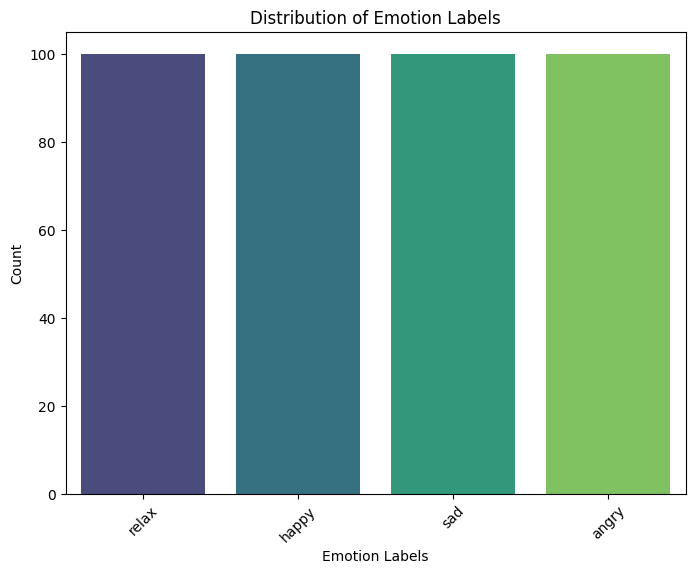

In [9]:
# Count occurrences of each emotion label
emotion_counts = turkish_df["Class"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotion Labels")
plt.ylabel("Count")
plt.title("Distribution of Emotion Labels")
plt.xticks(rotation=45)
plt.show()

## MFCC Seperated data frame

In [10]:
turkish_mfcc_df = turkish_df.filter(like='_MFCC')
turkish_mfcc_df['Class'] = turkish_df['Class']
turkish_mfcc_df.head()

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\2313368502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkish_mfcc_df['Class'] = turkish_df['Class']


_MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0         3.997         0.363         0.887         0.078         0.221   
1         4.058         0.516         0.785         0.397         0.556   
2         2.775         0.903         0.502         0.329         0.287   
3         2.841         1.552         0.612         0.351         0.011   
4         3.217         0.228         0.814         0.096         0.434   

   _MFCC_Mean_6  _MFCC_Mean_7  _MFCC_Mean_8  _MFCC_Mean_9  _MFCC_Mean_10  \
0         0.118        -0.151        -0.131         0.129          0.154   
1         0.799        -0.403        -0.264        -0.057          0.288   
2         0.140        -0.246         0.025        -0.112         -0.422   
3         0.143         0.047         0.242         0.018          0.168   
4         0.285         0.104         0.013        -0.235         -0.207   

   _MFCC_Mean_11  _MFCC_Mean_12  _MFCC_Mean_13  Class  
0          0.274          0.232          0.246  relax  
1          0.309          0.049          0.027  relax  
2          0.018          0.179          0.138  relax  
3          0.141          0.245          0.146  relax  
4         -0.276         -0.294         -0.190  relax

## Chroma Seperated data frame

In [11]:
turkish_Chromagram_df = turkish_df.filter(like='_Chromagram')
turkish_Chromagram_df['Class'] = turkish_df['Class']
turkish_Chromagram_df.head()

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\814733364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkish_Chromagram_df['Class'] = turkish_df['Class']


_Chromagram_Mean_1  _Chromagram_Mean_2  _Chromagram_Mean_3  \
0               0.496               0.000               0.047   
1               0.000               0.142               0.137   
2               0.412               0.245               0.526   
3               0.307               0.278               0.281   
4               0.091               0.000               0.022   

   _Chromagram_Mean_4  _Chromagram_Mean_5  _Chromagram_Mean_6  \
0               0.030               0.314               0.038   
1               0.076               0.112               0.000   
2               0.095               0.519               0.001   
3               0.208               0.733               0.002   
4               0.396               0.011               0.000   

   _Chromagram_Mean_7  _Chromagram_Mean_8  _Chromagram_Mean_9  \
0               0.024               0.951               0.426   
1               0.120               0.000               0.002   
2               0.563               0.282               0.184   
3               0.276               0.436               0.038   
4               0.135               0.635               0.004   

   _Chromagram_Mean_10  _Chromagram_Mean_11  _Chromagram_Mean_12  Class  
0                1.000                0.008                0.101  relax  
1                1.000                0.000                0.984  relax  
2                0.746                0.016                1.000  relax  
3                1.000                0.161                0.757  relax  
4                0.404                1.000                0.001  relax

## Other Features Except MFCC and Chromagram

In [12]:
turkish_filtered_df = turkish_df.drop(
    columns=turkish_mfcc_df.columns.tolist() + turkish_Chromagram_df.columns.tolist())
turkish_filtered_df['Class'] = turkish_df['Class']
turkish_filtered_df.head()

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0            0.052            0.591              9.136      130.043   
1            0.125            0.439              6.680      142.240   
2            0.046            0.639             10.578      188.154   
3            0.135            0.603             10.442       65.991   
4            0.066            0.591              9.769       88.890   

   _Roughness_Mean  _Roughness_Slope  _Zero-crossingrate_Mean  \
0           51.542             0.325                  403.129   
1          336.839             0.366                  204.886   
2           39.864             0.224                  685.474   
3          353.744             0.215                  579.859   
4           46.884            -0.118                  430.536   

   _AttackTime_Mean  _AttackTime_Slope  _Rolloff_Mean  ...  \
0             0.028             -0.014       1844.664  ...   
1             0.015             -0.079       1181.067  ...   
2             0.033             -0.278      10778.651  ...   
3             0.029             -0.076       6745.549  ...   
4             0.040             -0.282       3328.373  ...   

   _Spectralkurtosis_Mean  _Spectralflatness_Mean  _EntropyofSpectrum_Mean  \
0                  18.037                   0.030                    0.806   
1                  21.990                   0.025                    0.765   
2                   2.366                   0.091                    0.897   
3                   4.780                   0.053                    0.840   
4                  10.627                   0.046                    0.830   

   _HarmonicChangeDetectionFunction_Mean  \
0                                  0.316   
1                                  0.285   
2                                  0.413   
3                                  0.422   
4                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  Class  
0                                           0.970  relax  
1                                           0.967  relax  
2                                           0.963  relax  
3                                           0.968  relax  
4                                           0.957  relax  

[5 rows x 26 columns]

## Top 20 Most Important Features for Emotion Classification from turkish_df

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\3802217876.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], palette="viridis")


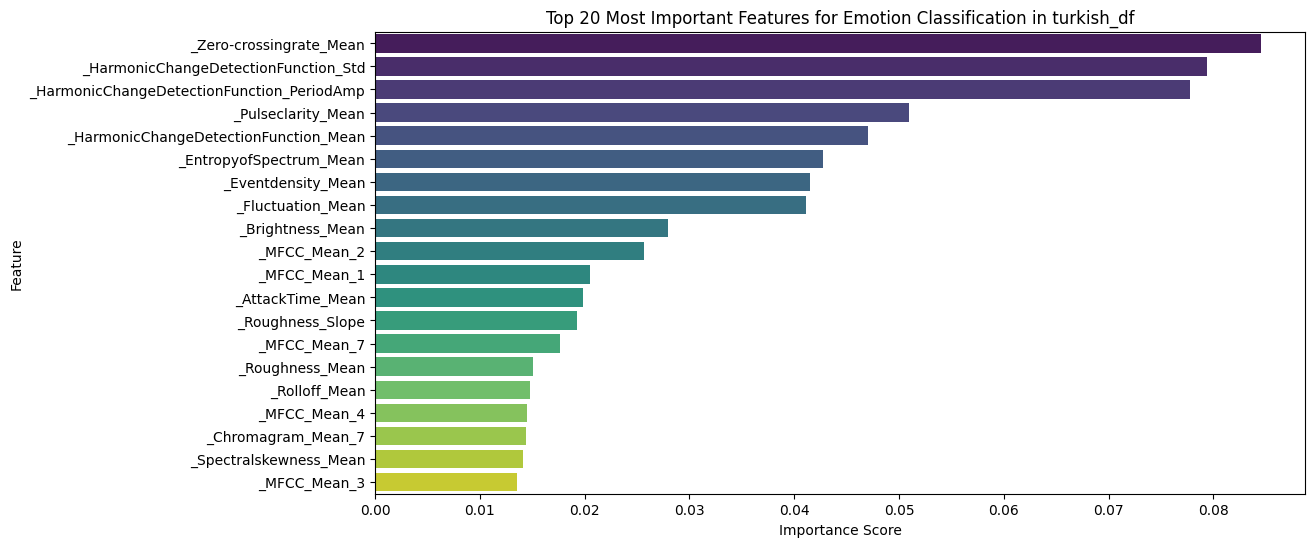

In [13]:
# Separate features and target variable
X = turkish_df.drop(columns=["Class"])
y = turkish_df["Class"]

# Combine features (X) and target variable (y) into a single DataFrame
turkish_top_20_features_dataset = pd.concat([X, y], axis=1)

# Train a Random Forest model for feature importance analysis
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features for Emotion Classification in turkish_df")
plt.show()

In [14]:
turkish_top_20_features_dataset.head()

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0            0.052            0.591              9.136      130.043   
1            0.125            0.439              6.680      142.240   
2            0.046            0.639             10.578      188.154   
3            0.135            0.603             10.442       65.991   
4            0.066            0.591              9.769       88.890   

   _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0         3.997         0.363         0.887         0.078         0.221   
1         4.058         0.516         0.785         0.397         0.556   
2         2.775         0.903         0.502         0.329         0.287   
3         2.841         1.552         0.612         0.351         0.011   
4         3.217         0.228         0.814         0.096         0.434   

   _MFCC_Mean_6  ...  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0         0.118  ...                1.000                0.008   
1         0.799  ...                1.000                0.000   
2         0.140  ...                0.746                0.016   
3         0.143  ...                1.000                0.161   
4         0.285  ...                0.404                1.000   

   _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                0.101                                  0.316   
1                0.984                                  0.285   
2                1.000                                  0.413   
3                0.757                                  0.422   
4                0.001                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  Class  
0                                           0.970  relax  
1                                           0.967  relax  
2                                           0.963  relax  
3                                           0.968  relax  
4                                           0.957  relax  

[5 rows x 51 columns]

## ML Classifiers

In [51]:
# Define a function to evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting" : GradientBoostingClassifier(n_estimators=100, random_state=42),
        "Ada Boost" : AdaBoostClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(probability=True, kernel='rbf', random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
    }
    results = {}
    reports = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        results[name] = scores.mean()
        reports[name] = classification_report(y_test, y_pred, output_dict=False)
    return results, reports

# Split datasets into training and testing sets
datasets = {"turkish_top_20_features_dataset" : turkish_top_20_features_dataset,"turkish_df": turkish_df, "turkish_mfcc_df": turkish_mfcc_df, "turkish_Chromagram_df": turkish_Chromagram_df, "turkish_filtered_df": turkish_filtered_df}
results = {}
reports = {}
for name, dataset in datasets.items():
    X = dataset.drop(columns=["Class"])
    y = dataset["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results[name], reports[name] = evaluate_classifiers(X_train, X_test, y_train, y_test)

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

## Results of ML Classifiers

Results for turkish_top_20_features_dataset:
  Logistic Regression: 0.5469
  Random Forest: 0.7875
  Gradient Boosting: 0.7625
  Ada Boost: 0.7031
  SVM: 0.4469
  KNN: 0.5125

Classification Reports:
  Logistic Regression:
              precision    recall  f1-score   support

       angry       0.62      0.44      0.52        18
       happy       0.81      0.94      0.87        18
       relax       0.62      0.50      0.55        26
         sad       0.44      0.61      0.51        18

    accuracy                           0.61        80
   macro avg       0.62      0.62      0.61        80
weighted avg       0.62      0.61      0.61        80

  Random Forest:
              precision    recall  f1-score   support

       angry       0.94      0.83      0.88        18
       happy       0.81      0.94      0.87        18
       relax       0.88      0.81      0.84        26
         sad       0.68      0.72      0.70        18

    accuracy                           0.82        80

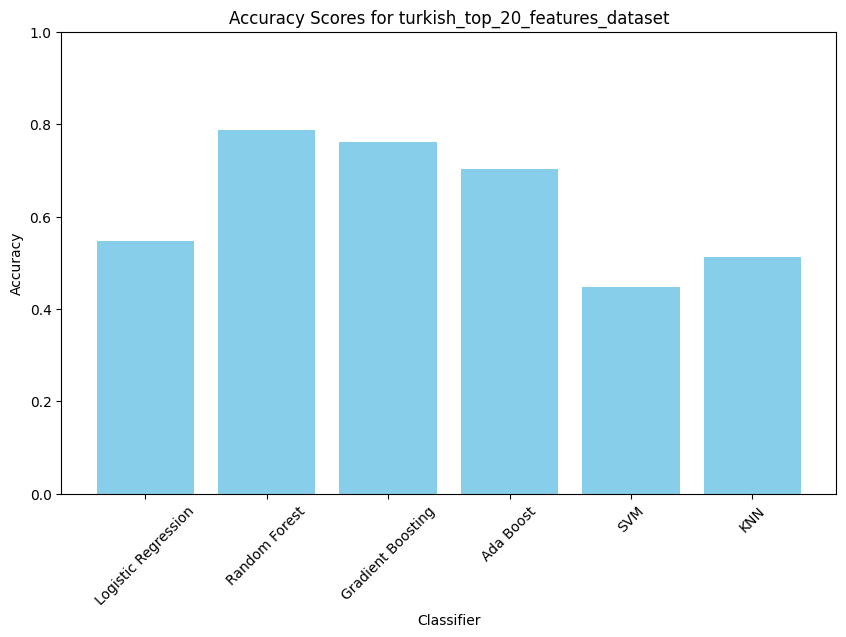

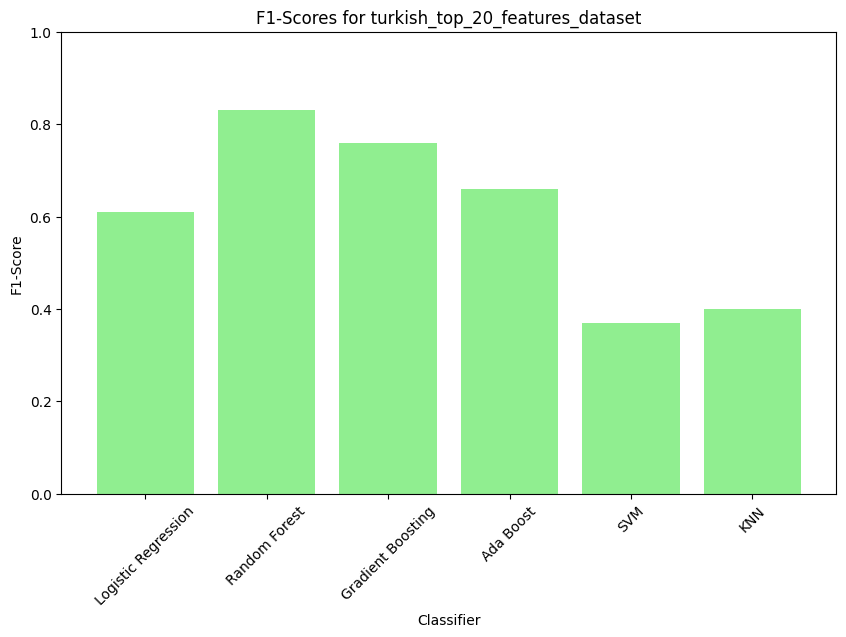

Results for turkish_df:
  Logistic Regression: 0.5469
  Random Forest: 0.7875
  Gradient Boosting: 0.7625
  Ada Boost: 0.7031
  SVM: 0.4469
  KNN: 0.5125

Classification Reports:
  Logistic Regression:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.81      0.94      0.87        18
           2       0.62      0.50      0.55        26
           3       0.44      0.61      0.51        18

    accuracy                           0.61        80
   macro avg       0.62      0.62      0.61        80
weighted avg       0.62      0.61      0.61        80

  Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.81      0.94      0.87        18
           2       0.88      0.81      0.84        26
           3       0.68      0.72      0.70        18

    accuracy                           0.82        80
   macro avg       0

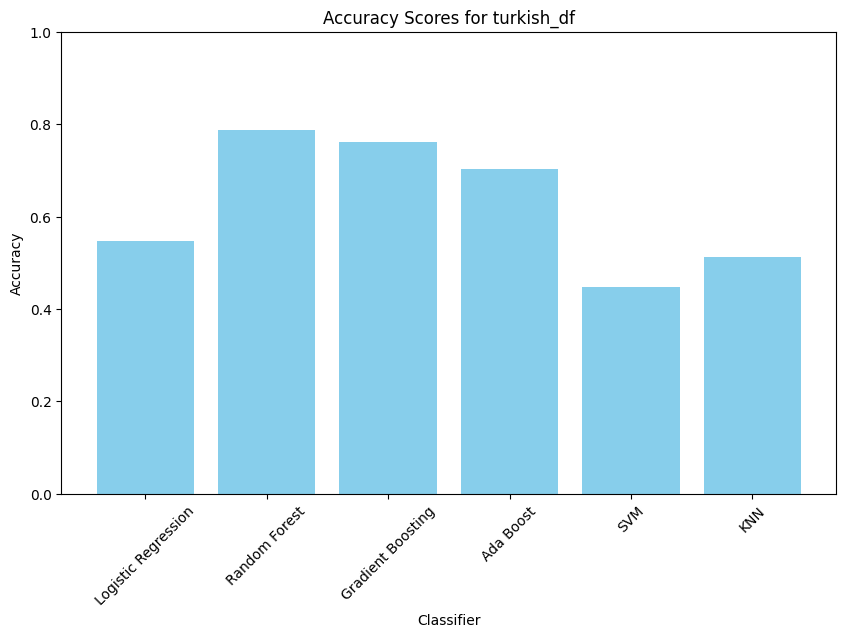

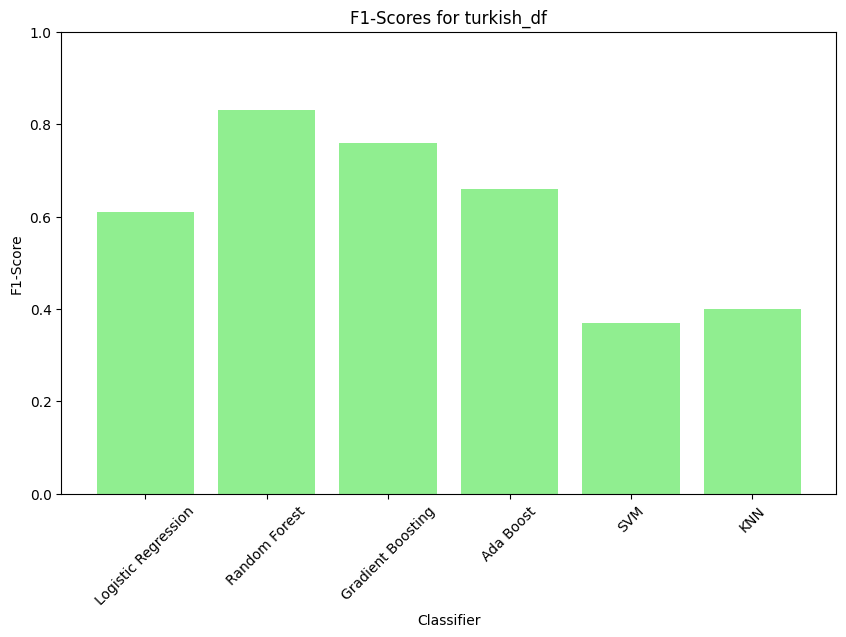

Results for turkish_mfcc_df:
  Logistic Regression: 0.5219
  Random Forest: 0.5844
  Gradient Boosting: 0.5844
  Ada Boost: 0.5437
  SVM: 0.5406
  KNN: 0.5219

Classification Reports:
  Logistic Regression:
              precision    recall  f1-score   support

       angry       0.50      0.50      0.50        18
       happy       0.52      0.67      0.59        18
       relax       0.62      0.50      0.55        26
         sad       0.33      0.33      0.33        18

    accuracy                           0.50        80
   macro avg       0.49      0.50      0.49        80
weighted avg       0.51      0.50      0.50        80

  Random Forest:
              precision    recall  f1-score   support

       angry       0.67      0.44      0.53        18
       happy       0.52      0.67      0.59        18
       relax       0.77      0.65      0.71        26
         sad       0.43      0.56      0.49        18

    accuracy                           0.59        80
   macro avg   

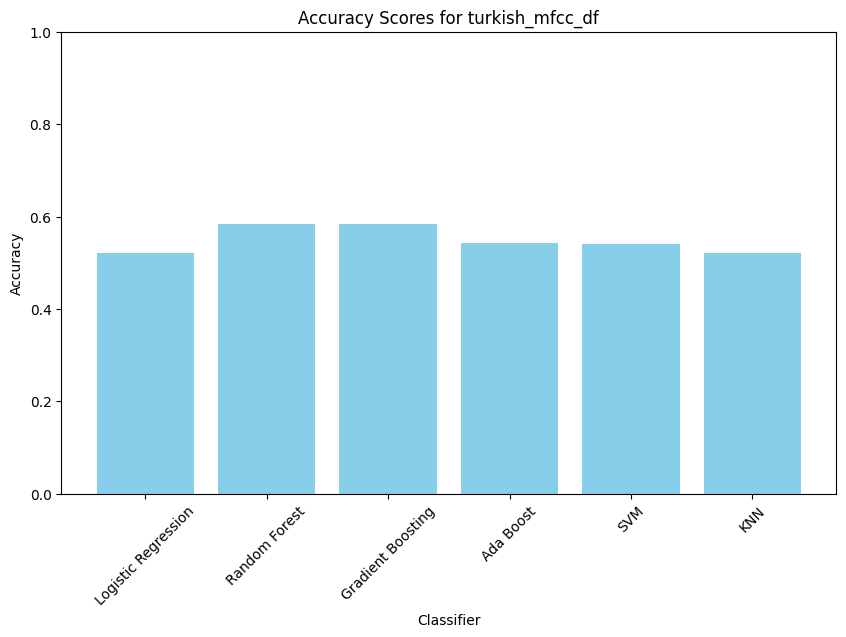

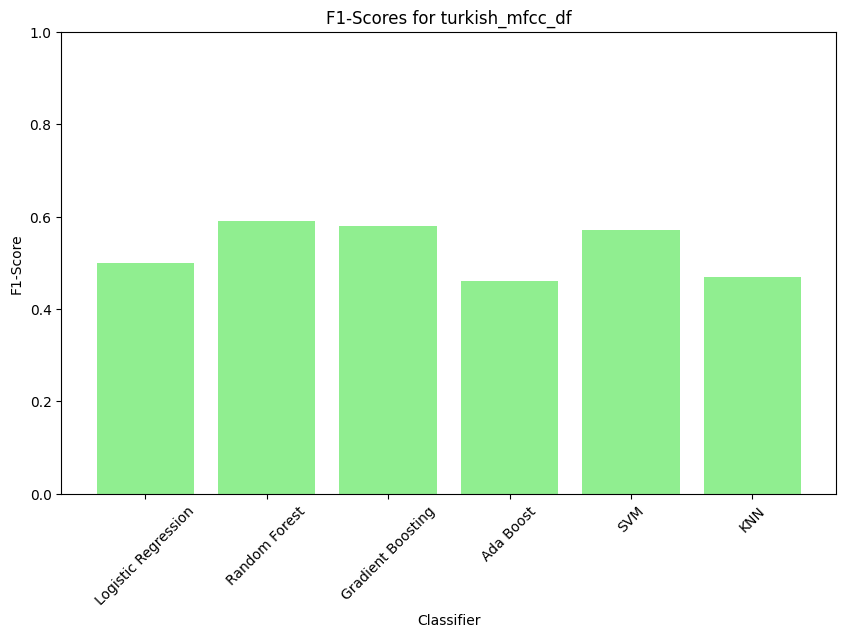

Results for turkish_Chromagram_df:
  Logistic Regression: 0.4188
  Random Forest: 0.5250
  Gradient Boosting: 0.5094
  Ada Boost: 0.4156
  SVM: 0.5156
  KNN: 0.5000

Classification Reports:
  Logistic Regression:
              precision    recall  f1-score   support

       angry       0.26      0.44      0.33        18
       happy       0.43      0.50      0.46        18
       relax       0.60      0.23      0.33        26
         sad       0.28      0.28      0.28        18

    accuracy                           0.35        80
   macro avg       0.39      0.36      0.35        80
weighted avg       0.41      0.35      0.35        80

  Random Forest:
              precision    recall  f1-score   support

       angry       0.44      0.44      0.44        18
       happy       0.52      0.72      0.60        18
       relax       0.61      0.42      0.50        26
         sad       0.47      0.50      0.49        18

    accuracy                           0.51        80
   macro 

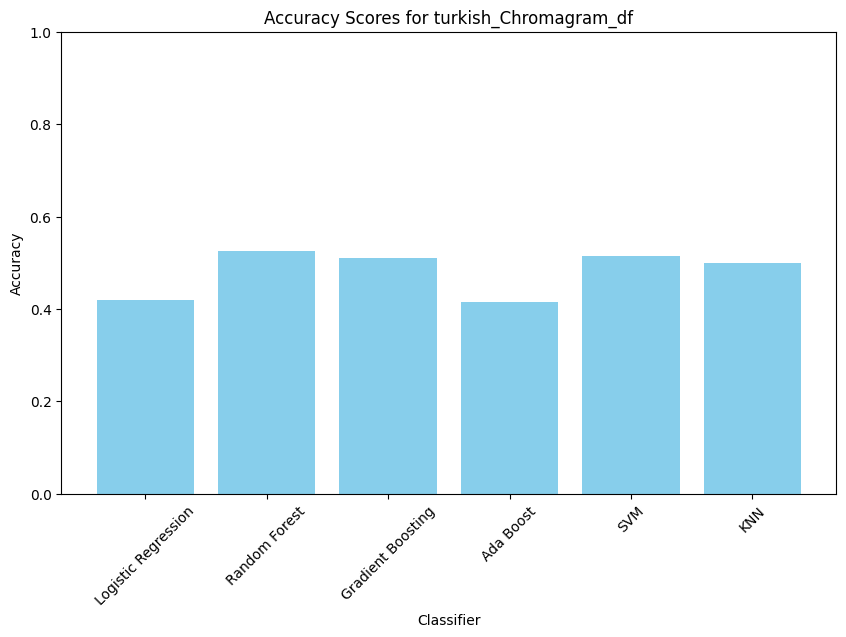

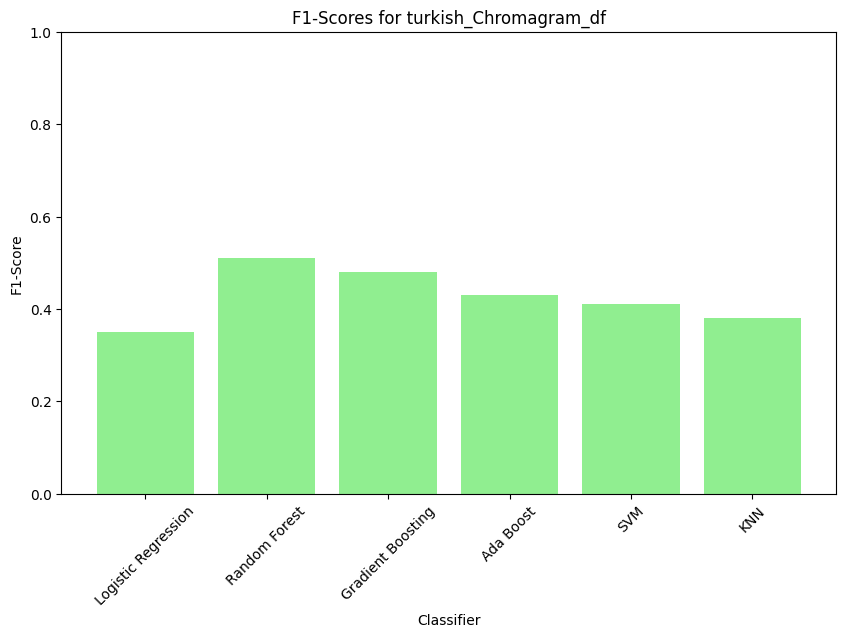

Results for turkish_filtered_df:
  Logistic Regression: 0.5406
  Random Forest: 0.7906
  Gradient Boosting: 0.7562
  Ada Boost: 0.7156
  SVM: 0.4562
  KNN: 0.5125

Classification Reports:
  Logistic Regression:
              precision    recall  f1-score   support

       angry       0.50      0.39      0.44        18
       happy       0.84      0.89      0.86        18
       relax       0.61      0.54      0.57        26
         sad       0.46      0.61      0.52        18

    accuracy                           0.60        80
   macro avg       0.60      0.61      0.60        80
weighted avg       0.60      0.60      0.60        80

  Random Forest:
              precision    recall  f1-score   support

       angry       1.00      0.89      0.94        18
       happy       0.85      0.94      0.89        18
       relax       0.85      0.85      0.85        26
         sad       0.67      0.67      0.67        18

    accuracy                           0.84        80
   macro av

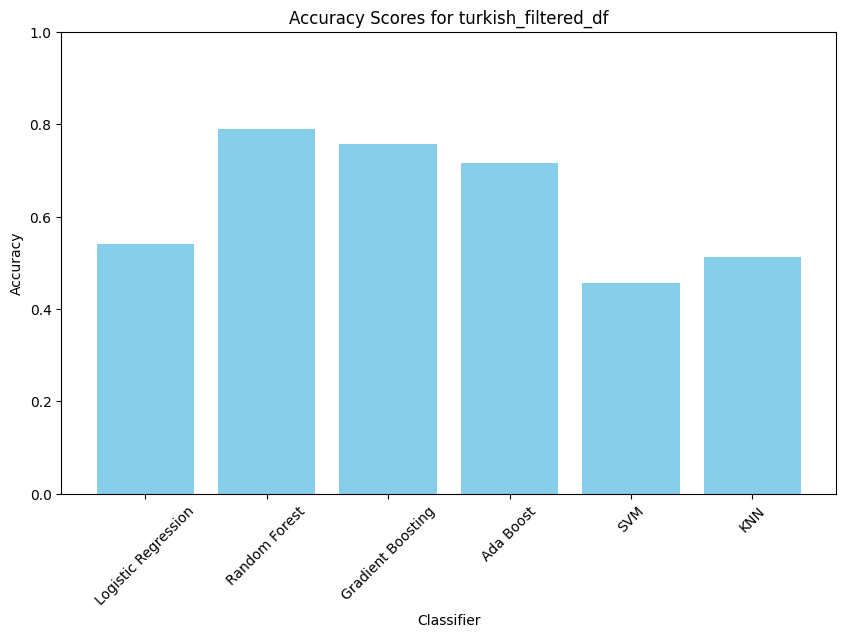

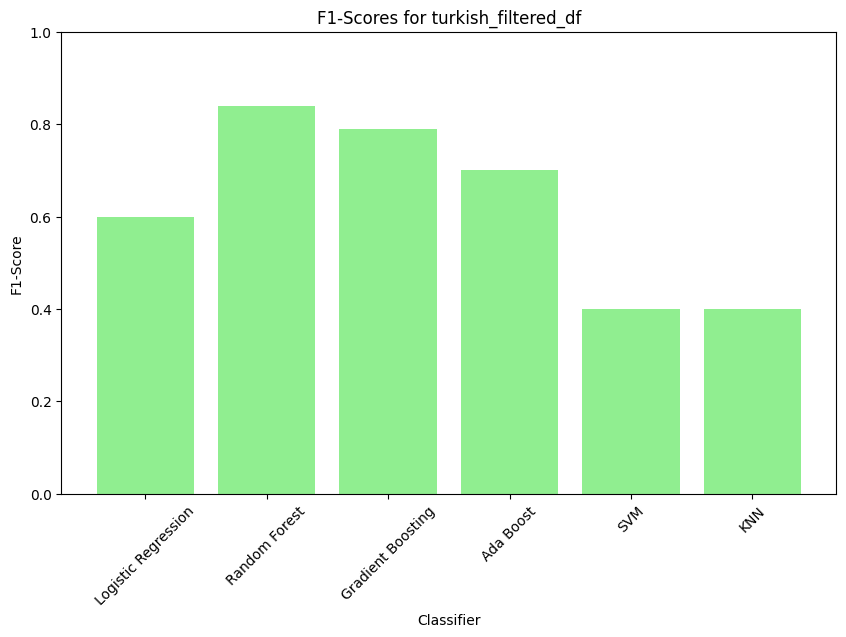

In [52]:
# Display results and classification reports
for dataset_name, scores in results.items():
    print(f"Results for {dataset_name}:")
    for clf_name, score in scores.items():
        print(f"  {clf_name}: {score:.4f}")
    print("\nClassification Reports:")
    for clf_name, report in reports[dataset_name].items():
        print(f"  {clf_name}:\n{report}")

    # Plot accuracy scores
    plt.figure(figsize=(10, 6))
    plt.bar(scores.keys(), scores.values(), color='skyblue')
    plt.title(f"Accuracy Scores for {dataset_name}")
    plt.ylabel("Accuracy")
    plt.xlabel("Classifier")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

    # Plot F1-scores from classification reports
    f1_scores = {clf_name: float(report.split()[-2]) for clf_name, report in reports[dataset_name].items()}
    plt.figure(figsize=(10, 6))
    plt.bar(f1_scores.keys(), f1_scores.values(), color='lightgreen')
    plt.title(f"F1-Scores for {dataset_name}")
    plt.ylabel("F1-Score")
    plt.xlabel("Classifier")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
base_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Ada Boost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42)
}

# Step 2: RandomizedSearchCV
param_distributions = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    "Ada Boost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    "SVM": {
        'C': [0.5, 1, 2],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'poly']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
}

# Step 3: datasets
datasets = {
    "turkish_top_20_features_dataset": turkish_top_20_features_dataset,
    "turkish_df": turkish_df,
    "turkish_mfcc_df": turkish_mfcc_df,
    "turkish_Chromagram_df": turkish_Chromagram_df,
    "turkish_filtered_df": turkish_filtered_df
}

results = {}
reports = {}

# Step 4: preproccessing
for name, dataset in datasets.items():
    print(f"\nProcessing dataset: {name}")

    X = dataset.drop(columns=["Class"])
    y = dataset["Class"]

    # Label encoding
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # RandomizedSearch for each model
    best_estimators = {}
    for model_name, model in base_models.items():
        print(f"Tuning {model_name}...")
        param_grid = param_distributions[model_name]
        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_grid,
            n_iter=10,
            cv=3,
            scoring='accuracy',
            random_state=42,
            n_jobs=-1
        )
        random_search.fit(X_train, y_train)
        best_estimators[model_name] = random_search.best_estimator_
        print(f"Best {model_name}: {random_search.best_params_}")

    # Step 5: VotingClassifier
    voting_clf = VotingClassifier(
        estimators=[(name, est) for name, est in best_estimators.items()],
        voting='soft',
        n_jobs=-1
    )
    voting_clf.fit(X_train, y_train)
    y_pred_voting = voting_clf.predict(X_test)
    report_voting = classification_report(y_test, y_pred_voting)
    voting_score = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Step 6: StackingClassifier
    stacking_clf = StackingClassifier(
        estimators=[(name, est) for name, est in best_estimators.items()],
        final_estimator=LogisticRegression(max_iter=1000, random_state=42),
        passthrough=True,
        n_jobs=-1
    )
    stacking_clf.fit(X_train, y_train)
    y_pred_stacking = stacking_clf.predict(X_test)
    report_stacking = classification_report(y_test, y_pred_stacking)
    stacking_score = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Step 7: save results
    results[name] = {
        "Voting Accuracy": voting_score,
        "Stacking Accuracy": stacking_score
    }
    reports[name] = {
        "Voting Report": report_voting,
        "Stacking Report": report_stacking
    }


for dataset_name, scores in results.items():
    print(f"\nDataset: {dataset_name}")
    for model_type, score in scores.items():
        print(f"{model_type}: {score:.4f}")



Processing dataset: turkish_top_20_features_dataset
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}
Tuning Gradient Boosting...
Best Gradient Boosting: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}
Tuning Ada Boost...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Ada Boost: {'n_estimators': 200, 'learning_rate': 1}
Tuning SVM...
Best SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Tuning KNN...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best KNN: {'weights': 'distance', 'n_neighbors': 9}
Tuning XGBoost...
Best XGBoost: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}

Processing dataset: turkish_df
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}
Tuning Gradient Boosting...
Best Gradient Boosting: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}
Tuning Ada Boost...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Ada Boost: {'n_estimators': 200, 'learning_rate': 1}
Tuning SVM...
Best SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Tuning KNN...
Best KNN: {'weights': 'distance', 'n_neighbors': 9}
Tuning XGBoost...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best XGBoost: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05}

Processing dataset: turkish_mfcc_df
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 20}
Tuning Gradient Boosting...
Best Gradient Boosting: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
Tuning Ada Boost...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Ada Boost: {'n_estimators': 50, 'learning_rate': 1}
Tuning SVM...
Best SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Tuning KNN...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best KNN: {'weights': 'distance', 'n_neighbors': 7}
Tuning XGBoost...
Best XGBoost: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}

Processing dataset: turkish_Chromagram_df
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Tuning Gradient Boosting...
Best Gradient Boosting: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Tuning Ada Boost...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Ada Boost: {'n_estimators': 50, 'learning_rate': 1}
Tuning SVM...
Best SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 2}
Tuning KNN...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best KNN: {'weights': 'distance', 'n_neighbors': 9}
Tuning XGBoost...
Best XGBoost: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}

Processing dataset: turkish_filtered_df
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Best Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Tuning Gradient Boosting...
Best Gradient Boosting: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
Tuning Ada Boost...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Ada Boost: {'n_estimators': 200, 'learning_rate': 1}
Tuning SVM...
Best SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 2}
Tuning KNN...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best KNN: {'weights': 'distance', 'n_neighbors': 7}
Tuning XGBoost...
Best XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

Dataset: turkish_top_20_features_dataset
Voting Accuracy: 0.8125
Stacking Accuracy: 0.8094

Dataset: turkish_df
Voting Accuracy: 0.8125
Stacking Accuracy: 0.8094

Dataset: turkish_mfcc_df
Voting Accuracy: 0.6438
Stacking Accuracy: 0.6125

Dataset: turkish_Chromagram_df
Voting Accuracy: 0.5531
Stacking Accuracy: 0.5625

Dataset: turkish_filtered_df
Voting Accuracy: 0.8219
Stacking Accuracy: 0.8375


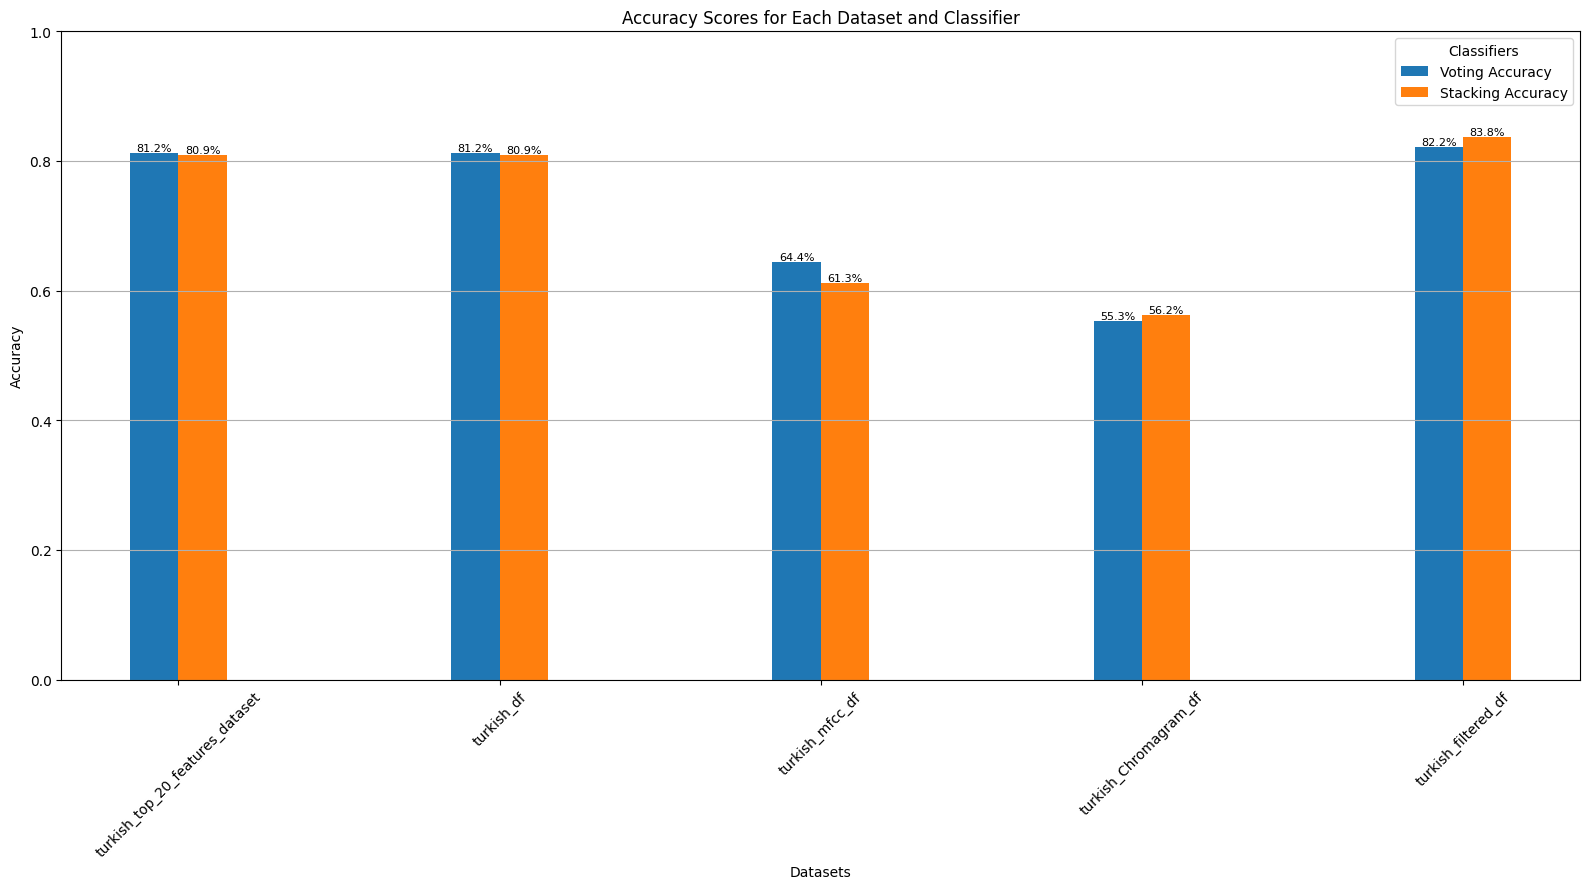

In [ ]:
# Prepare data for grouped bar chart
datasets = list(results.keys())
classifiers = list(next(iter(results.values())).keys())
accuracy_data = {clf: [results[dataset][clf] for dataset in datasets] for clf in classifiers}

# Plot grouped bar chart
x = np.arange(len(datasets))  # Dataset indices
width = 0.15  # Width of each bar

plt.figure(figsize=(16, 9))  # Increase the figure size
for i, (clf, accuracies) in enumerate(accuracy_data.items()):
    plt.bar(x + i * width, accuracies, width, label=clf)

# Add labels, title, and legend
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores for Each Dataset and Classifier")
plt.xticks(x + width * (len(classifiers) - 1) / 2, datasets, rotation=45)
plt.ylim(0, 1)
plt.legend(title="Classifiers")
plt.grid(axis='y')

# Add percentages on top of the bars
for i, (clf, accuracies) in enumerate(accuracy_data.items()):
    for j, acc in enumerate(accuracies):
        plt.text(x[j] + i * width, acc, f"{acc * 100:.1f}%", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## XGBoost only

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [21:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 1.0000
Testing Accuracy: 0.7875
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.83      0.83      0.83        18
           2       0.79      0.88      0.84        26
           3       0.69      0.50      0.58        18

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.79      0.78        80



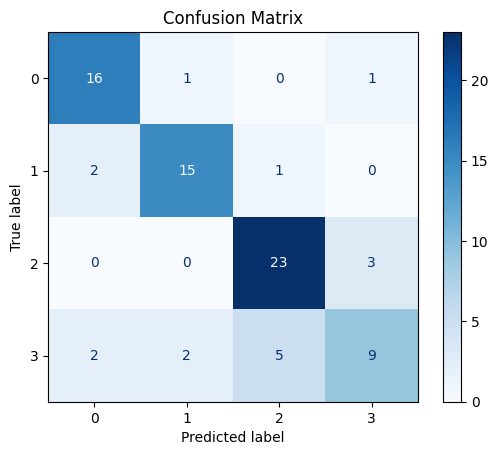

In [27]:
# Encode the target variable
turkish_df['Class'] = LabelEncoder().fit_transform(turkish_df['Class'])

X = turkish_df.drop(columns=["Class"])
y = turkish_df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
clf.fit(X_train, y_train)

# Display the results
print(f"Training Accuracy: {clf.score(X_train, y_train):.4f}")
print(f"Testing Accuracy: {clf.score(X_test, y_test):.4f}")

# Generate predictions
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## CNN Turkish All Features

In [60]:
# Preprocess the data

X_turkish = turkish_df.drop(columns=["Class"]).values
y_turkish = turkish_df["Class"].values

In [61]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_turkish)
y_categorical = to_categorical(y_encoded)

In [62]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_turkish)

# Reshape the data for CNN (add a channel dimension)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42)

In [ ]:

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(X_train.shape[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),

    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 50, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 12, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 6, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 6, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,828 (2.62 MB)

 Trainable params: 683,908 (2.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [64]:

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
turkish_test_loss, turkish_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {turkish_test_accuracy:.4f}")
print(f"Test Loss: {turkish_test_loss:.4f}")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.3016 - loss: 12.4799 - val_accuracy: 0.2375 - val_loss: 12.0663 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3919 - loss: 12.0152 - val_accuracy: 0.3000 - val_loss: 11.6763 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4398 - loss: 11.4948 - val_accuracy: 0.4250 - val_loss: 11.2678 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4918 - loss: 10.9935 - val_accuracy: 0.3000 - val_loss: 10.8640 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5351 - loss: 10.5308 - val_accuracy: 0.4125 - val_loss: 10.4456 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4603 - loss: 10.2030 - val_accuracy: 0.2375 - val_loss: 10.0616 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5129 - los

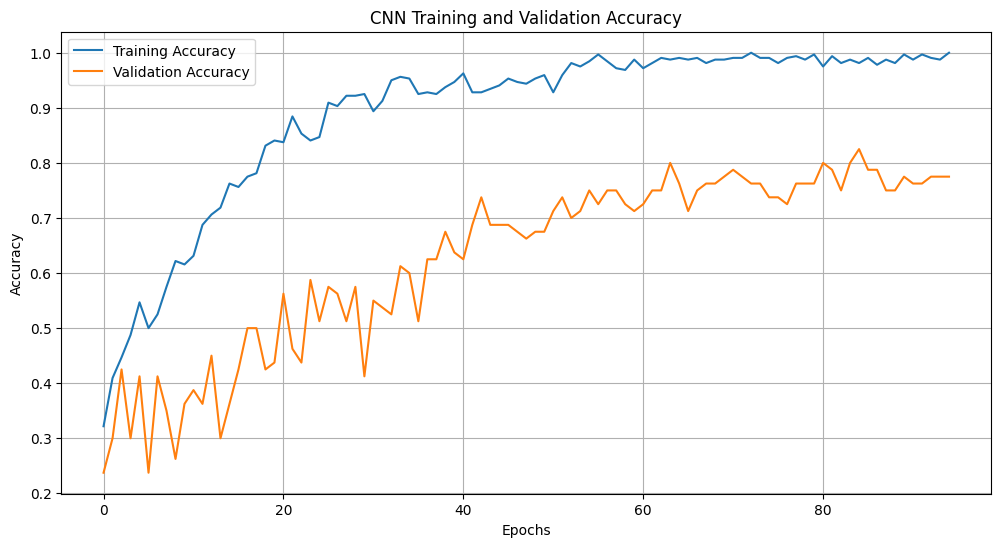

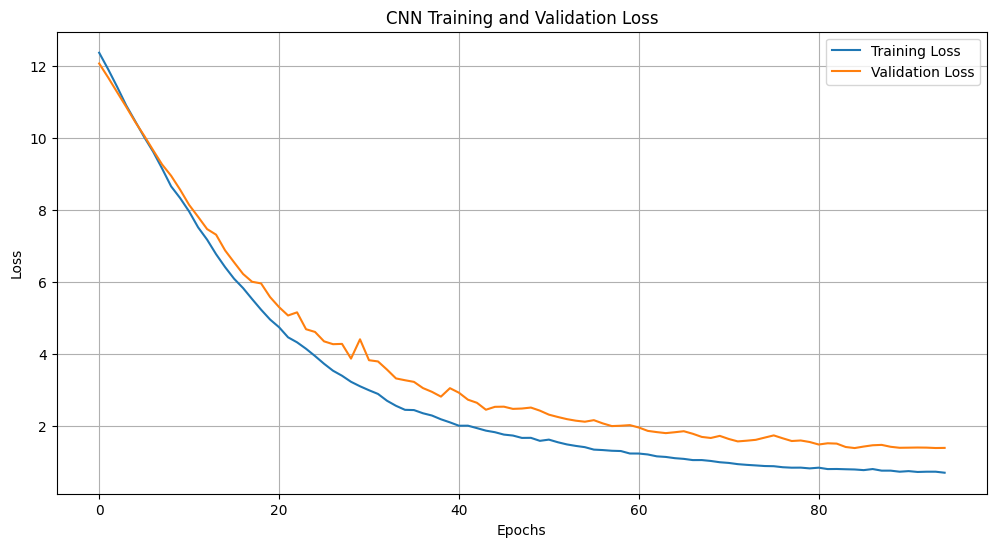

In [66]:
# Train the model without EarlyStopping
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## CNN Turkish MFCC

In [67]:
# Preprocess the data
X = turkish_mfcc_df.drop(columns=["Class"]).values
y = turkish_mfcc_df["Class"].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for CNN (add a channel dimension)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [ ]:

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(X_train.shape[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),  # Use global average pooling instead of flattening
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 13, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 6, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 3, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 3, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 1, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,828 (2.62 MB)

 Trainable params: 683,908 (2.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [69]:

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
turkish_mfcc_test_loss, turkish_mfcc_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {turkish_mfcc_test_accuracy:.4f}")
print(f"Test Loss : {turkish_mfcc_test_loss:.4f}")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.2662 - loss: 13.1667 - val_accuracy: 0.2500 - val_loss: 11.2831 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3435 - loss: 11.4301 - val_accuracy: 0.2375 - val_loss: 10.5234 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3818 - loss: 10.7021 - val_accuracy: 0.2125 - val_loss: 10.0717 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4069 - loss: 10.2197 - val_accuracy: 0.2125 - val_loss: 9.7896 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4017 - loss: 9.7830 - val_accuracy: 0.2125 - val_loss: 9.6035 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4296 - loss: 9.5193 - val_accuracy: 0.2125 - val_loss: 9.4611 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3906 - loss: 9.

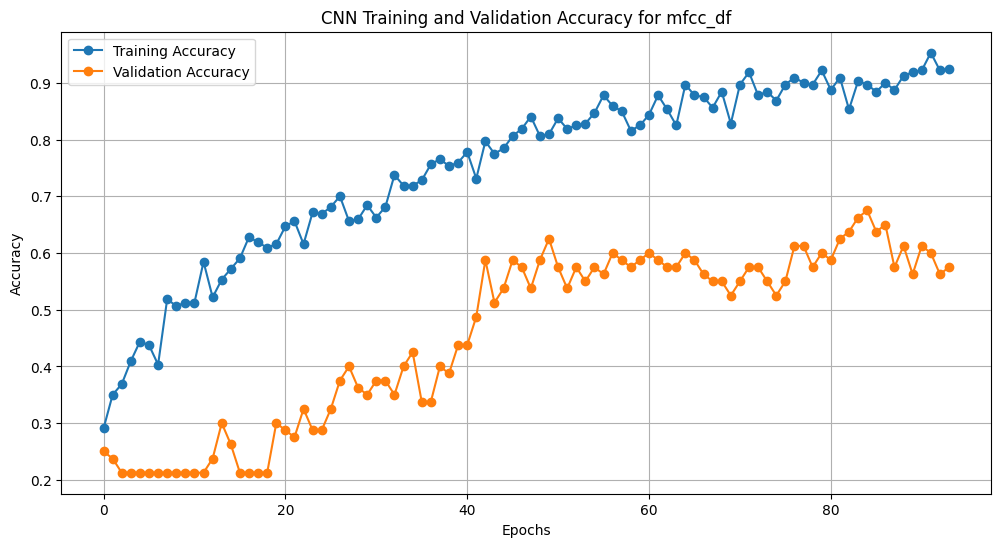

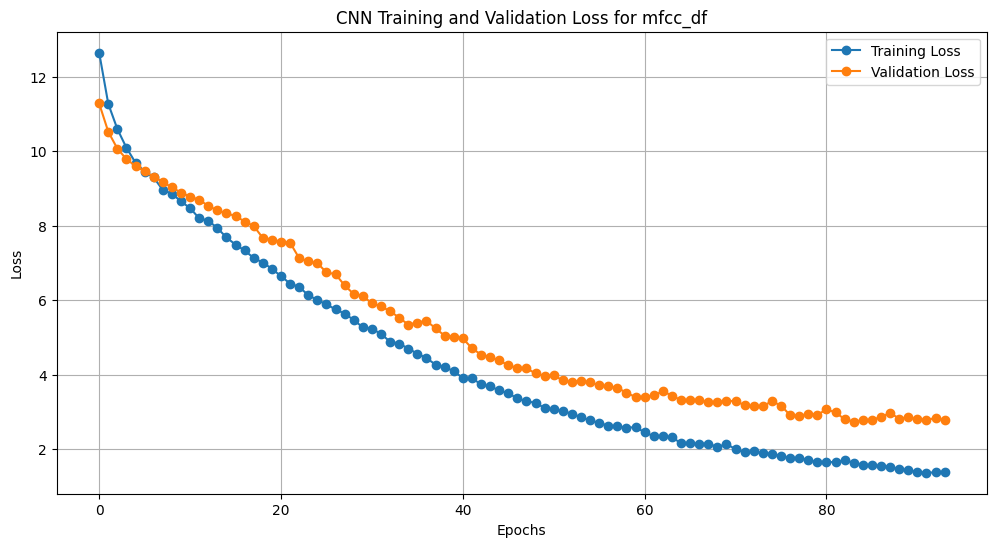

In [70]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy', marker='o')
plt.title('CNN Training and Validation Accuracy for mfcc_df')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('CNN Training and Validation Loss for mfcc_df')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## CNN Turkish Chromagram

In [81]:
# Preprocess the data
X = turkish_Chromagram_df.drop(columns=["Class"]).values
y = turkish_Chromagram_df["Class"].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for CNN (add a channel dimension)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [ ]:

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(X_train.shape[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),  # Use global average pooling instead of flattening
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 12, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 12, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 6, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, 3, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 3, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 1, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 1, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_8      │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,828 (2.62 MB)

 Trainable params: 683,908 (2.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [83]:

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.2937 - loss: 12.7839 - val_accuracy: 0.2125 - val_loss: 11.2952 - learning_rate: 0.0010
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3098 - loss: 11.5360 - val_accuracy: 0.3625 - val_loss: 10.5247 - learning_rate: 0.0010
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3359 - loss: 10.6931 - val_accuracy: 0.2250 - val_loss: 10.0560 - learning_rate: 0.0010
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3126 - loss: 10.1763 - val_accuracy: 0.2250 - val_loss: 9.7678 - learning_rate: 0.0010
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3889 - loss: 9.7357 - val_accuracy: 0.2250 - val_loss: 9.5593 - learning_rate: 0.0010
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3659 - loss: 9.6508 - val_accuracy: 0.2250 - val_loss: 9.3844 - learning_rate: 0.0010
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4276 - loss: 9.

In [84]:
# Evaluate the model
chroma_test_loss, chroma_test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {chroma_test_accuracy:.4f}")
print(f"Test Loss : {chroma_test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4602 - loss: 3.4468
Test Accuracy: 0.4750
Test Loss : 3.4356


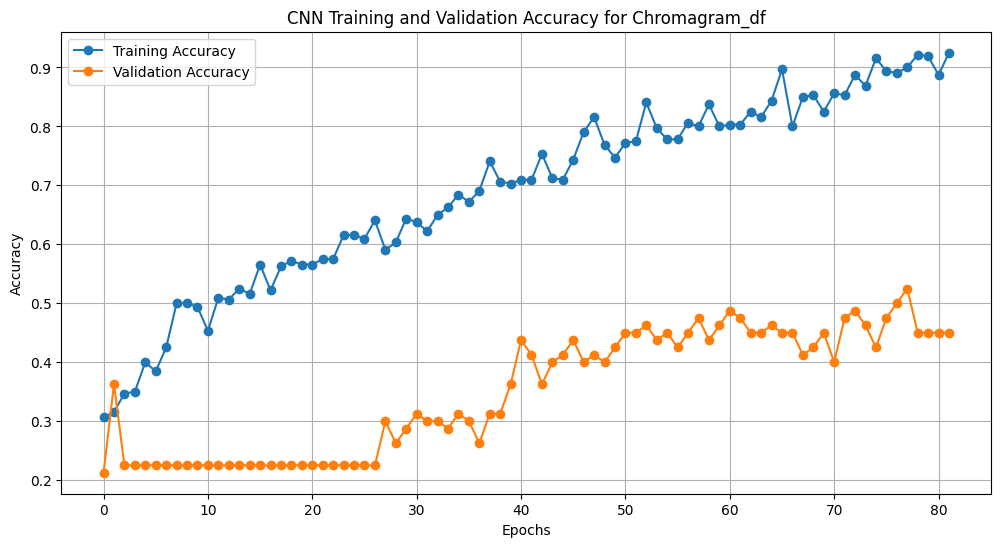

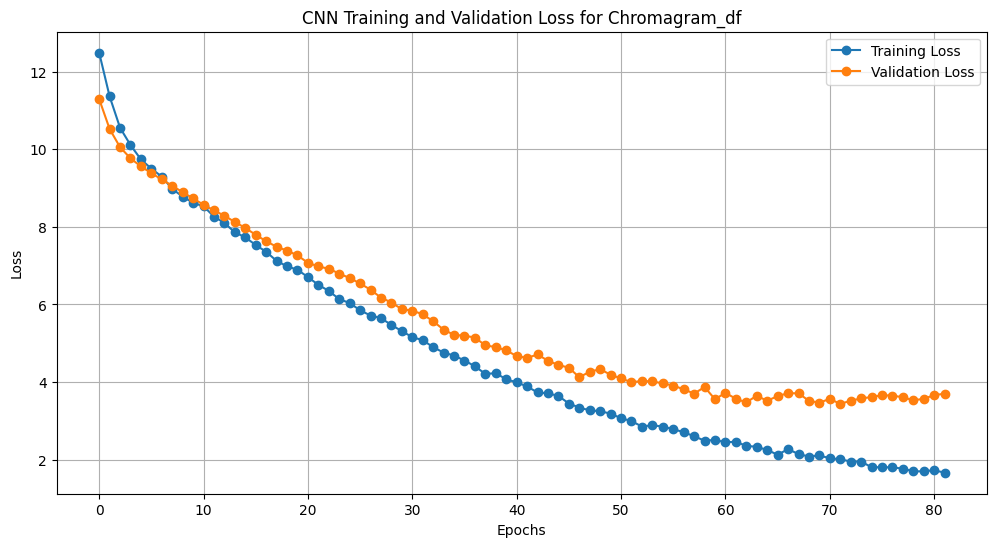

In [85]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy', marker='o')
plt.title('CNN Training and Validation Accuracy for Chromagram_df')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('CNN Training and Validation Loss for Chromagram_df')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## CNN Turkish non mfcc and chroma features

In [86]:
# Preprocess the data
X = turkish_filtered_df.drop(columns=["Class"]).values
y = turkish_filtered_df["Class"].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for CNN (add a channel dimension)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [ ]:

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(X_train.shape[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)              │ (None, 25, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 25, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 12, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ (None, 6, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 6, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_39 (Conv1D)              │ (None, 3, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 3, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_9      │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,828 (2.62 MB)

 Trainable params: 683,908 (2.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [88]:

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3245 - loss: 12.5955 - val_accuracy: 0.3250 - val_loss: 12.1235 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4564 - loss: 11.9968 - val_accuracy: 0.3250 - val_loss: 11.7912 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5013 - loss: 11.5890 - val_accuracy: 0.4500 - val_loss: 11.4339 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5207 - loss: 11.1233 - val_accuracy: 0.4750 - val_loss: 11.0699 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5383 - loss: 10.7277 - val_accuracy: 0.3875 - val_loss: 10.7225 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4657 - loss: 10.4715 - val_accuracy: 0.3625 - val_loss: 10.3676 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5636 - los

In [89]:

# Evaluate the model
turkish_filtered_df_loss, turkish_filtered_df_accuracy = model.evaluate(
    X_test, y_test)
print(f"Test Accuracy: {turkish_filtered_df_accuracy:.4f}")
print(f"Test Loss : {turkish_filtered_df_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8070 - loss: 1.3963
Test Accuracy: 0.8250
Test Loss : 1.4073


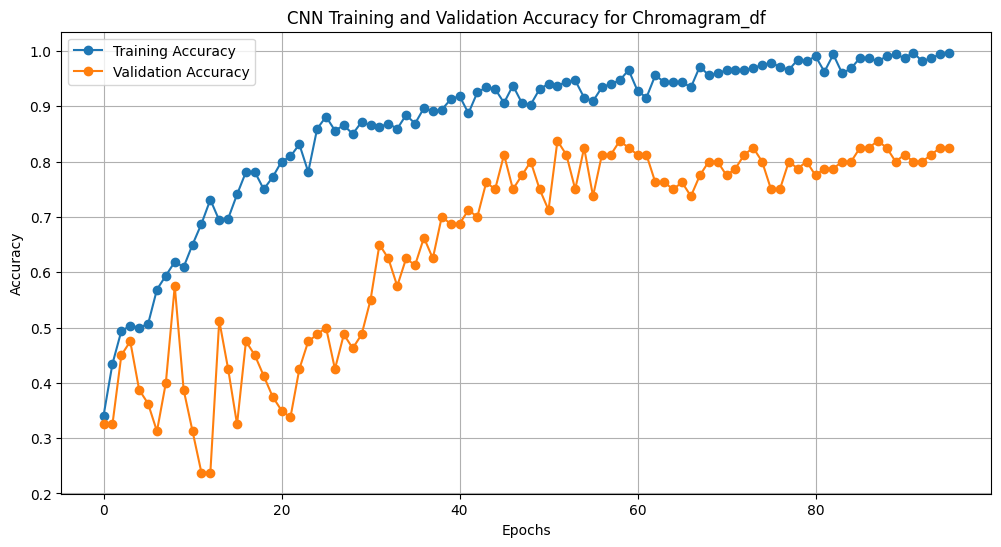

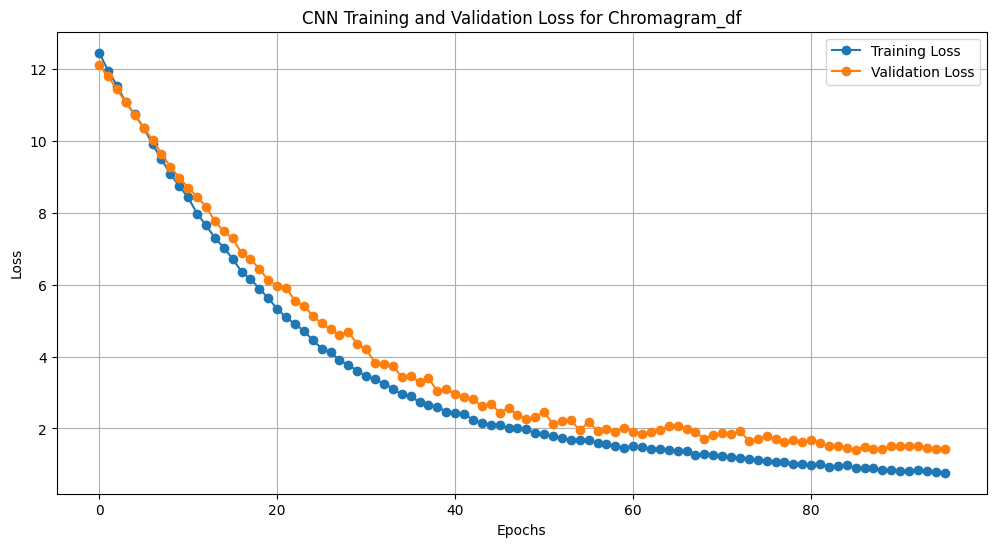

In [90]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy', marker='o')
plt.title('CNN Training and Validation Accuracy for Chromagram_df')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('CNN Training and Validation Loss for Chromagram_df')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# Preprocess the data
X = turkish_top_20_features_dataset.drop(columns=["Class"]).values
y = turkish_top_20_features_dataset["Class"].values

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for CNN (add a channel dimension)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_categorical, test_size=0.2, random_state=42)


In [92]:

# Build the improved CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(X_train.shape[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu',
           kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    GlobalAveragePooling1D(),  # Use global average pooling instead of flattening
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.summary()

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_40 (Conv1D)              │ (None, 50, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_30 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 25, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_42 (Conv1D)              │ (None, 12, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_32 (MaxPooling1D) │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 6, 512)         │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 6, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_10     │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,828 (2.62 MB)

 Trainable params: 683,908 (2.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [93]:

# Compile the model with a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.2772 - loss: 12.4577 - val_accuracy: 0.2500 - val_loss: 12.0128 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4474 - loss: 11.7958 - val_accuracy: 0.2875 - val_loss: 11.5736 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4116 - loss: 11.3644 - val_accuracy: 0.2375 - val_loss: 11.1284 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5134 - loss: 10.7997 - val_accuracy: 0.3250 - val_loss: 10.6730 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5329 - loss: 10.3385 - val_accuracy: 0.2375 - val_loss: 10.2559 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5561 - loss: 9.8276 - val_accuracy: 0.3125 - val_loss: 9.8542 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5386 - loss:

In [94]:

# Evaluate the model
turkish_top_20_loss, turkish_top_20_accuracy = model.evaluate(
    X_test, y_test)
print(f"Test Accuracy: {turkish_top_20_accuracy:.4f}")
print(f"Test Loss : {turkish_top_20_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7898 - loss: 1.2764
Test Accuracy: 0.7750
Test Loss : 1.2944


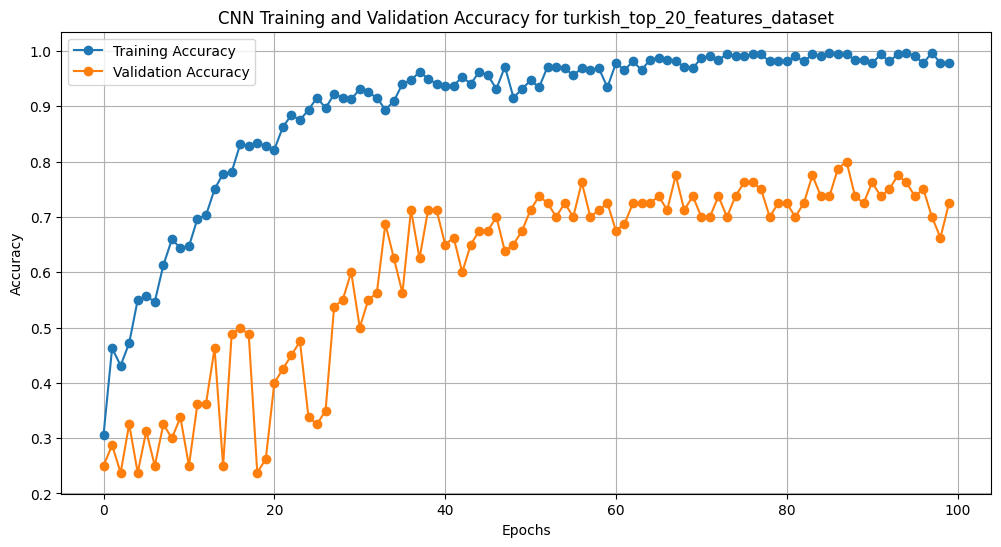

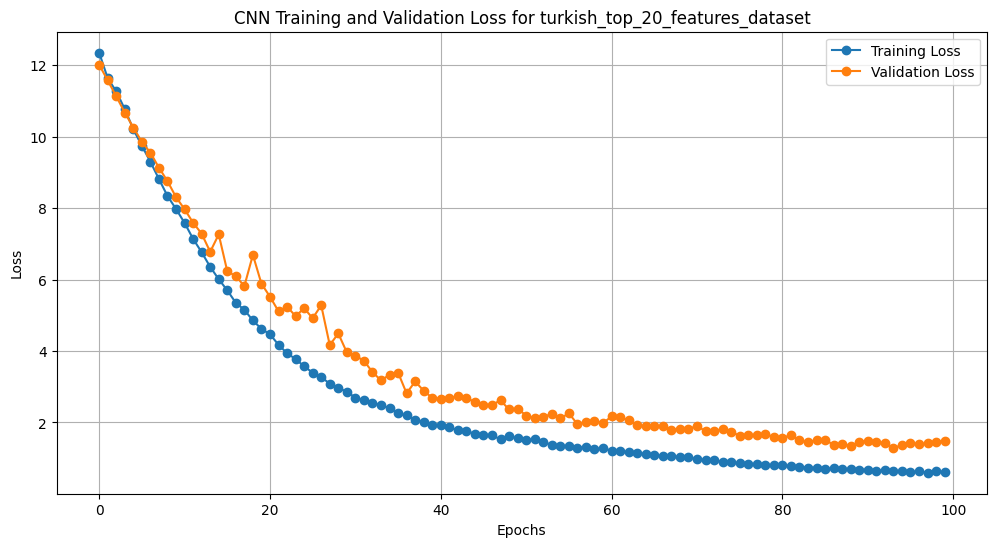

In [95]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], marker='o',
         label='Validation Accuracy')
plt.title('CNN Training and Validation Accuracy for turkish_top_20_features_dataset')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('CNN Training and Validation Loss for turkish_top_20_features_dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
print("turkish_test_accuracy", turkish_test_accuracy*100)
print("turkish_mfcc_test_accuracy", turkish_mfcc_test_accuracy*100)
print("chroma_test_accuracy", chroma_test_accuracy*100)
print("turkish_filtered_df_accuracy", turkish_filtered_df_accuracy*100)
print("turkish_top_20_accuracy", turkish_top_20_accuracy*100)


turkish_test_accuracy 82.4999988079071
turkish_mfcc_test_accuracy 66.25000238418579
chroma_test_accuracy 47.49999940395355
turkish_filtered_df_accuracy 82.4999988079071
turkish_top_20_accuracy 77.49999761581421


# Results of Turkish Dataset

## CNN Results

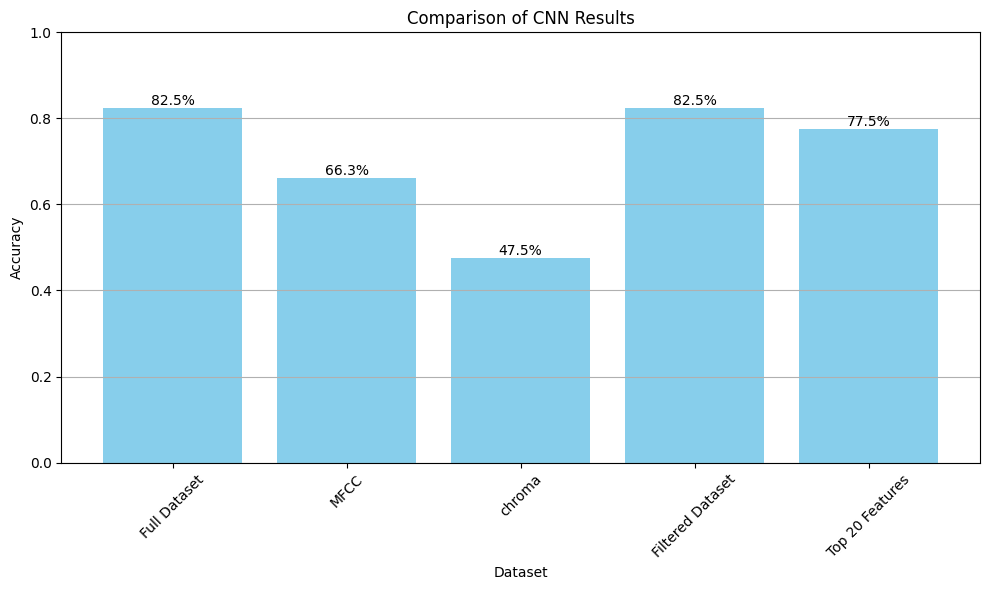

In [97]:
# Define the CNN results
cnn_results = {
    "Full Dataset": turkish_test_accuracy,
    "MFCC": turkish_mfcc_test_accuracy,
    "chroma": chroma_test_accuracy,
    "Filtered Dataset": turkish_filtered_df_accuracy,
    "Top 20 Features": turkish_top_20_accuracy
}

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cnn_results.keys(), cnn_results.values(), color='skyblue')
plt.title("Comparison of CNN Results")
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add accuracy values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{bar.get_height() * 100:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Results of Accuracy

In [99]:
# Consolidate results into a DataFrame
comparison_results = []

for dataset_name, metrics in results.items():
    for clf_name, accuracy in metrics.items():
        comparison_results.append({
            "Dataset": dataset_name,
            "Classifier": clf_name,
            "Accuracy": accuracy
        })

# Convert to a DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Display the consolidated results
print(comparison_df)

# Optionally, save the results to a CSV file
comparison_df.to_csv("comparison_results.csv", index=False)

                            Dataset           Classifier  Accuracy
0   turkish_top_20_features_dataset  Logistic Regression  0.546875
1   turkish_top_20_features_dataset        Random Forest  0.787500
2   turkish_top_20_features_dataset    Gradient Boosting  0.762500
3   turkish_top_20_features_dataset            Ada Boost  0.703125
4   turkish_top_20_features_dataset                  SVM  0.446875
5   turkish_top_20_features_dataset                  KNN  0.512500
6                        turkish_df  Logistic Regression  0.546875
7                        turkish_df        Random Forest  0.787500
8                        turkish_df    Gradient Boosting  0.762500
9                        turkish_df            Ada Boost  0.703125
10                       turkish_df                  SVM  0.446875
11                       turkish_df                  KNN  0.512500
12                  turkish_mfcc_df  Logistic Regression  0.521875
13                  turkish_mfcc_df        Random Forest  0.58

In [100]:
comparison_df

Dataset           Classifier  Accuracy
0   turkish_top_20_features_dataset  Logistic Regression  0.546875
1   turkish_top_20_features_dataset        Random Forest  0.787500
2   turkish_top_20_features_dataset    Gradient Boosting  0.762500
3   turkish_top_20_features_dataset            Ada Boost  0.703125
4   turkish_top_20_features_dataset                  SVM  0.446875
5   turkish_top_20_features_dataset                  KNN  0.512500
6                        turkish_df  Logistic Regression  0.546875
7                        turkish_df        Random Forest  0.787500
8                        turkish_df    Gradient Boosting  0.762500
9                        turkish_df            Ada Boost  0.703125
10                       turkish_df                  SVM  0.446875
11                       turkish_df                  KNN  0.512500
12                  turkish_mfcc_df  Logistic Regression  0.521875
13                  turkish_mfcc_df        Random Forest  0.584375
14                  turkish_mfcc_df    Gradient Boosting  0.584375
15                  turkish_mfcc_df            Ada Boost  0.543750
16                  turkish_mfcc_df                  SVM  0.540625
17                  turkish_mfcc_df                  KNN  0.521875
18            turkish_Chromagram_df  Logistic Regression  0.418750
19            turkish_Chromagram_df        Random Forest  0.525000
20            turkish_Chromagram_df    Gradient Boosting  0.509375
21            turkish_Chromagram_df            Ada Boost  0.415625
22            turkish_Chromagram_df                  SVM  0.515625
23            turkish_Chromagram_df                  KNN  0.500000
24              turkish_filtered_df  Logistic Regression  0.540625
25              turkish_filtered_df        Random Forest  0.790625
26              turkish_filtered_df    Gradient Boosting  0.756250
27              turkish_filtered_df            Ada Boost  0.715625
28              turkish_filtered_df                  SVM  0.456250
29              turkish_filtered_df                  KNN  0.512500

## Results of classifiers reports

                            Dataset           Classifier  Precision  Recall  \
0   turkish_top_20_features_dataset  Logistic Regression       0.62    0.61   
1   turkish_top_20_features_dataset        Random Forest       0.83    0.82   
2   turkish_top_20_features_dataset    Gradient Boosting       0.76    0.76   
3   turkish_top_20_features_dataset            Ada Boost       0.69    0.65   
4   turkish_top_20_features_dataset                  SVM       0.45    0.41   
5   turkish_top_20_features_dataset                  KNN       0.40    0.40   
6                        turkish_df  Logistic Regression       0.62    0.61   
7                        turkish_df        Random Forest       0.83    0.82   
8                        turkish_df    Gradient Boosting       0.76    0.76   
9                        turkish_df            Ada Boost       0.69    0.65   
10                       turkish_df                  SVM       0.45    0.41   
11                       turkish_df                 

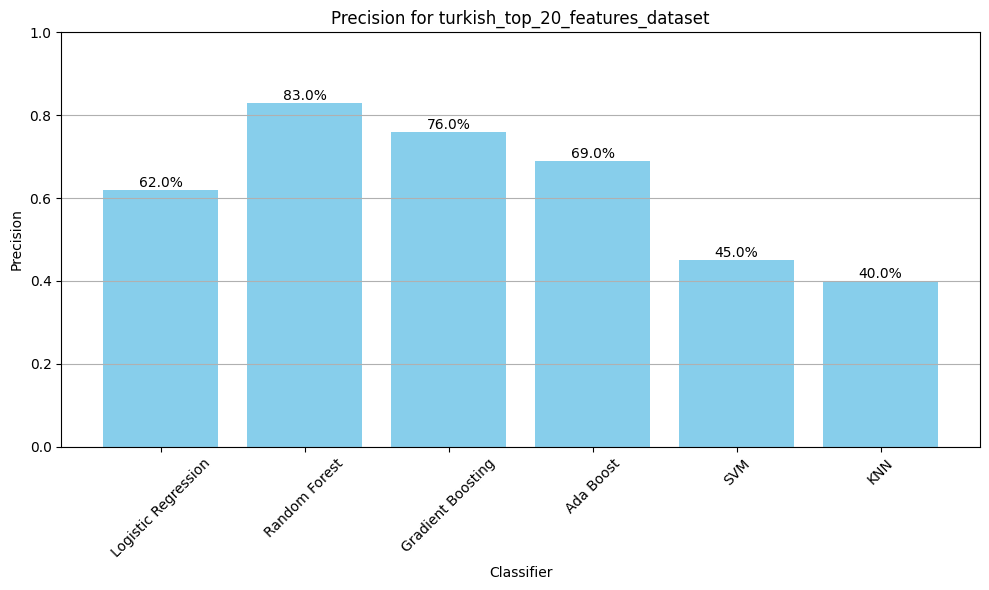

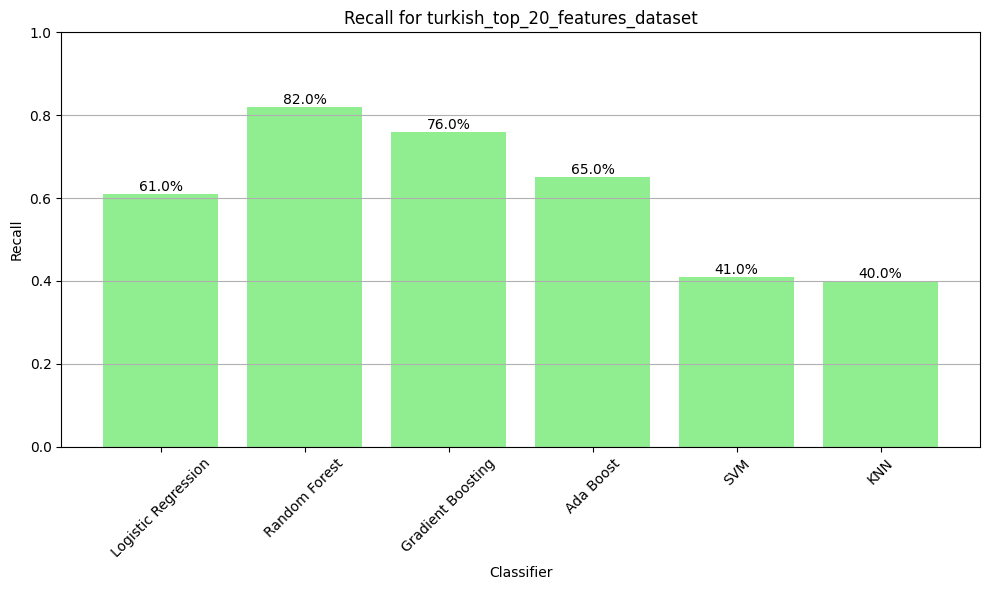

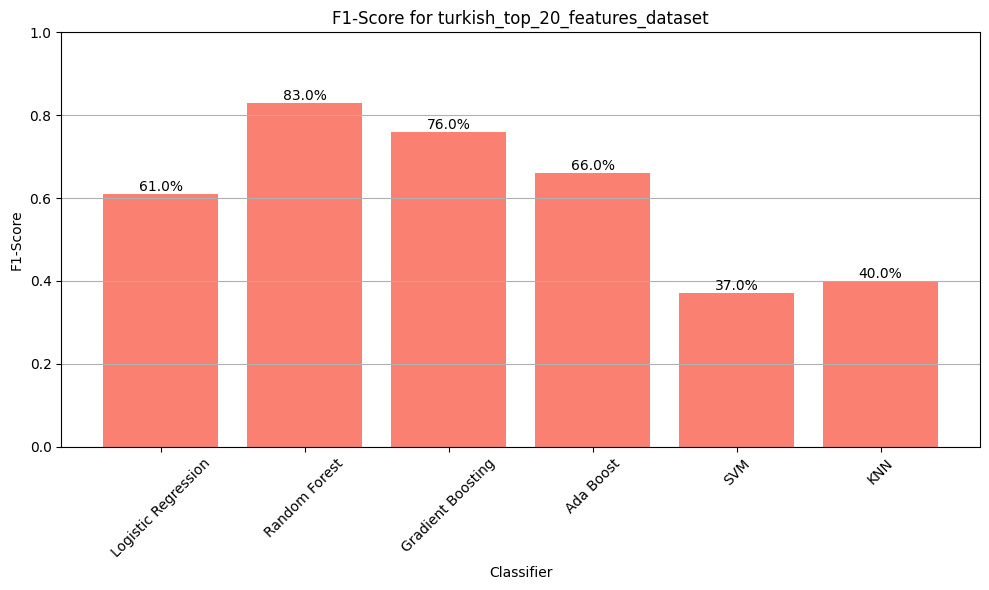

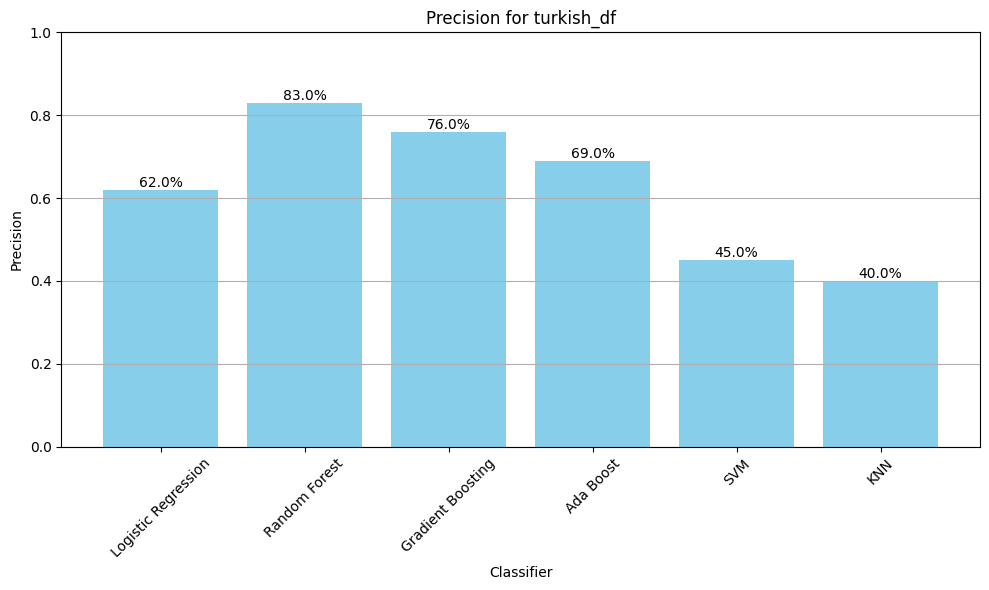

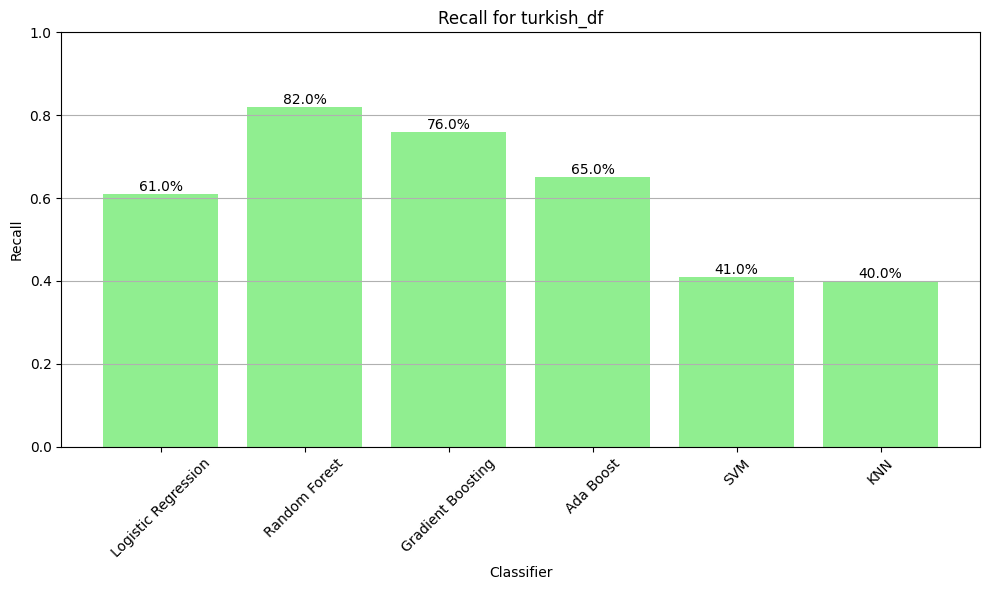

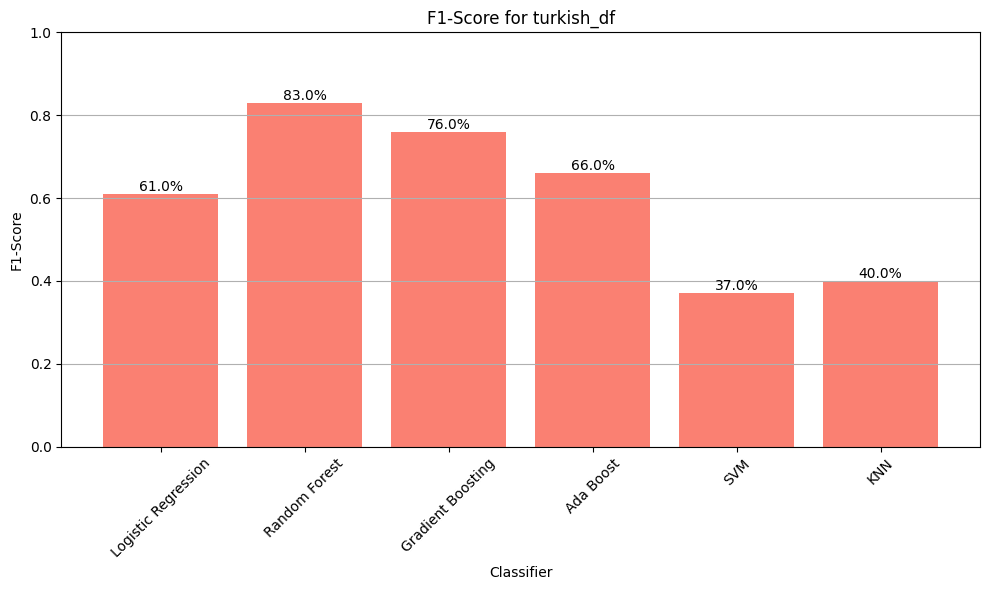

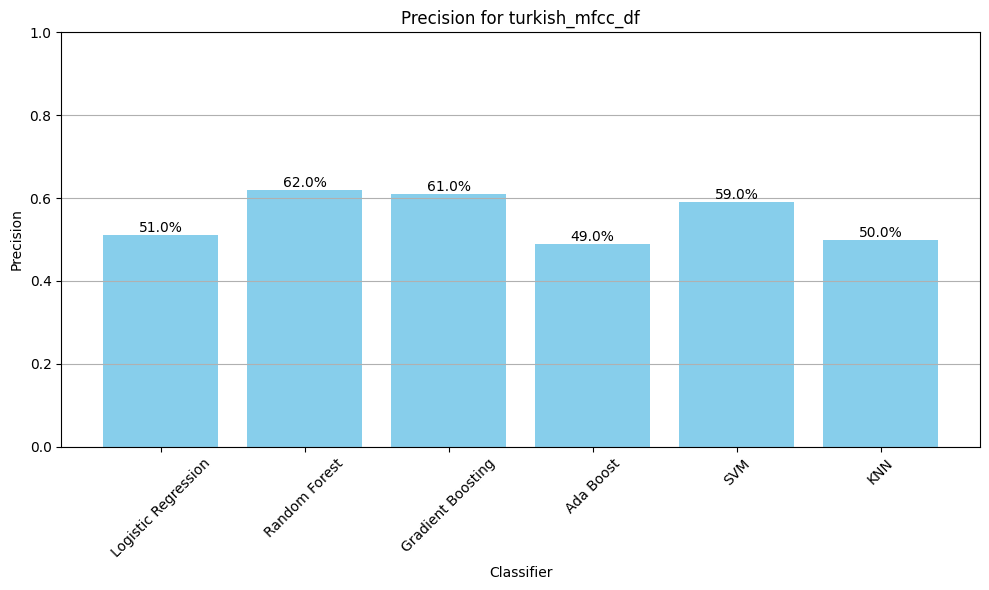

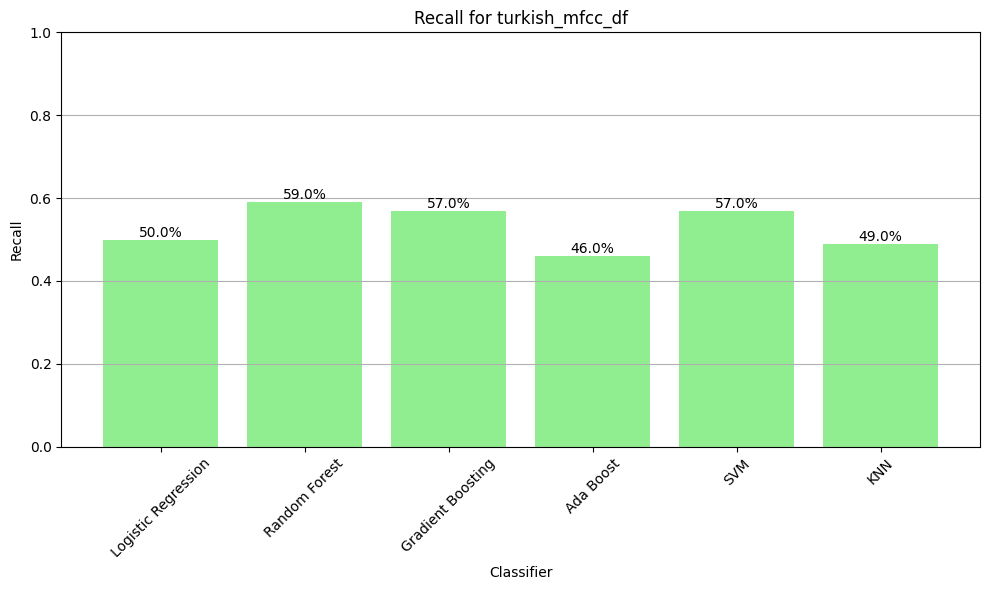

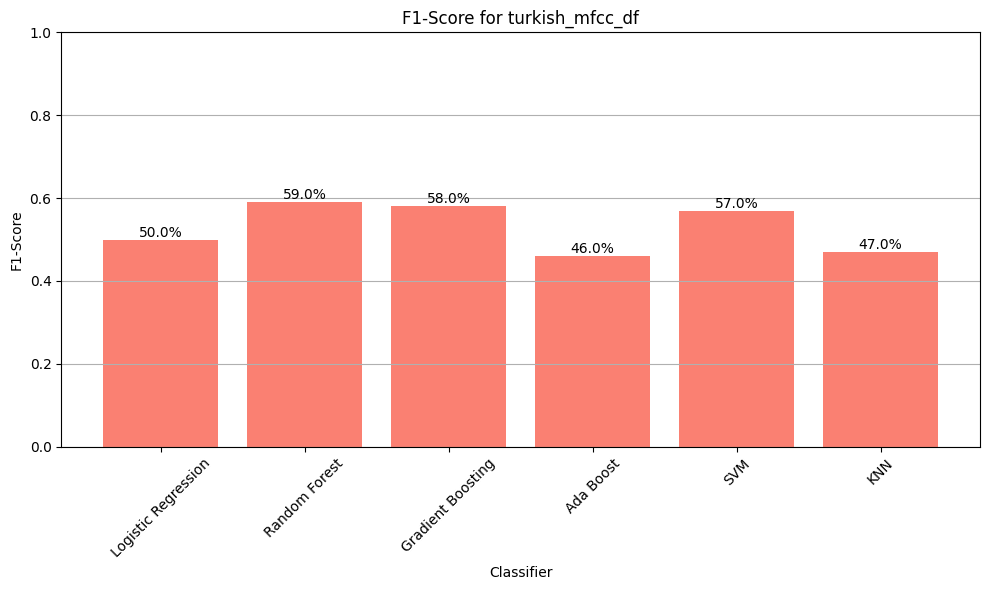

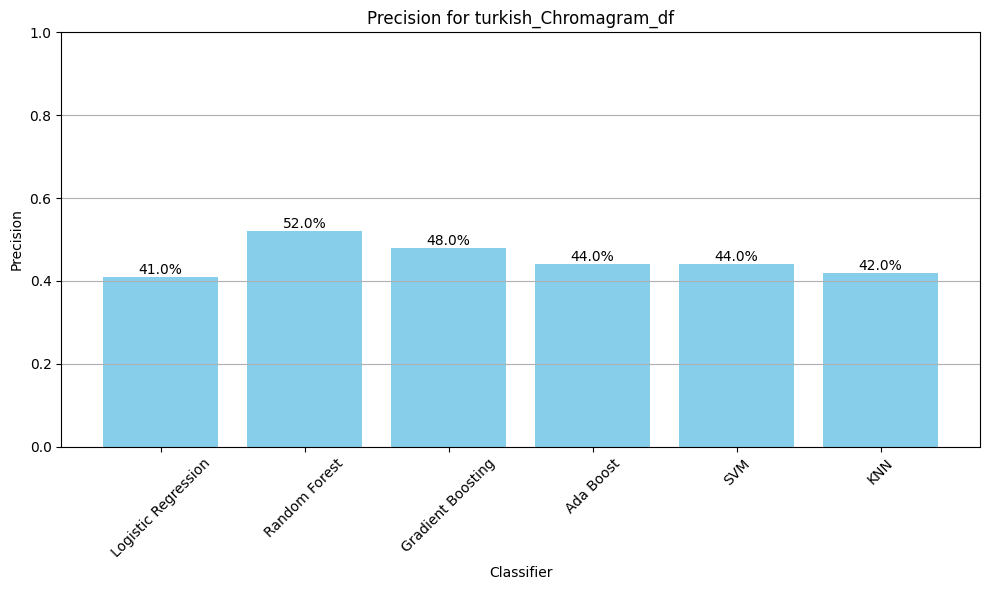

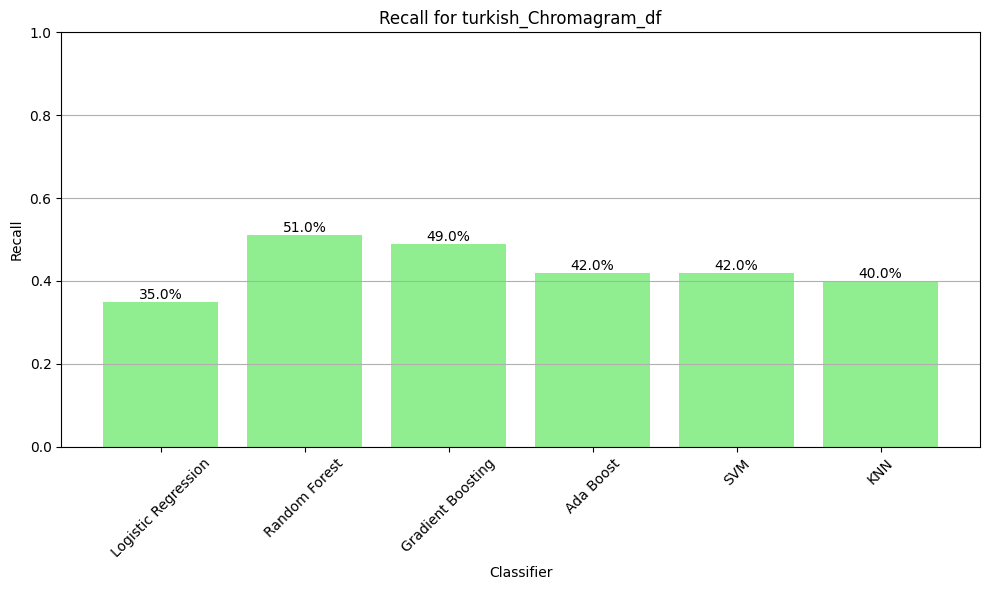

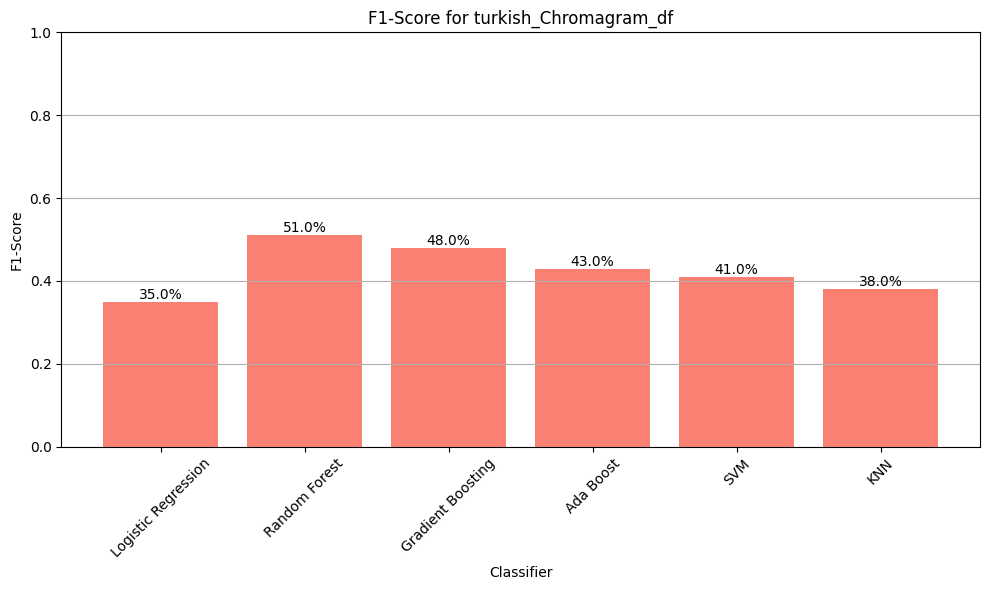

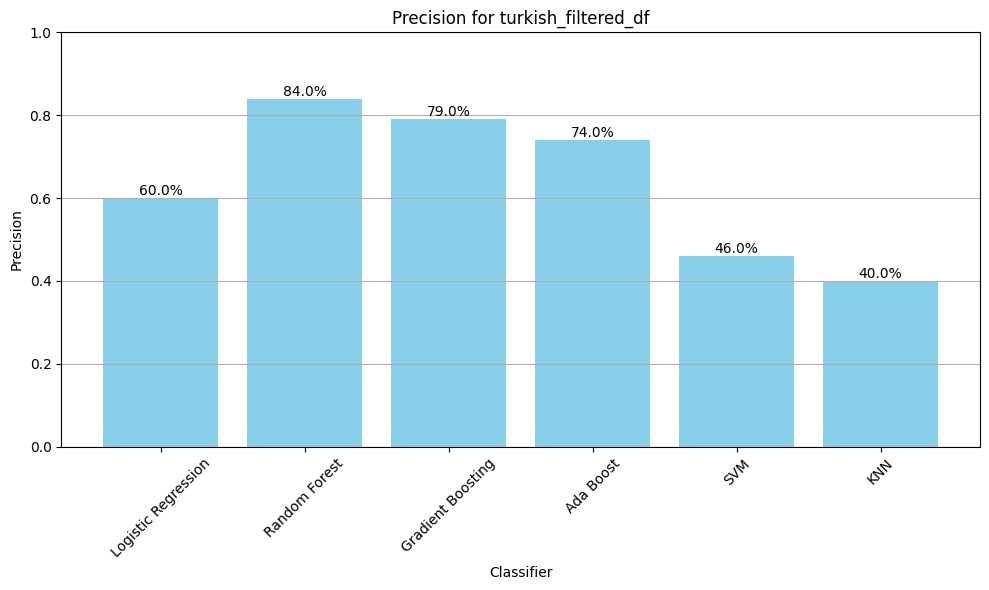

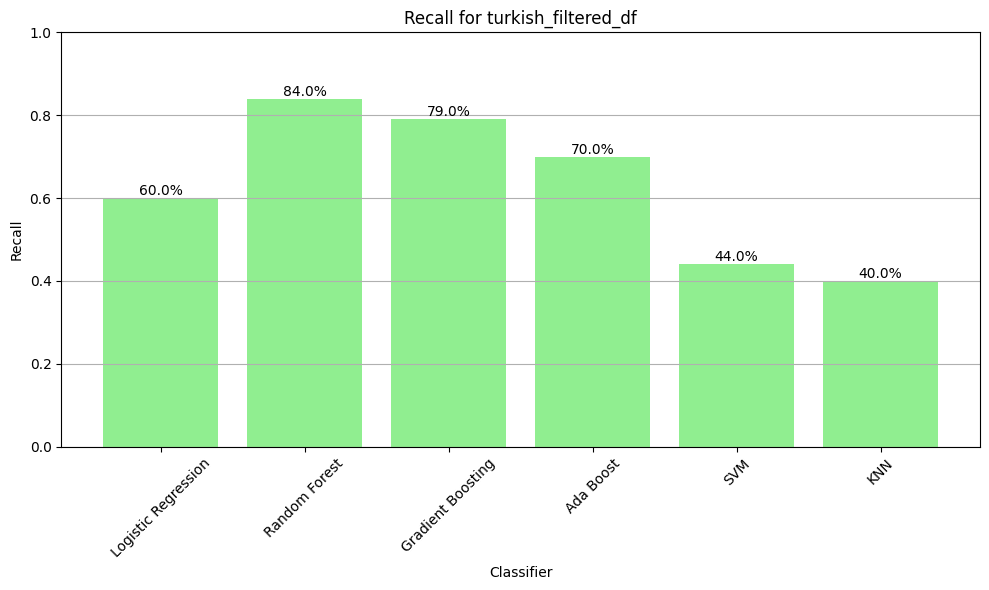

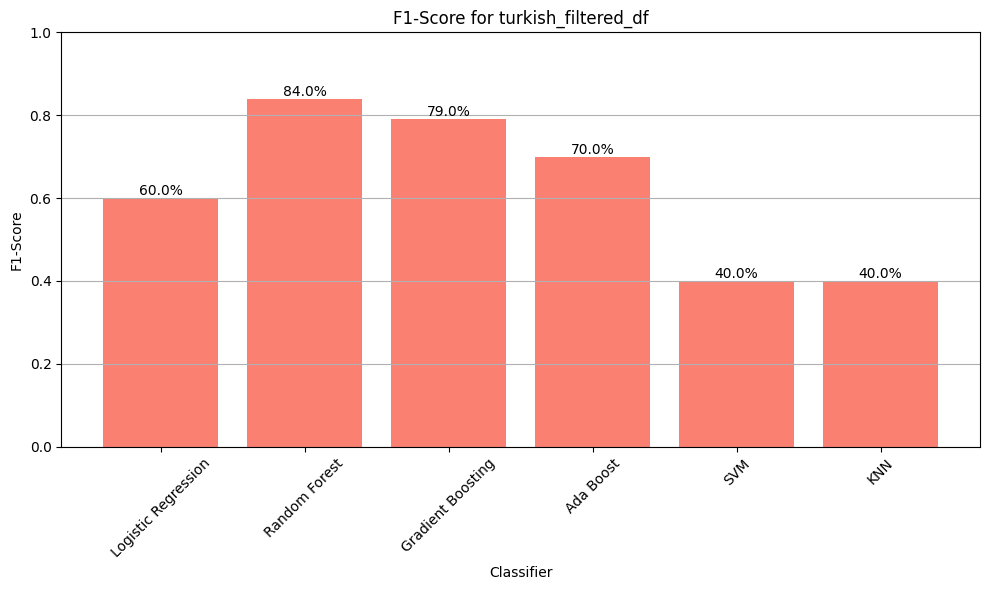

Dataset           Classifier  Precision  Recall  \
0   turkish_top_20_features_dataset  Logistic Regression       0.62    0.61   
1   turkish_top_20_features_dataset        Random Forest       0.83    0.82   
2   turkish_top_20_features_dataset    Gradient Boosting       0.76    0.76   
3   turkish_top_20_features_dataset            Ada Boost       0.69    0.65   
4   turkish_top_20_features_dataset                  SVM       0.45    0.41   
5   turkish_top_20_features_dataset                  KNN       0.40    0.40   
6                        turkish_df  Logistic Regression       0.62    0.61   
7                        turkish_df        Random Forest       0.83    0.82   
8                        turkish_df    Gradient Boosting       0.76    0.76   
9                        turkish_df            Ada Boost       0.69    0.65   
10                       turkish_df                  SVM       0.45    0.41   
11                       turkish_df                  KNN       0.40    0.40   
12                  turkish_mfcc_df  Logistic Regression       0.51    0.50   
13                  turkish_mfcc_df        Random Forest       0.62    0.59   
14                  turkish_mfcc_df    Gradient Boosting       0.61    0.57   
15                  turkish_mfcc_df            Ada Boost       0.49    0.46   
16                  turkish_mfcc_df                  SVM       0.59    0.57   
17                  turkish_mfcc_df                  KNN       0.50    0.49   
18            turkish_Chromagram_df  Logistic Regression       0.41    0.35   
19            turkish_Chromagram_df        Random Forest       0.52    0.51   
20            turkish_Chromagram_df    Gradient Boosting       0.48    0.49   
21            turkish_Chromagram_df            Ada Boost       0.44    0.42   
22            turkish_Chromagram_df                  SVM       0.44    0.42   
23            turkish_Chromagram_df                  KNN       0.42    0.40   
24              turkish_filtered_df  Logistic Regression       0.60    0.60   
25              turkish_filtered_df        Random Forest       0.84    0.84   
26              turkish_filtered_df    Gradient Boosting       0.79    0.79   
27              turkish_filtered_df            Ada Boost       0.74    0.70   
28              turkish_filtered_df                  SVM       0.46    0.44   
29              turkish_filtered_df                  KNN       0.40    0.40   

    F1-Score  Support  
0       0.61       80  
1       0.83       80  
2       0.76       80  
3       0.66       80  
4       0.37       80  
5       0.40       80  
6       0.61       80  
7       0.83       80  
8       0.76       80  
9       0.66       80  
10      0.37       80  
11      0.40       80  
12      0.50       80  
13      0.59       80  
14      0.58       80  
15      0.46       80  
16      0.57       80  
17      0.47       80  
18      0.35       80  
19      0.51       80  
20      0.48       80  
21      0.43       80  
22      0.41       80  
23      0.38       80  
24      0.60       80  
25      0.84       80  
26      0.79       80  
27      0.70       80  
28      0.40       80  
29      0.40       80

In [101]:
# Prepare data for the table
table_data = []
for dataset_name, classifiers_reports in reports.items():
    for clf_name, report in classifiers_reports.items():
        lines = report.split("\n")
        weighted_avg_line = [line for line in lines if "weighted avg" in line]
        if weighted_avg_line:
            metrics = weighted_avg_line[0].split()  # Extract weighted avg metrics
            table_data.append({
                "Dataset": dataset_name,
                "Classifier": clf_name,
                "Precision": float(metrics[2]),
                "Recall": float(metrics[3]),
                "F1-Score": float(metrics[4]),
                "Support": int(metrics[5])
            })

# Create a DataFrame
report_table = pd.DataFrame(table_data)

# Display the table
print(report_table)

# Optionally, save the table to a CSV file
report_table.to_csv("classification_reports_table.csv", index=False)

# Plot separated bar plots for each dataset with percentages on the bars
for dataset_name in report_table["Dataset"].unique():
    dataset_table = report_table[report_table["Dataset"] == dataset_name]

    # Plot Precision
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dataset_table["Classifier"], dataset_table["Precision"], color='skyblue')
    plt.title(f"Precision for {dataset_name}")
    plt.xlabel("Classifier")
    plt.ylabel("Precision")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height() * 100:.1f}%",
                 ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Plot Recall
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dataset_table["Classifier"], dataset_table["Recall"], color='lightgreen')
    plt.title(f"Recall for {dataset_name}")
    plt.xlabel("Classifier")
    plt.ylabel("Recall")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height() * 100:.1f}%",
                 ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    # Plot F1-Score
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dataset_table["Classifier"], dataset_table["F1-Score"], color='salmon')
    plt.title(f"F1-Score for {dataset_name}")
    plt.xlabel("Classifier")
    plt.ylabel("F1-Score")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height() * 100:.1f}%",
                 ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

classification_reports_table_df = pd.read_csv("classification_reports_table.csv")
classification_reports_table_df

# Multi-Lable Dataset

In [102]:
multi_lable_df = pd.read_csv('emotions.csv')

In [103]:
multi_lable_df.shape

(593, 78)

In [104]:
multi_lable_df.head()

Mean_Acc1298_Mean_Mem40_Centroid  Mean_Acc1298_Mean_Mem40_Rolloff  \
0                          0.034741                         0.089665   
1                          0.081374                         0.272747   
2                          0.110545                         0.273567   
3                          0.042481                         0.199281   
4                          0.074550                         0.140880   

   Mean_Acc1298_Mean_Mem40_Flux  Mean_Acc1298_Mean_Mem40_MFCC_0  \
0                      0.091225                      -73.302422   
1                      0.085733                      -62.584437   
2                      0.084410                      -65.235325   
3                      0.093447                      -80.305152   
4                      0.079789                      -93.697749   

   Mean_Acc1298_Mean_Mem40_MFCC_1  Mean_Acc1298_Mean_Mem40_MFCC_2  \
0                        6.215179                        0.615074   
1                        3.183163                       -0.218145   
2                        2.794964                        0.639047   
3                        5.824409                        0.648848   
4                        5.543229                        1.064262   

   Mean_Acc1298_Mean_Mem40_MFCC_3  Mean_Acc1298_Mean_Mem40_MFCC_4  \
0                        2.037160                        0.804065   
1                        0.163038                        0.620251   
2                        1.281297                        0.757896   
3                        1.754870                        1.495532   
4                        0.899152                        0.890336   

   Mean_Acc1298_Mean_Mem40_MFCC_5  Mean_Acc1298_Mean_Mem40_MFCC_6  ...  \
0                        1.301409                        0.558576  ...   
1                        0.458514                        0.041426  ...   
2                        0.489412                        0.627636  ...   
3                        0.739909                        0.809644  ...   
4                        0.702328                        0.490685  ...   

   BH_HighLowRatio    BHSUM1    BHSUM2    BHSUM3  amazed-suprised  \
0              2.0  0.245457  0.105065  0.405399                0   
1              2.0  0.343547  0.276366  0.710924                1   
2              3.0  0.188693  0.045941  0.457372                0   
3              2.0  0.102839  0.241934  0.351009                0   
4              2.0  0.195196  0.310801  0.683817                0   

   happy-pleased  relaxing-calm  quiet-still  sad-lonely  angry-aggresive  
0              1              1            0           0                0  
1              0              0            0           0                1  
2              1              0            0           0                1  
3              0              1            0           0                0  
4              0              0            1           0                0  

[5 rows x 78 columns]

In [105]:
multi_lable_df.isnull().sum()

Mean_Acc1298_Mean_Mem40_Centroid    0
Mean_Acc1298_Mean_Mem40_Rolloff     0
Mean_Acc1298_Mean_Mem40_Flux        0
Mean_Acc1298_Mean_Mem40_MFCC_0      0
Mean_Acc1298_Mean_Mem40_MFCC_1      0
                                   ..
happy-pleased                       0
relaxing-calm                       0
quiet-still                         0
sad-lonely                          0
angry-aggresive                     0
Length: 78, dtype: int64

In [106]:
multi_lable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mean_Acc1298_Mean_Mem40_Centroid  593 non-null    float64
 1   Mean_Acc1298_Mean_Mem40_Rolloff   593 non-null    float64
 2   Mean_Acc1298_Mean_Mem40_Flux      593 non-null    float64
 3   Mean_Acc1298_Mean_Mem40_MFCC_0    593 non-null    float64
 4   Mean_Acc1298_Mean_Mem40_MFCC_1    593 non-null    float64
 5   Mean_Acc1298_Mean_Mem40_MFCC_2    593 non-null    float64
 6   Mean_Acc1298_Mean_Mem40_MFCC_3    593 non-null    float64
 7   Mean_Acc1298_Mean_Mem40_MFCC_4    593 non-null    float64
 8   Mean_Acc1298_Mean_Mem40_MFCC_5    593 non-null    float64
 9   Mean_Acc1298_Mean_Mem40_MFCC_6    593 non-null    float64
 10  Mean_Acc1298_Mean_Mem40_MFCC_7    593 non-null    float64
 11  Mean_Acc1298_Mean_Mem40_MFCC_8    593 non-null    float64
 12  Mean_Acc

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\3868881032.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


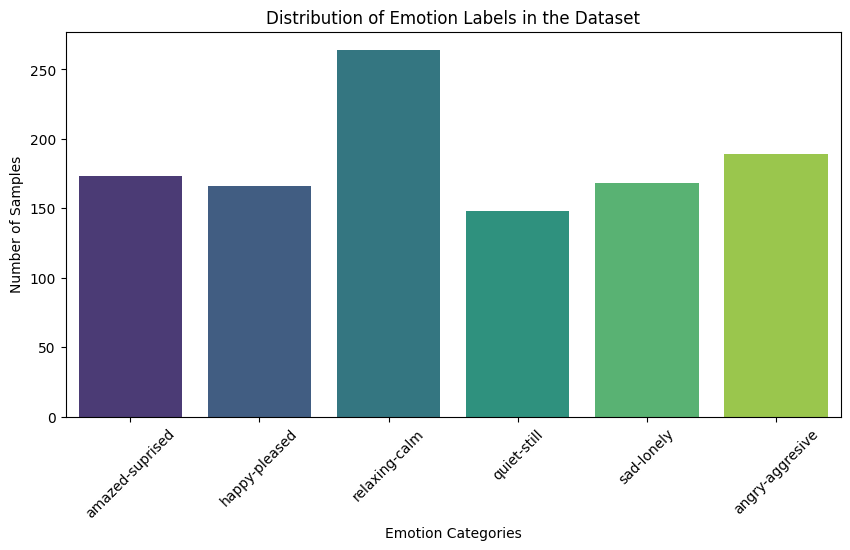

In [107]:
# Count occurrences of each emotion label
emotion_counts = multi_lable_df.iloc[:, -6:].sum()

# Plot the distribution of emotion labels
plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotion Categories")
plt.ylabel("Number of Samples")
plt.title("Distribution of Emotion Labels in the Dataset")
plt.xticks(rotation=45)
plt.show()


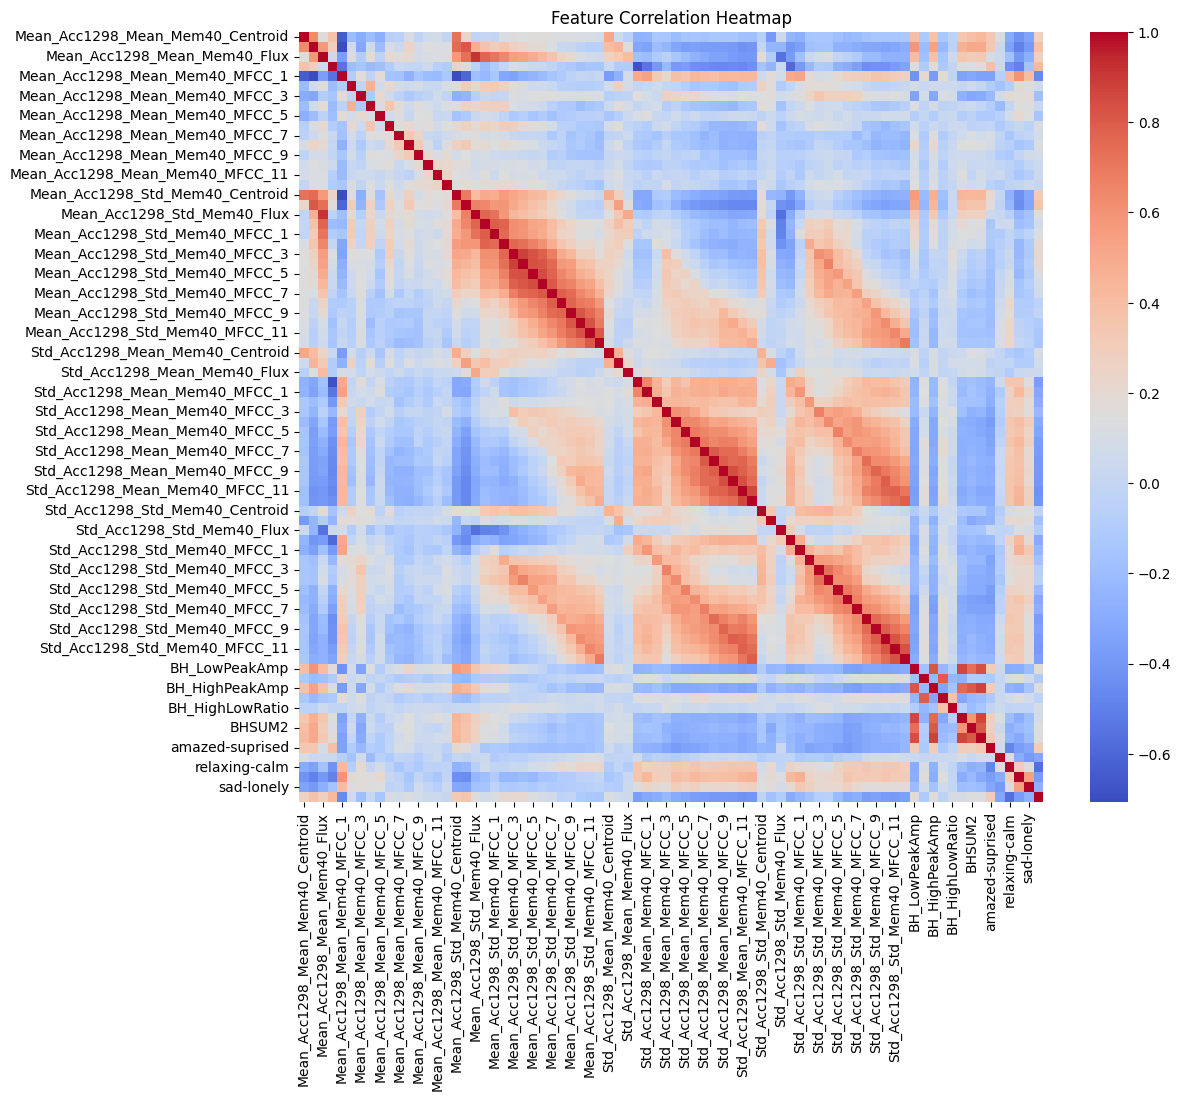

In [108]:
# Compute the correlation matrix
correlation_matrix = multi_lable_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## MFCC data frame

In [109]:
# Filter columns containing 'MFCC' in their names
mfcc_multi_label_df = multi_lable_df.filter(like='MFCC')

# Include the emotion labels
emotion_labels = ['amazed-suprised', 'happy-pleased', 'relaxing-calm', 'quiet-still', 'sad-lonely', 'angry-aggresive']
mfcc_multi_label_df[emotion_labels] = multi_lable_df[emotion_labels]

# Display the resulting DataFrame
mfcc_multi_label_df.head()

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\2722241586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfcc_multi_label_df[emotion_labels] = multi_lable_df[emotion_labels]
C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\2722241586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfcc_multi_label_df[emotion_labels] = multi_lable_df[emotion_labels]
C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\2722241586.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Mean_Acc1298_Mean_Mem40_MFCC_0  Mean_Acc1298_Mean_Mem40_MFCC_1  \
0                      -73.302422                        6.215179   
1                      -62.584437                        3.183163   
2                      -65.235325                        2.794964   
3                      -80.305152                        5.824409   
4                      -93.697749                        5.543229   

   Mean_Acc1298_Mean_Mem40_MFCC_2  Mean_Acc1298_Mean_Mem40_MFCC_3  \
0                        0.615074                        2.037160   
1                       -0.218145                        0.163038   
2                        0.639047                        1.281297   
3                        0.648848                        1.754870   
4                        1.064262                        0.899152   

   Mean_Acc1298_Mean_Mem40_MFCC_4  Mean_Acc1298_Mean_Mem40_MFCC_5  \
0                        0.804065                        1.301409   
1                        0.620251                        0.458514   
2                        0.757896                        0.489412   
3                        1.495532                        0.739909   
4                        0.890336                        0.702328   

   Mean_Acc1298_Mean_Mem40_MFCC_6  Mean_Acc1298_Mean_Mem40_MFCC_7  \
0                        0.558576                        0.672063   
1                        0.041426                        0.308287   
2                        0.627636                        0.469322   
3                        0.809644                        0.460945   
4                        0.490685                        0.796904   

   Mean_Acc1298_Mean_Mem40_MFCC_8  Mean_Acc1298_Mean_Mem40_MFCC_9  ...  \
0                        0.783788                        0.766640  ...   
1                        0.538152                        0.594871  ...   
2                        0.644336                        0.441556  ...   
3                        0.409566                        0.680122  ...   
4                        0.745373                        0.911234  ...   

   Std_Acc1298_Std_Mem40_MFCC_9  Std_Acc1298_Std_Mem40_MFCC_10  \
0                      0.110514                       0.100517   
1                      0.053439                       0.067684   
2                      0.117886                       0.100852   
3                      0.113774                       0.112815   
4                      0.251668                       0.265049   

   Std_Acc1298_Std_Mem40_MFCC_11  Std_Acc1298_Std_Mem40_MFCC_12  \
0                       0.118630                       0.094923   
1                       0.070075                       0.041565   
2                       0.079917                       0.085821   
3                       0.129145                       0.122330   
4                       0.284196                       0.189988   

   amazed-suprised  happy-pleased  relaxing-calm  quiet-still  sad-lonely  \
0                0              1              1            0           0   
1                1              0              0            0           0   
2                0              1              0            0           0   
3                0              0              1            0           0   
4                0              0              0            1           0   

   angry-aggresive  
0                0  
1                1  
2                1  
3                0  
4                0  

[5 rows x 58 columns]

In [110]:
mfcc_multi_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Mean_Acc1298_Mean_Mem40_MFCC_0   593 non-null    float64
 1   Mean_Acc1298_Mean_Mem40_MFCC_1   593 non-null    float64
 2   Mean_Acc1298_Mean_Mem40_MFCC_2   593 non-null    float64
 3   Mean_Acc1298_Mean_Mem40_MFCC_3   593 non-null    float64
 4   Mean_Acc1298_Mean_Mem40_MFCC_4   593 non-null    float64
 5   Mean_Acc1298_Mean_Mem40_MFCC_5   593 non-null    float64
 6   Mean_Acc1298_Mean_Mem40_MFCC_6   593 non-null    float64
 7   Mean_Acc1298_Mean_Mem40_MFCC_7   593 non-null    float64
 8   Mean_Acc1298_Mean_Mem40_MFCC_8   593 non-null    float64
 9   Mean_Acc1298_Mean_Mem40_MFCC_9   593 non-null    float64
 10  Mean_Acc1298_Mean_Mem40_MFCC_10  593 non-null    float64
 11  Mean_Acc1298_Mean_Mem40_MFCC_11  593 non-null    float64
 12  Mean_Acc1298_Mean_Mem4

## non-MFCC data frame

In [111]:
# Filter out columns containing 'MFCC' in their names
non_mfcc_multi_label_df = multi_lable_df.loc[:, ~multi_lable_df.columns.str.contains('MFCC')]

# Display the resulting DataFrame
non_mfcc_multi_label_df.head()

Mean_Acc1298_Mean_Mem40_Centroid  Mean_Acc1298_Mean_Mem40_Rolloff  \
0                          0.034741                         0.089665   
1                          0.081374                         0.272747   
2                          0.110545                         0.273567   
3                          0.042481                         0.199281   
4                          0.074550                         0.140880   

   Mean_Acc1298_Mean_Mem40_Flux  Mean_Acc1298_Std_Mem40_Centroid  \
0                      0.091225                         0.028851   
1                      0.085733                         0.066288   
2                      0.084410                         0.082743   
3                      0.093447                         0.049939   
4                      0.079789                         0.035751   

   Mean_Acc1298_Std_Mem40_Rolloff  Mean_Acc1298_Std_Mem40_Flux  \
0                        0.129039                     0.039614   
1                        0.262370                     0.034438   
2                        0.215373                     0.035970   
3                        0.281616                     0.044727   
4                        0.085592                     0.029413   

   Std_Acc1298_Mean_Mem40_Centroid  Std_Acc1298_Mean_Mem40_Rolloff  \
0                         0.013519                        0.050591   
1                         0.013621                        0.073041   
2                         0.029112                        0.070433   
3                         0.020749                        0.106318   
4                         0.047014                        0.136984   

   Std_Acc1298_Mean_Mem40_Flux  Std_Acc1298_Std_Mem40_Centroid  ...  \
0                     0.009025                        0.022774  ...   
1                     0.010094                        0.020028  ...   
2                     0.008525                        0.038119  ...   
3                     0.009108                        0.032678  ...   
4                     0.010356                        0.036151  ...   

   BH_HighLowRatio    BHSUM1    BHSUM2    BHSUM3  amazed-suprised  \
0              2.0  0.245457  0.105065  0.405399                0   
1              2.0  0.343547  0.276366  0.710924                1   
2              3.0  0.188693  0.045941  0.457372                0   
3              2.0  0.102839  0.241934  0.351009                0   
4              2.0  0.195196  0.310801  0.683817                0   

   happy-pleased  relaxing-calm  quiet-still  sad-lonely  angry-aggresive  
0              1              1            0           0                0  
1              0              0            0           0                1  
2              1              0            0           0                1  
3              0              1            0           0                0  
4              0              0            1           0                0  

[5 rows x 26 columns]

In [112]:
non_mfcc_multi_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mean_Acc1298_Mean_Mem40_Centroid  593 non-null    float64
 1   Mean_Acc1298_Mean_Mem40_Rolloff   593 non-null    float64
 2   Mean_Acc1298_Mean_Mem40_Flux      593 non-null    float64
 3   Mean_Acc1298_Std_Mem40_Centroid   593 non-null    float64
 4   Mean_Acc1298_Std_Mem40_Rolloff    593 non-null    float64
 5   Mean_Acc1298_Std_Mem40_Flux       593 non-null    float64
 6   Std_Acc1298_Mean_Mem40_Centroid   593 non-null    float64
 7   Std_Acc1298_Mean_Mem40_Rolloff    593 non-null    float64
 8   Std_Acc1298_Mean_Mem40_Flux       593 non-null    float64
 9   Std_Acc1298_Std_Mem40_Centroid    593 non-null    float64
 10  Std_Acc1298_Std_Mem40_Rolloff     593 non-null    float64
 11  Std_Acc1298_Std_Mem40_Flux        593 non-null    float64
 12  BH_LowPe

## Top 20 important features

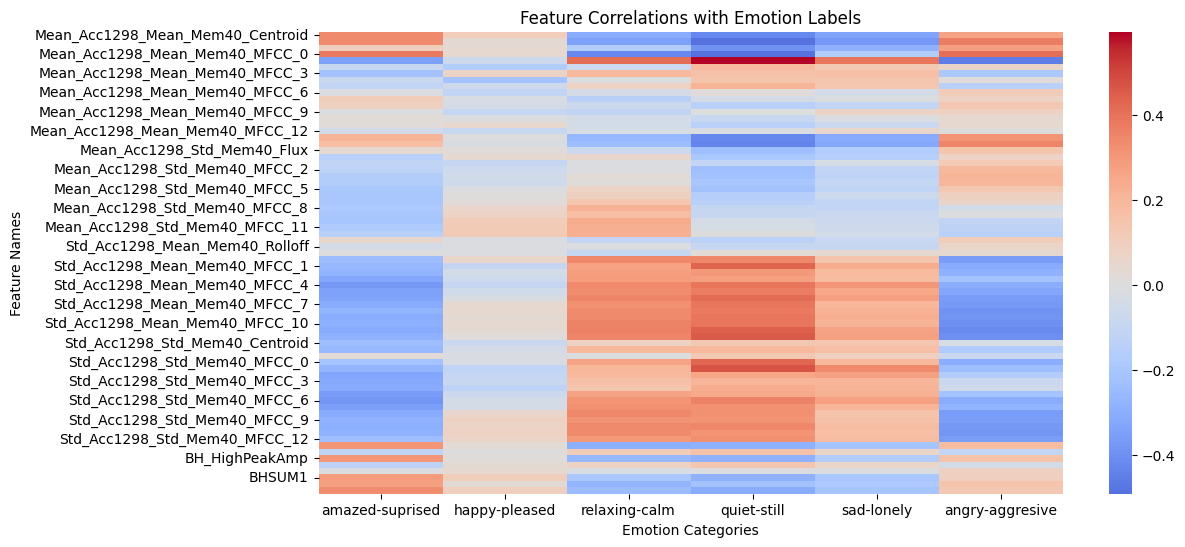

In [113]:
# Compute correlation matrix for features and emotions
correlation_matrix = multi_lable_df.corr()

# Extract correlations of features with emotion labels
emotion_correlations = correlation_matrix.iloc[:-6, -6:]

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(emotion_correlations, cmap="coolwarm", center=0)
plt.title("Feature Correlations with Emotion Labels")
plt.xlabel("Emotion Categories")
plt.ylabel("Feature Names")
plt.show()

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\3796727303.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:20],


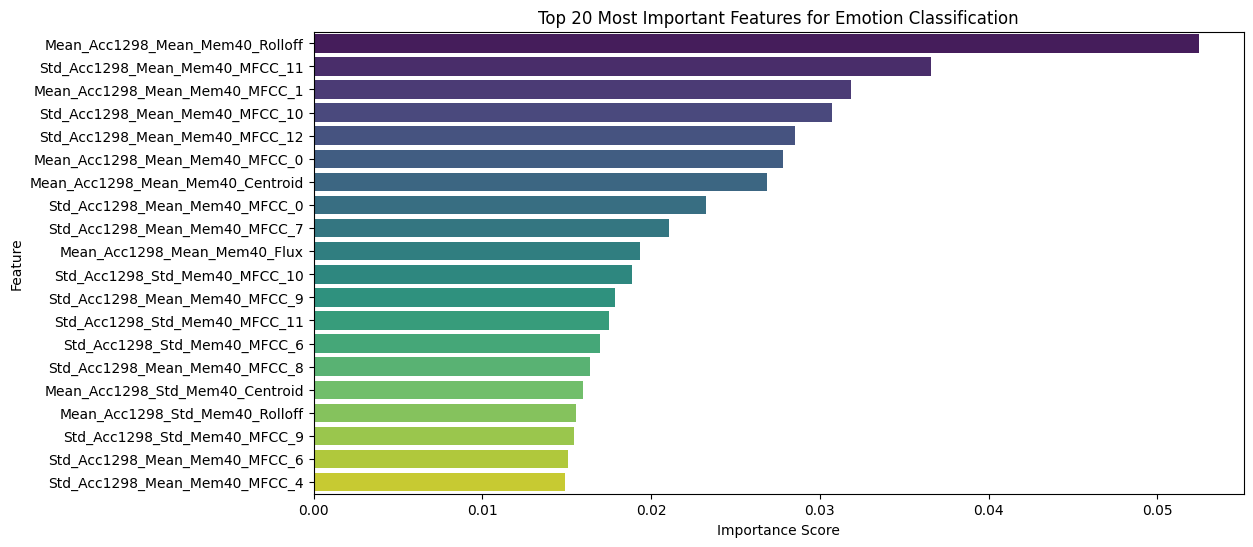

In [114]:
# Separate features and emotion labels
X = multi_lable_df.iloc[:, :-6]  # All features
y = multi_lable_df.iloc[:, -6:]  # Emotion labels

# Combine features (X) and target variable (y) into a single DataFrame
multi_label_top_20_features_dataset = pd.concat([X, y], axis=1)

# Train a Random Forest model for feature importance analysis
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances[:20],
            y=sorted_features[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features for Emotion Classification")
plt.show()

In [115]:
multi_label_top_20_features_dataset.head()

Mean_Acc1298_Mean_Mem40_Centroid  Mean_Acc1298_Mean_Mem40_Rolloff  \
0                          0.034741                         0.089665   
1                          0.081374                         0.272747   
2                          0.110545                         0.273567   
3                          0.042481                         0.199281   
4                          0.074550                         0.140880   

   Mean_Acc1298_Mean_Mem40_Flux  Mean_Acc1298_Mean_Mem40_MFCC_0  \
0                      0.091225                      -73.302422   
1                      0.085733                      -62.584437   
2                      0.084410                      -65.235325   
3                      0.093447                      -80.305152   
4                      0.079789                      -93.697749   

   Mean_Acc1298_Mean_Mem40_MFCC_1  Mean_Acc1298_Mean_Mem40_MFCC_2  \
0                        6.215179                        0.615074   
1                        3.183163                       -0.218145   
2                        2.794964                        0.639047   
3                        5.824409                        0.648848   
4                        5.543229                        1.064262   

   Mean_Acc1298_Mean_Mem40_MFCC_3  Mean_Acc1298_Mean_Mem40_MFCC_4  \
0                        2.037160                        0.804065   
1                        0.163038                        0.620251   
2                        1.281297                        0.757896   
3                        1.754870                        1.495532   
4                        0.899152                        0.890336   

   Mean_Acc1298_Mean_Mem40_MFCC_5  Mean_Acc1298_Mean_Mem40_MFCC_6  ...  \
0                        1.301409                        0.558576  ...   
1                        0.458514                        0.041426  ...   
2                        0.489412                        0.627636  ...   
3                        0.739909                        0.809644  ...   
4                        0.702328                        0.490685  ...   

   BH_HighLowRatio    BHSUM1    BHSUM2    BHSUM3  amazed-suprised  \
0              2.0  0.245457  0.105065  0.405399                0   
1              2.0  0.343547  0.276366  0.710924                1   
2              3.0  0.188693  0.045941  0.457372                0   
3              2.0  0.102839  0.241934  0.351009                0   
4              2.0  0.195196  0.310801  0.683817                0   

   happy-pleased  relaxing-calm  quiet-still  sad-lonely  angry-aggresive  
0              1              1            0           0                0  
1              0              0            0           0                1  
2              1              0            0           0                1  
3              0              1            0           0                0  
4              0              0            1           0                0  

[5 rows x 78 columns]

In [118]:
classifiers = {
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    "Gradient Boosting": MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42)),
    "AdaBoost": MultiOutputClassifier(AdaBoostClassifier(n_estimators=100, random_state=42)),
    "SVM": MultiOutputClassifier(SVC(probability=True, kernel='rbf', random_state=42)),
    "KNN": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5))
}


Training classifiers on Multi-label Full Dataset...
Training Random Forest on Multi-label Full Dataset...
Random Forest Accuracy on Multi-label Full Dataset: 0.3277
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.67      0.24      0.36        33
           2       0.72      0.91      0.80        53
           3       0.78      0.91      0.84        23
           4       0.77      0.55      0.64        31
           5       0.82      0.66      0.73        41

   micro avg       0.74      0.64      0.69       217
   macro avg       0.74      0.63      0.66       217
weighted avg       0.74      0.64      0.66       217
 samples avg       0.68      0.65      0.63       217

Training Gradient Boosting on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on Multi-label Full Dataset: 0.3277
              precision    recall  f1-score   support

           0       0.61      0.47      0.53        36
           1       0.61      0.33      0.43        33
           2       0.69      0.85      0.76        53
           3       0.74      0.87      0.80        23
           4       0.84      0.52      0.64        31
           5       0.82      0.56      0.67        41

   micro avg       0.71      0.61      0.66       217
   macro avg       0.72      0.60      0.64       217
weighted avg       0.72      0.61      0.64       217
 samples avg       0.64      0.60      0.60       217

Training AdaBoost on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on Multi-label Full Dataset: 0.2353
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.56      0.45      0.50        33
           2       0.68      0.77      0.73        53
           3       0.76      0.83      0.79        23
           4       0.69      0.58      0.63        31
           5       0.70      0.56      0.62        41

   micro avg       0.67      0.62      0.64       217
   macro avg       0.67      0.62      0.64       217
weighted avg       0.66      0.62      0.64       217
 samples avg       0.63      0.60      0.59       217

Training SVM on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on Multi-label Full Dataset: 0.0252
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        33
           2       0.74      0.26      0.39        53
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        41

   micro avg       0.74      0.06      0.12       217
   macro avg       0.12      0.04      0.06       217
weighted avg       0.18      0.06      0.09       217
 samples avg       0.12      0.06      0.08       217

Training KNN on Multi-label Full Dataset...
KNN Accuracy on Multi-label Full Dataset: 0.1765
              precision    recall  f1-score   support

           0       0.60      0.33      0.43        36
           1       0.47      0.27      0.35        33
           2       0.66      0.77      0.71        53
           3       0.56      0.43      0.49 

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Random Forest Accuracy on MFCC Dataset: 0.2605
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        36
           1       0.57      0.12      0.20        33
           2       0.70      0.85      0.77        53
           3       0.83      0.83      0.83        23
           4       0.94      0.48      0.64        31
           5       0.82      0.56      0.67        41

   micro avg       0.76      0.56      0.65       217
   macro avg       0.76      0.55      0.61       217
weighted avg       0.76      0.56      0.61       217
 samples avg       0.66      0.57      0.58       217

Training Gradient Boosting on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on MFCC Dataset: 0.2269
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        36
           1       0.48      0.30      0.37        33
           2       0.71      0.89      0.79        53
           3       0.67      0.70      0.68        23
           4       0.70      0.52      0.59        31
           5       0.80      0.59      0.68        41

   micro avg       0.68      0.59      0.64       217
   macro avg       0.67      0.57      0.61       217
weighted avg       0.67      0.59      0.62       217
 samples avg       0.63      0.61      0.58       217

Training AdaBoost on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on MFCC Dataset: 0.2437
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        36
           1       0.56      0.30      0.39        33
           2       0.71      0.85      0.78        53
           3       0.65      0.74      0.69        23
           4       0.68      0.55      0.61        31
           5       0.69      0.61      0.65        41

   micro avg       0.68      0.62      0.65       217
   macro avg       0.67      0.60      0.62       217
weighted avg       0.68      0.62      0.64       217
 samples avg       0.64      0.62      0.60       217

Training SVM on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on MFCC Dataset: 0.0588
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        33
           2       0.71      0.51      0.59        53
           3       0.70      0.30      0.42        23
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        41

   micro avg       0.71      0.16      0.26       217
   macro avg       0.24      0.14      0.17       217
weighted avg       0.25      0.16      0.19       217
 samples avg       0.22      0.15      0.17       217

Training KNN on MFCC Dataset...
KNN Accuracy on MFCC Dataset: 0.1765
              precision    recall  f1-score   support

           0       0.53      0.28      0.36        36
           1       0.41      0.21      0.28        33
           2       0.65      0.79      0.71        53
           3       0.59      0.74      0.65        23
           4       0.55   

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

Random Forest Accuracy on Non-MFCC Dataset: 0.2605
              precision    recall  f1-score   support

           0       0.71      0.28      0.40        36
           1       0.58      0.21      0.31        33
           2       0.65      0.64      0.65        53
           3       0.73      0.83      0.78        23
           4       0.70      0.52      0.59        31
           5       0.64      0.44      0.52        41

   micro avg       0.67      0.48      0.56       217
   macro avg       0.67      0.49      0.54       217
weighted avg       0.67      0.48      0.54       217
 samples avg       0.51      0.48      0.48       217

Training Gradient Boosting on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on Non-MFCC Dataset: 0.2857
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        36
           1       0.55      0.33      0.42        33
           2       0.67      0.74      0.70        53
           3       0.69      0.78      0.73        23
           4       0.70      0.61      0.66        31
           5       0.70      0.46      0.56        41

   micro avg       0.66      0.55      0.60       217
   macro avg       0.65      0.55      0.58       217
weighted avg       0.65      0.55      0.58       217
 samples avg       0.58      0.55      0.54       217

Training AdaBoost on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on Non-MFCC Dataset: 0.2521
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        36
           1       0.41      0.21      0.28        33
           2       0.65      0.62      0.63        53
           3       0.68      0.74      0.71        23
           4       0.72      0.58      0.64        31
           5       0.64      0.51      0.57        41

   micro avg       0.64      0.52      0.58       217
   macro avg       0.63      0.52      0.57       217
weighted avg       0.63      0.52      0.56       217
 samples avg       0.58      0.53      0.52       217

Training SVM on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on Non-MFCC Dataset: 0.0000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        41

   micro avg       0.00      0.00      0.00       217
   macro avg       0.00      0.00      0.00       217
weighted avg       0.00      0.00      0.00       217
 samples avg       0.00      0.00      0.00       217

Training KNN on Non-MFCC Dataset...
KNN Accuracy on Non-MFCC Dataset: 0.1008
              precision    recall  f1-score   support

           0       0.32      0.17      0.22        36
           1       0.40      0.30      0.34        33
           2       0.56      0.62      0.59        53
           3       0.36      0.17      0.24        23
           4  

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

Random Forest Accuracy on Top 20 Features Dataset: 0.3277
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        36
           1       0.67      0.24      0.36        33
           2       0.72      0.91      0.80        53
           3       0.78      0.91      0.84        23
           4       0.77      0.55      0.64        31
           5       0.82      0.66      0.73        41

   micro avg       0.74      0.64      0.69       217
   macro avg       0.74      0.63      0.66       217
weighted avg       0.74      0.64      0.66       217
 samples avg       0.68      0.65      0.63       217

Training Gradient Boosting on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on Top 20 Features Dataset: 0.3277
              precision    recall  f1-score   support

           0       0.61      0.47      0.53        36
           1       0.61      0.33      0.43        33
           2       0.69      0.85      0.76        53
           3       0.74      0.87      0.80        23
           4       0.84      0.52      0.64        31
           5       0.82      0.56      0.67        41

   micro avg       0.71      0.61      0.66       217
   macro avg       0.72      0.60      0.64       217
weighted avg       0.72      0.61      0.64       217
 samples avg       0.64      0.60      0.60       217

Training AdaBoost on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on Top 20 Features Dataset: 0.2353
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.56      0.45      0.50        33
           2       0.68      0.77      0.73        53
           3       0.76      0.83      0.79        23
           4       0.69      0.58      0.63        31
           5       0.70      0.56      0.62        41

   micro avg       0.67      0.62      0.64       217
   macro avg       0.67      0.62      0.64       217
weighted avg       0.66      0.62      0.64       217
 samples avg       0.63      0.60      0.59       217

Training SVM on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on Top 20 Features Dataset: 0.0252
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        33
           2       0.74      0.26      0.39        53
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00        41

   micro avg       0.74      0.06      0.12       217
   macro avg       0.12      0.04      0.06       217
weighted avg       0.18      0.06      0.09       217
 samples avg       0.12      0.06      0.08       217

Training KNN on Top 20 Features Dataset...
KNN Accuracy on Top 20 Features Dataset: 0.1765
              precision    recall  f1-score   support

           0       0.60      0.33      0.43        36
           1       0.47      0.27      0.35        33
           2       0.66      0.77      0.71        53
           3       0.56      0.43      0.49    

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

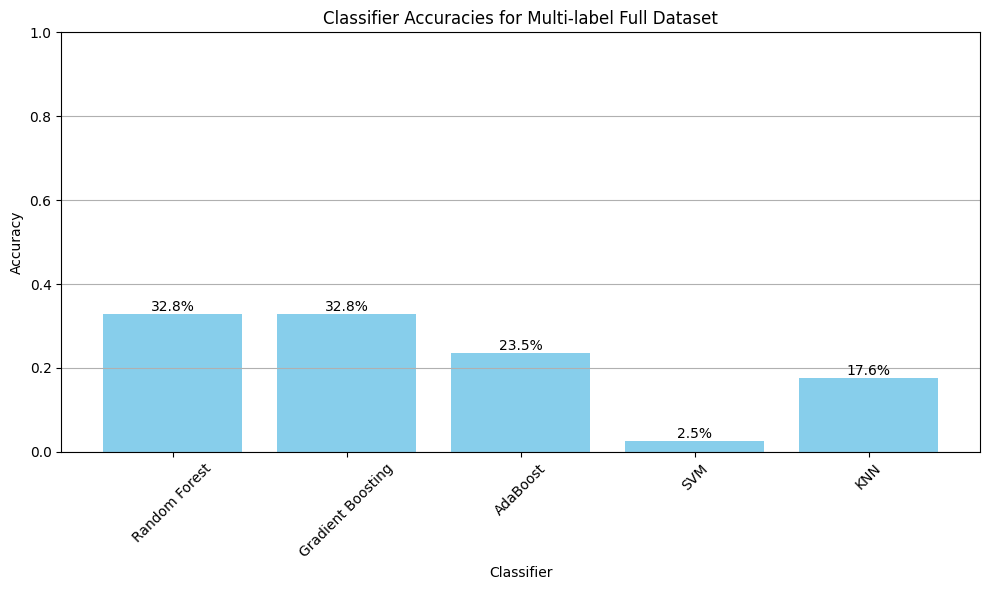

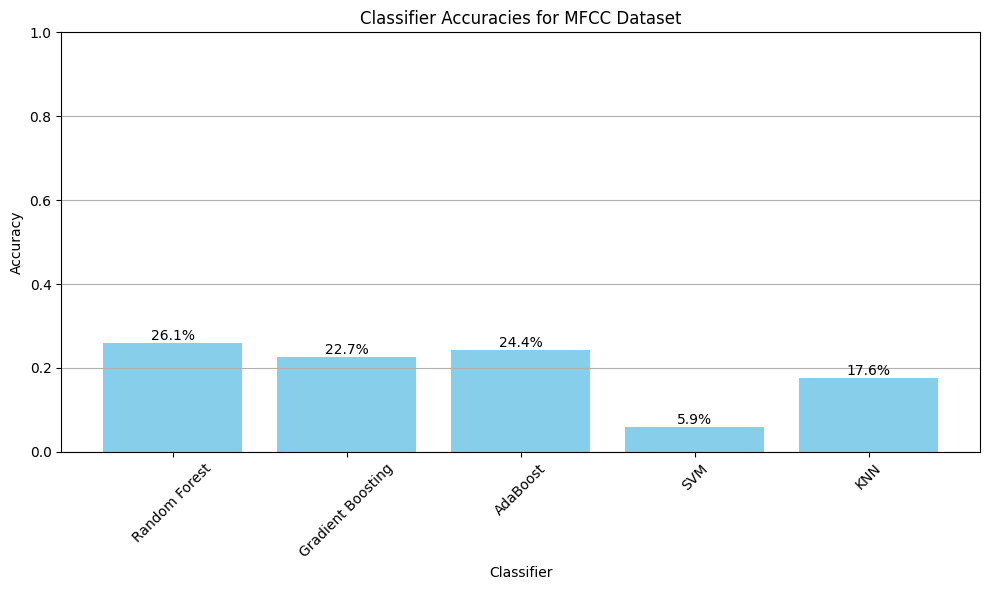

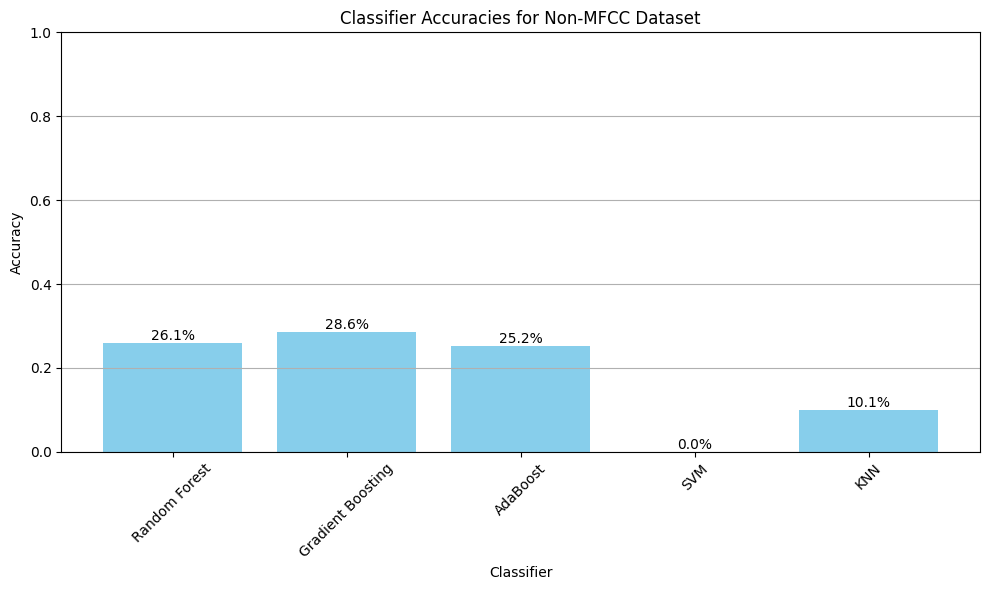

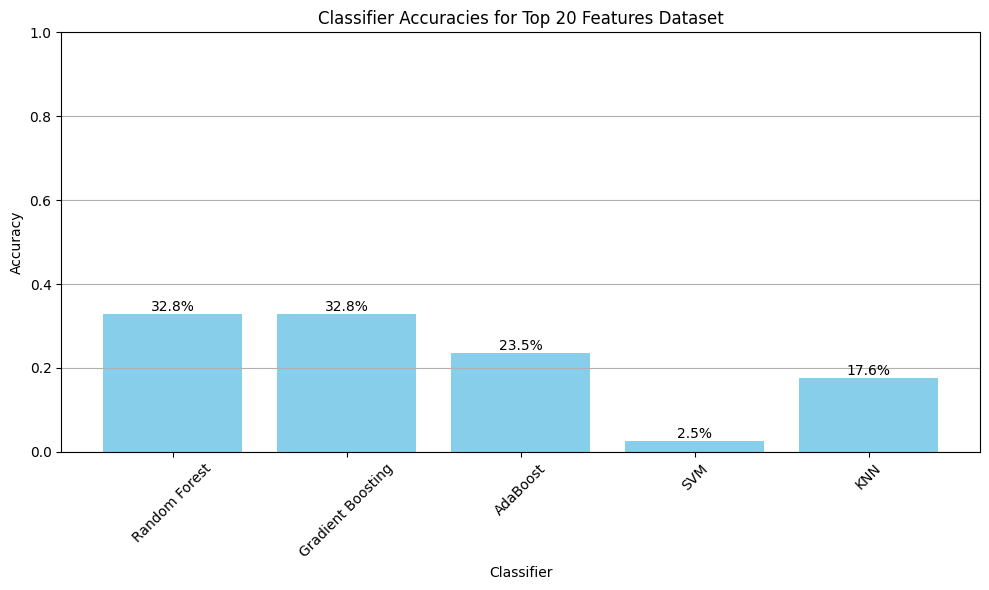

In [119]:
datasets = {
    "Multi-label Full Dataset": multi_lable_df,
    "MFCC Dataset": mfcc_multi_label_df,
    "Non-MFCC Dataset": non_mfcc_multi_label_df,
    "Top 20 Features Dataset": multi_label_top_20_features_dataset
}

results = {}
for dataset_name, dataset in datasets.items():
    print(f"Training classifiers on {dataset_name}...")

    X = dataset.iloc[:, :-6].values
    y = dataset.iloc[:, -6:].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    results[dataset_name] = {}

    for clf_name, clf in classifiers.items():
        print(f"Training {clf_name} on {dataset_name}...")

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[dataset_name][clf_name] = accuracy

        print(f"{clf_name} Accuracy on {dataset_name}: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))

# Plot the results
for dataset_name, accuracies in results.items():
    plt.figure(figsize=(10, 6))
    bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
    plt.title(f"Classifier Accuracies for {dataset_name}")
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add accuracy values on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f"{bar.get_height() * 100:.1f}%", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

## Improvement 1 on Multi-Label Dataset


Dataset: Multi-label Full Dataset

--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

Dataset: MFCC Dataset

--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

Dataset: Non-MFCC Dataset

--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---

Dataset: Top 20 Features Dataset

--- Fold 1 ---

--- Fold 2 ---

--- Fold 3 ---

--- Fold 4 ---

--- Fold 5 ---


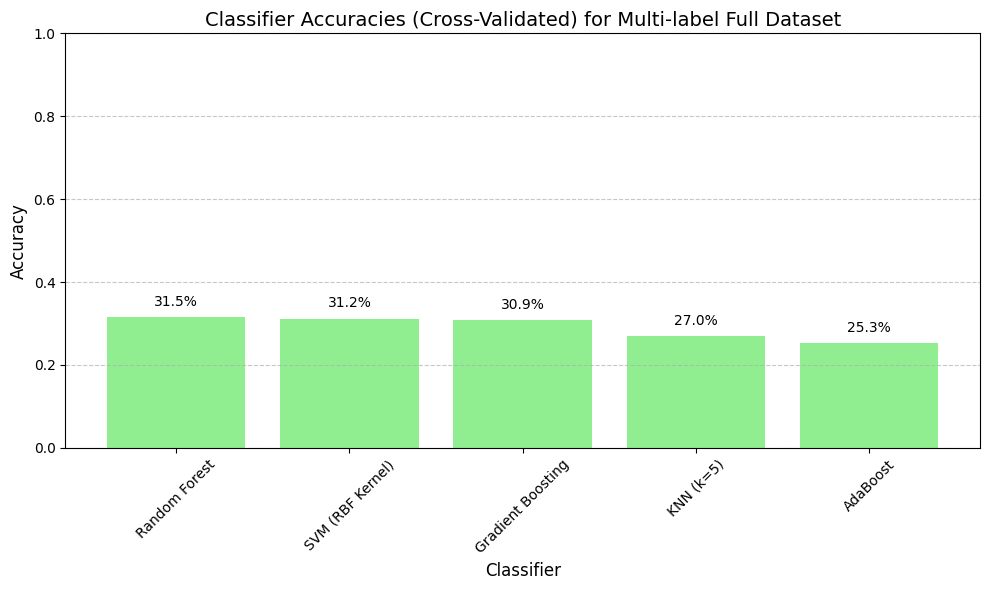

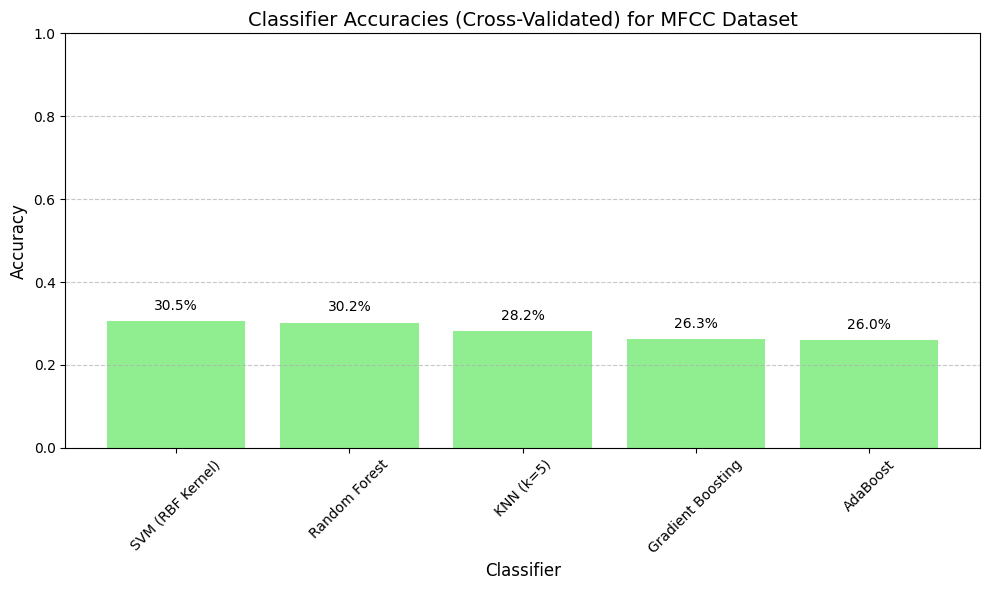

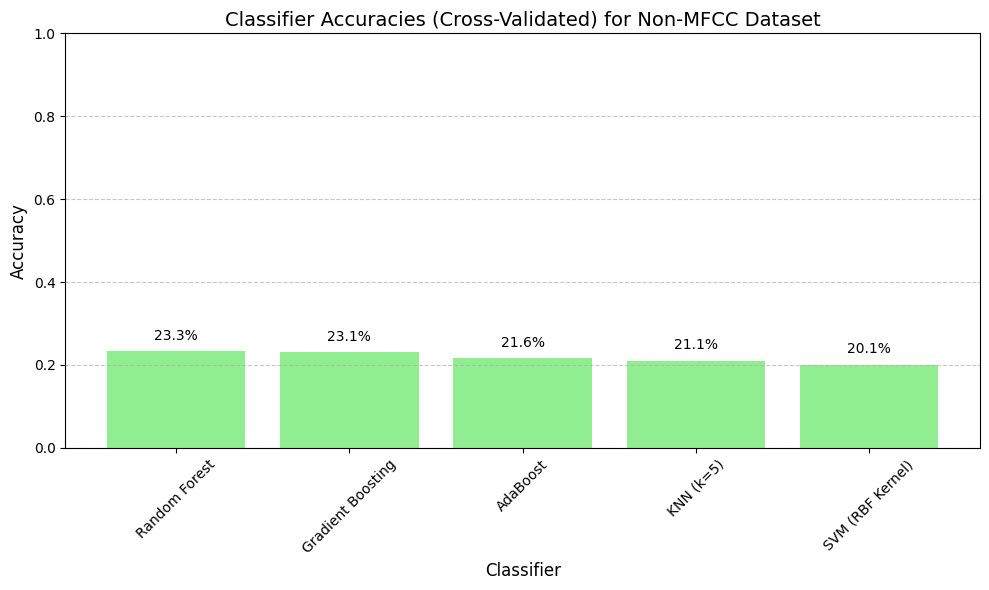

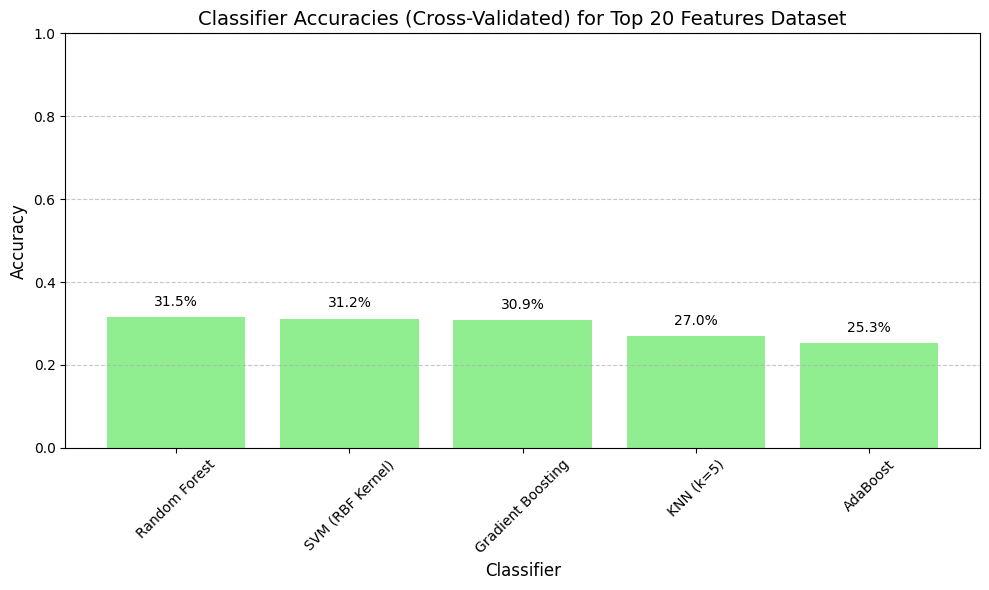

In [120]:
# datasets with OneVsRest
base_classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, kernel='rbf', random_state=42),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

classifiers = {name: OneVsRestClassifier(
    model) for name, model in base_classifiers.items()}


datasets = {
    "Multi-label Full Dataset": multi_lable_df,
    "MFCC Dataset": mfcc_multi_label_df,
    "Non-MFCC Dataset": non_mfcc_multi_label_df,
    "Top 20 Features Dataset": multi_label_top_20_features_dataset
}

results = {}

# train with cross validation

def cross_validate(X, y, classifiers, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    clf_results = {name: [] for name in classifiers.keys()}

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"\n--- Fold {fold + 1} ---")

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            clf_results[clf_name].append(acc)

    # Mean accuracy for each model
    avg_results = {name: np.mean(scores)
                   for name, scores in clf_results.items()}

    return avg_results



for dataset_name, dataset in datasets.items():
    print(f"\n{'='*50}\nDataset: {dataset_name}\n{'='*50}")

    X = dataset.iloc[:, :-6].values
    y = dataset.iloc[:, -6:].values

    results[dataset_name] = cross_validate(X, y, classifiers)


for dataset_name, accuracies in results.items():
    plt.figure(figsize=(10, 6))
    sorted_acc = dict(
        sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

    bars = plt.bar(sorted_acc.keys(), sorted_acc.values(), color='lightgreen')
    plt.title(
        f"Classifier Accuracies (Cross-Validated) for {dataset_name}", fontsize=14)
    plt.xlabel("Classifier", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                 f"{bar.get_height() * 100:.1f}%", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

## Improvement 2 on Multi-Label Dataset


Dataset: Multi-label Full Dataset

---------- Randomized Search for Random Forest ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 10, 'estimator__max_depth': 10}
Best CV Accuracy for Random Forest: 0.3170

---------- Randomized Search for Gradient Boosting ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Gradient Boosting: {'estimator__n_estimators': 200, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.2}
Best CV Accuracy for Gradient Boosting: 0.3035

---------- Randomized Search for AdaBoost ----------
Fitting 3 folds for each of 9 candidates, totalling 27 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for AdaBoost: {'estimator__n_estimators': 100, 'estimator__learning_rate': 1.0}
Best CV Accuracy for AdaBoost: 0.2715

---------- Randomized Search for SVM (RBF Kernel) ----------
Fitting 3 folds for each of 6 candidates, totalling 18 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for SVM (RBF Kernel): {'estimator__gamma': 'auto', 'estimator__C': 10}
Best CV Accuracy for SVM (RBF Kernel): 0.1872

---------- Randomized Search for KNN (k=5) ----------
Fitting 3 folds for each of 8 candidates, totalling 24 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for KNN (k=5): {'estimator__weights': 'distance', 'estimator__n_neighbors': 7}
Best CV Accuracy for KNN (k=5): 0.1787

Dataset: MFCC Dataset

---------- Randomized Search for Random Forest ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 5, 'estimator__max_depth': 10}
Best CV Accuracy for Random Forest: 0.3119

---------- Randomized Search for Gradient Boosting ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Gradient Boosting: {'estimator__n_estimators': 200, 'estimator__max_depth': 3, 'estimator__learning_rate': 0.2}
Best CV Accuracy for Gradient Boosting: 0.2866

---------- Randomized Search for AdaBoost ----------
Fitting 3 folds for each of 9 candidates, totalling 27 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for AdaBoost: {'estimator__n_estimators': 100, 'estimator__learning_rate': 1.0}
Best CV Accuracy for AdaBoost: 0.2664

---------- Randomized Search for SVM (RBF Kernel) ----------
Fitting 3 folds for each of 6 candidates, totalling 18 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for SVM (RBF Kernel): {'estimator__gamma': 'auto', 'estimator__C': 10}
Best CV Accuracy for SVM (RBF Kernel): 0.2749

---------- Randomized Search for KNN (k=5) ----------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params for KNN (k=5): {'estimator__weights': 'distance', 'estimator__n_neighbors': 7}
Best CV Accuracy for KNN (k=5): 0.2429


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Dataset: Non-MFCC Dataset

---------- Randomized Search for Random Forest ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'estimator__n_estimators': 300, 'estimator__min_samples_split': 10, 'estimator__max_depth': 30}
Best CV Accuracy for Random Forest: 0.2360

---------- Randomized Search for Gradient Boosting ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Gradient Boosting: {'estimator__n_estimators': 200, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.2}
Best CV Accuracy for Gradient Boosting: 0.2242

---------- Randomized Search for AdaBoost ----------
Fitting 3 folds for each of 9 candidates, totalling 27 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for AdaBoost: {'estimator__n_estimators': 100, 'estimator__learning_rate': 1.0}
Best CV Accuracy for AdaBoost: 0.2225

---------- Randomized Search for SVM (RBF Kernel) ----------
Fitting 3 folds for each of 6 candidates, totalling 18 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for SVM (RBF Kernel): {'estimator__gamma': 'auto', 'estimator__C': 10}
Best CV Accuracy for SVM (RBF Kernel): 0.0894

---------- Randomized Search for KNN (k=5) ----------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params for KNN (k=5): {'estimator__weights': 'uniform', 'estimator__n_neighbors': 5}
Best CV Accuracy for KNN (k=5): 0.1113


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Dataset: Top 20 Features Dataset

---------- Randomized Search for Random Forest ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 10, 'estimator__max_depth': 10}
Best CV Accuracy for Random Forest: 0.3170

---------- Randomized Search for Gradient Boosting ----------
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Gradient Boosting: {'estimator__n_estimators': 200, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.2}
Best CV Accuracy for Gradient Boosting: 0.3035

---------- Randomized Search for AdaBoost ----------
Fitting 3 folds for each of 9 candidates, totalling 27 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for AdaBoost: {'estimator__n_estimators': 100, 'estimator__learning_rate': 1.0}
Best CV Accuracy for AdaBoost: 0.2715

---------- Randomized Search for SVM (RBF Kernel) ----------
Fitting 3 folds for each of 6 candidates, totalling 18 fits


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for SVM (RBF Kernel): {'estimator__gamma': 'auto', 'estimator__C': 10}
Best CV Accuracy for SVM (RBF Kernel): 0.1872

---------- Randomized Search for KNN (k=5) ----------
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params for KNN (k=5): {'estimator__weights': 'distance', 'estimator__n_neighbors': 7}
Best CV Accuracy for KNN (k=5): 0.1787


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


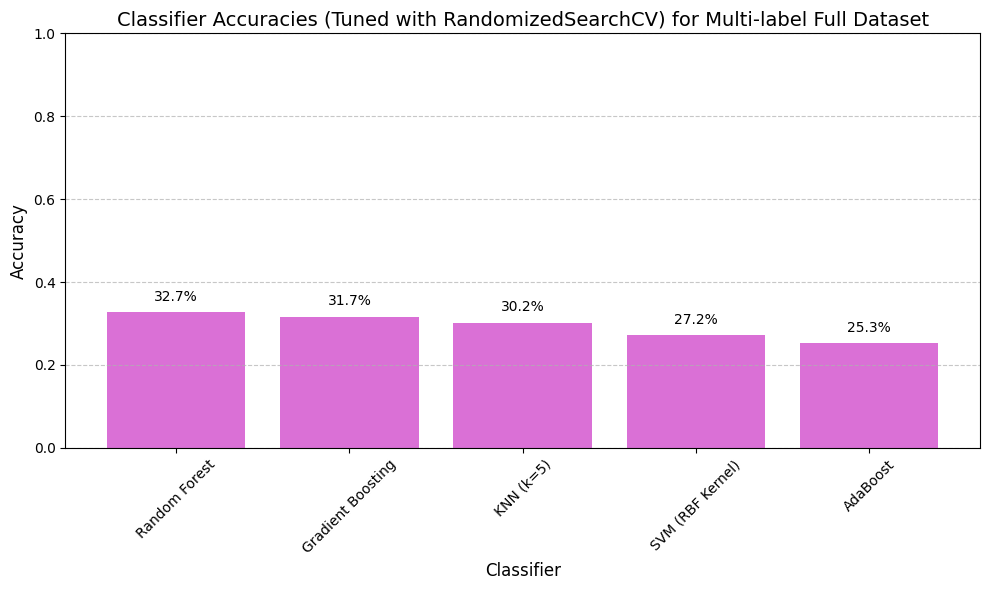

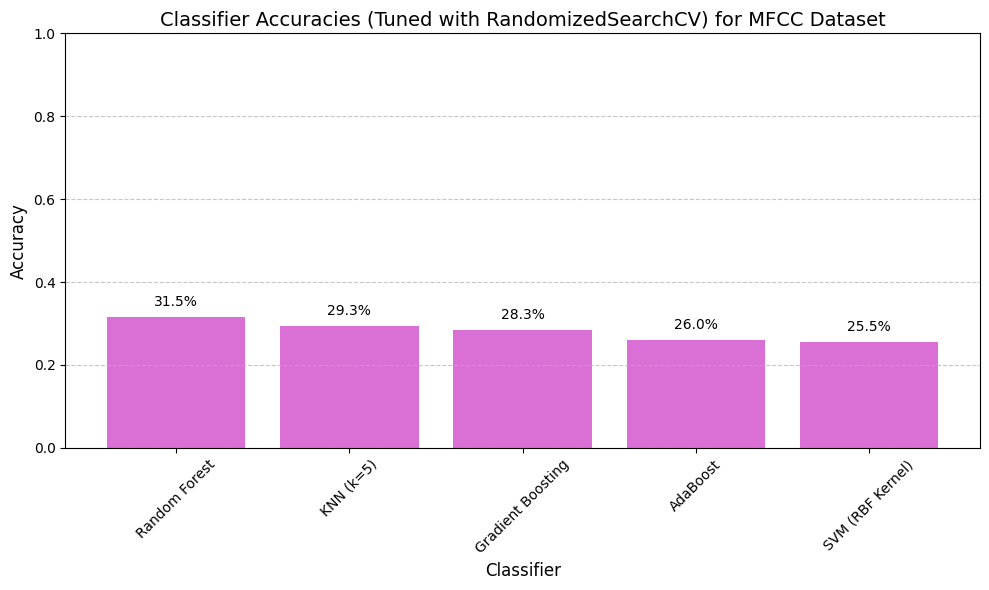

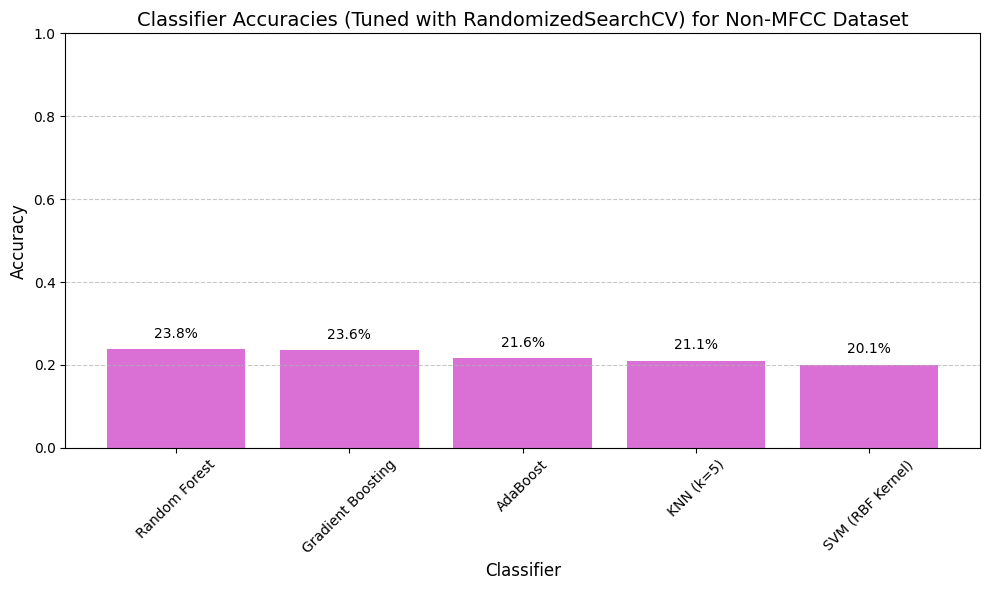

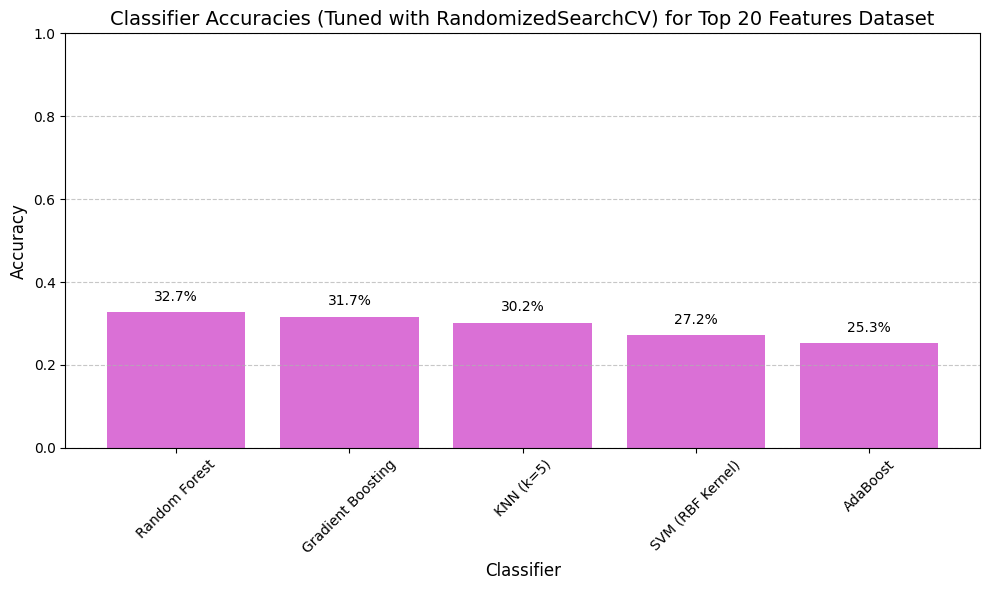

In [121]:
datasets = {
    "Multi-label Full Dataset": multi_lable_df,
    "MFCC Dataset": mfcc_multi_label_df,
    "Non-MFCC Dataset": non_mfcc_multi_label_df,
    "Top 20 Features Dataset": multi_label_top_20_features_dataset
}

# Parameters defining
param_distributions = {
    "Random Forest": {
        'estimator__n_estimators': [100, 200, 300],
        'estimator__max_depth': [None, 10, 20, 30],
        'estimator__min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'estimator__n_estimators': [100, 200],
        'estimator__learning_rate': [0.01, 0.1, 0.2],
        'estimator__max_depth': [3, 5, 7]
    },
    "AdaBoost": {
        'estimator__n_estimators': [50, 100, 200],
        'estimator__learning_rate': [0.01, 0.1, 1.0]
    },
    "SVM (RBF Kernel)": {
        'estimator__C': [0.1, 1, 10],
        'estimator__gamma': ['scale', 'auto']
    },
    "KNN (k=5)": {
        'estimator__n_neighbors': [3, 5, 7, 9],
        'estimator__weights': ['uniform', 'distance']
    }
}

base_classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(probability=True, random_state=42),
    "KNN (k=5)": KNeighborsClassifier()
}

results = {}

# Search function for RandomizedSearchCV


def randomized_search_cv(X, y, base_classifiers, param_distributions, n_iter=10, n_splits=5):
    best_classifiers = {}
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for clf_name, base_clf in base_classifiers.items():
        print(f"\n{'-'*10} Randomized Search for {clf_name} {'-'*10}")

        model = OneVsRestClassifier(base_clf)

        random_search = RandomizedSearchCV(
            model,
            param_distributions=param_distributions[clf_name],
            n_iter=n_iter,
            scoring='accuracy',
            cv=kf,
            verbose=1,
            n_jobs=-1,
            random_state=42
        )

        random_search.fit(X, y)
        best_model = random_search.best_estimator_
        best_classifiers[clf_name] = best_model

        print(f"Best params for {clf_name}: {random_search.best_params_}")
        print(
            f"Best CV Accuracy for {clf_name}: {random_search.best_score_:.4f}")

    return best_classifiers


def cross_validate(X, y, classifiers, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    clf_results = {name: [] for name in classifiers.keys()}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            clf_results[clf_name].append(acc)

    avg_results = {name: np.mean(scores)
                   for name, scores in clf_results.items()}

    return avg_results



for dataset_name, dataset in datasets.items():
    print(f"\n{'='*60}\nDataset: {dataset_name}\n{'='*60}")

    X = dataset.iloc[:, :-6].values
    y = dataset.iloc[:, -6:].values

    best_classifiers = randomized_search_cv(
        X, y, base_classifiers, param_distributions, n_iter=10, n_splits=3)
    results[dataset_name] = cross_validate(X, y, best_classifiers, n_splits=5)


for dataset_name, accuracies in results.items():
    plt.figure(figsize=(10, 6))
    sorted_acc = dict(
        sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

    bars = plt.bar(sorted_acc.keys(), sorted_acc.values(), color='orchid')
    plt.title(
        f"Classifier Accuracies (Tuned with RandomizedSearchCV) for {dataset_name}", fontsize=14)
    plt.xlabel("Classifier", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
                 f"{bar.get_height() * 100:.1f}%", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

## Ensemble Learning on Multi-Label Dataset

Training classifiers on Multi-label Full Dataset...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning AdaBoost...
Tuning SVM...
Tuning KNN...
Training Random Forest on Multi-label Full Dataset...
Random Forest Accuracy on Multi-label Full Dataset: 0.3193
              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.57      0.24      0.34        33
           2       0.72      0.91      0.80        53
           3       0.80      0.87      0.83        23
           4       0.77      0.55      0.64        31
           5       0.82      0.66      0.73        41

   micro avg       0.75      0.63      0.69       217
   macro avg       0.74      0.62      0.66       217
weighted avg       0.74      0.63      0.66       217
 samples avg       0.66      0.63      0.61       217

Training Gradient Boosting on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on Multi-label Full Dataset: 0.3193
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        36
           1       0.60      0.36      0.45        33
           2       0.73      0.89      0.80        53
           3       0.75      0.91      0.82        23
           4       0.83      0.48      0.61        31
           5       0.80      0.59      0.68        41

   micro avg       0.74      0.60      0.66       217
   macro avg       0.74      0.59      0.64       217
weighted avg       0.74      0.60      0.64       217
 samples avg       0.64      0.61      0.59       217

Training AdaBoost on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on Multi-label Full Dataset: 0.2269
              precision    recall  f1-score   support

           0       0.58      0.31      0.40        36
           1       0.44      0.21      0.29        33
           2       0.69      0.87      0.77        53
           3       0.76      0.83      0.79        23
           4       0.73      0.52      0.60        31
           5       0.79      0.66      0.72        41

   micro avg       0.69      0.58      0.63       217
   macro avg       0.66      0.56      0.59       217
weighted avg       0.66      0.58      0.60       217
 samples avg       0.62      0.57      0.56       217

Training SVM on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on Multi-label Full Dataset: 0.1597
              precision    recall  f1-score   support

           0       0.59      0.44      0.51        36
           1       0.00      0.00      0.00        33
           2       0.72      0.74      0.73        53
           3       0.58      0.65      0.61        23
           4       0.00      0.00      0.00        31
           5       0.86      0.44      0.58        41

   micro avg       0.69      0.41      0.51       217
   macro avg       0.46      0.38      0.40       217
weighted avg       0.50      0.41      0.44       217
 samples avg       0.56      0.41      0.45       217

Training KNN on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy on Multi-label Full Dataset: 0.1345
              precision    recall  f1-score   support

           0       0.69      0.31      0.42        36
           1       0.00      0.00      0.00        33
           2       0.69      0.70      0.69        53
           3       0.52      0.48      0.50        23
           4       0.58      0.23      0.33        31
           5       0.75      0.44      0.55        41

   micro avg       0.65      0.39      0.48       217
   macro avg       0.54      0.36      0.42       217
weighted avg       0.56      0.39      0.44       217
 samples avg       0.50      0.38      0.41       217

Training Voting Ensemble on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voting Ensemble Accuracy on Multi-label Full Dataset: 0.3109
              precision    recall  f1-score   support

           0       0.72      0.36      0.48        36
           1       0.67      0.12      0.21        33
           2       0.76      0.94      0.84        53
           3       0.87      0.87      0.87        23
           4       0.88      0.48      0.62        31
           5       0.80      0.49      0.61        41

   micro avg       0.79      0.56      0.66       217
   macro avg       0.78      0.54      0.60       217
weighted avg       0.78      0.56      0.61       217
 samples avg       0.66      0.56      0.58       217

Training Stacking Ensemble on Multi-label Full Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stacking Ensemble Accuracy on Multi-label Full Dataset: 0.3277
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        36
           1       0.57      0.24      0.34        33
           2       0.75      0.92      0.83        53
           3       0.78      0.91      0.84        23
           4       0.75      0.48      0.59        31
           5       0.81      0.51      0.63        41

   micro avg       0.75      0.60      0.67       217
   macro avg       0.74      0.59      0.63       217
weighted avg       0.74      0.60      0.64       217
 samples avg       0.65      0.60      0.60       217

Training classifiers on MFCC Dataset...
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuning Gradient Boosting...
Tuning AdaBoost...
Tuning SVM...
Tuning KNN...
Training Random Forest on MFCC Dataset...
Random Forest Accuracy on MFCC Dataset: 0.3193
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        36
           1       0.67      0.18      0.29        33
           2       0.70      0.92      0.80        53
           3       0.79      0.83      0.81        23
           4       0.88      0.48      0.62        31
           5       0.82      0.56      0.67        41

   micro avg       0.75      0.59      0.66       217
   macro avg       0.76      0.57      0.62       217
weighted avg       0.76      0.59      0.63       217
 samples avg       0.64      0.59      0.59       217

Training Gradient Boosting on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on MFCC Dataset: 0.2101
              precision    recall  f1-score   support

           0       0.70      0.19      0.30        36
           1       0.44      0.21      0.29        33
           2       0.71      0.85      0.78        53
           3       0.59      0.74      0.65        23
           4       0.76      0.42      0.54        31
           5       0.81      0.63      0.71        41

   micro avg       0.69      0.53      0.60       217
   macro avg       0.67      0.51      0.55       217
weighted avg       0.68      0.53      0.56       217
 samples avg       0.62      0.54      0.54       217

Training AdaBoost on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on MFCC Dataset: 0.2773
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        36
           1       0.53      0.27      0.36        33
           2       0.68      0.94      0.79        53
           3       0.74      0.87      0.80        23
           4       0.93      0.45      0.61        31
           5       0.76      0.68      0.72        41

   micro avg       0.72      0.63      0.67       217
   macro avg       0.73      0.61      0.64       217
weighted avg       0.72      0.63      0.65       217
 samples avg       0.67      0.62      0.61       217

Training SVM on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on MFCC Dataset: 0.2689
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        36
           1       0.45      0.15      0.23        33
           2       0.65      0.77      0.71        53
           3       0.80      0.87      0.83        23
           4       0.75      0.48      0.59        31
           5       0.76      0.54      0.63        41

   micro avg       0.69      0.55      0.62       217
   macro avg       0.68      0.55      0.59       217
weighted avg       0.68      0.55      0.59       217
 samples avg       0.58      0.55      0.53       217

Training KNN on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy on MFCC Dataset: 0.2017
              precision    recall  f1-score   support

           0       0.73      0.22      0.34        36
           1       0.38      0.09      0.15        33
           2       0.65      0.79      0.71        53
           3       0.58      0.83      0.68        23
           4       0.58      0.48      0.53        31
           5       0.70      0.56      0.62        41

   micro avg       0.62      0.51      0.56       217
   macro avg       0.60      0.50      0.50       217
weighted avg       0.61      0.51      0.52       217
 samples avg       0.56      0.50      0.49       217

Training Voting Ensemble on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voting Ensemble Accuracy on MFCC Dataset: 0.2689
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        36
           1       0.50      0.15      0.23        33
           2       0.72      0.89      0.80        53
           3       0.74      0.87      0.80        23
           4       0.89      0.55      0.68        31
           5       0.81      0.61      0.69        41

   micro avg       0.74      0.58      0.65       217
   macro avg       0.72      0.57      0.61       217
weighted avg       0.72      0.58      0.62       217
 samples avg       0.64      0.58      0.58       217

Training Stacking Ensemble on MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stacking Ensemble Accuracy on MFCC Dataset: 0.2857
              precision    recall  f1-score   support

           0       0.64      0.39      0.48        36
           1       0.50      0.24      0.33        33
           2       0.73      0.89      0.80        53
           3       0.78      0.91      0.84        23
           4       0.82      0.58      0.68        31
           5       0.81      0.61      0.69        41

   micro avg       0.73      0.61      0.67       217
   macro avg       0.71      0.60      0.64       217
weighted avg       0.71      0.61      0.64       217
 samples avg       0.66      0.61      0.60       217

Training classifiers on Non-MFCC Dataset...
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuning Gradient Boosting...
Tuning AdaBoost...
Tuning SVM...
Tuning KNN...
Training Random Forest on Non-MFCC Dataset...
Random Forest Accuracy on Non-MFCC Dataset: 0.2521
              precision    recall  f1-score   support

           0       0.68      0.36      0.47        36
           1       0.57      0.12      0.20        33
           2       0.67      0.66      0.67        53
           3       0.70      0.83      0.76        23
           4       0.71      0.55      0.62        31
           5       0.66      0.51      0.58        41

   micro avg       0.68      0.50      0.58       217
   macro avg       0.67      0.50      0.55       217
weighted avg       0.66      0.50      0.55       217
 samples avg       0.57      0.51      0.51       217

Training Gradient Boosting on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on Non-MFCC Dataset: 0.2353
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        36
           1       0.50      0.27      0.35        33
           2       0.63      0.68      0.65        53
           3       0.63      0.83      0.72        23
           4       0.81      0.42      0.55        31
           5       0.67      0.49      0.56        41

   micro avg       0.64      0.52      0.57       217
   macro avg       0.64      0.52      0.56       217
weighted avg       0.64      0.52      0.56       217
 samples avg       0.57      0.51      0.51       217

Training AdaBoost on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on Non-MFCC Dataset: 0.2605
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        36
           1       0.67      0.06      0.11        33
           2       0.64      0.64      0.64        53
           3       0.69      0.87      0.77        23
           4       0.71      0.55      0.62        31
           5       0.59      0.46      0.52        41

   micro avg       0.65      0.49      0.56       217
   macro avg       0.66      0.50      0.53       217
weighted avg       0.66      0.49      0.52       217
 samples avg       0.53      0.49      0.48       217

Training SVM on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on Non-MFCC Dataset: 0.0756
              precision    recall  f1-score   support

           0       1.00      0.06      0.11        36
           1       0.00      0.00      0.00        33
           2       0.65      0.58      0.61        53
           3       0.38      0.13      0.19        23
           4       0.00      0.00      0.00        31
           5       0.78      0.17      0.28        41

   micro avg       0.64      0.20      0.30       217
   macro avg       0.47      0.16      0.20       217
weighted avg       0.51      0.20      0.24       217
 samples avg       0.33      0.20      0.24       217

Training KNN on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy on Non-MFCC Dataset: 0.0672
              precision    recall  f1-score   support

           0       0.75      0.08      0.15        36
           1       0.38      0.09      0.15        33
           2       0.58      0.60      0.59        53
           3       0.60      0.13      0.21        23
           4       0.33      0.06      0.11        31
           5       0.56      0.22      0.32        41

   micro avg       0.55      0.24      0.33       217
   macro avg       0.53      0.20      0.25       217
weighted avg       0.54      0.24      0.29       217
 samples avg       0.36      0.24      0.27       217

Training Voting Ensemble on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voting Ensemble Accuracy on Non-MFCC Dataset: 0.2017
              precision    recall  f1-score   support

           0       0.80      0.22      0.35        36
           1       0.57      0.12      0.20        33
           2       0.72      0.74      0.73        53
           3       0.85      0.74      0.79        23
           4       1.00      0.39      0.56        31
           5       0.74      0.34      0.47        41

   micro avg       0.77      0.43      0.55       217
   macro avg       0.78      0.42      0.52       217
weighted avg       0.77      0.43      0.52       217
 samples avg       0.56      0.43      0.46       217

Training Stacking Ensemble on Non-MFCC Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stacking Ensemble Accuracy on Non-MFCC Dataset: 0.2521
              precision    recall  f1-score   support

           0       0.69      0.25      0.37        36
           1       0.56      0.27      0.37        33
           2       0.70      0.72      0.71        53
           3       0.70      0.83      0.76        23
           4       0.76      0.52      0.62        31
           5       0.70      0.46      0.56        41

   micro avg       0.70      0.51      0.59       217
   macro avg       0.69      0.51      0.56       217
weighted avg       0.69      0.51      0.56       217
 samples avg       0.56      0.50      0.50       217

Training classifiers on Top 20 Features Dataset...
Tuning Random Forest...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tuning Gradient Boosting...
Tuning AdaBoost...
Tuning SVM...
Tuning KNN...
Training Random Forest on Top 20 Features Dataset...
Random Forest Accuracy on Top 20 Features Dataset: 0.3193
              precision    recall  f1-score   support

           0       0.77      0.47      0.59        36
           1       0.57      0.24      0.34        33
           2       0.72      0.91      0.80        53
           3       0.80      0.87      0.83        23
           4       0.77      0.55      0.64        31
           5       0.82      0.66      0.73        41

   micro avg       0.75      0.63      0.69       217
   macro avg       0.74      0.62      0.66       217
weighted avg       0.74      0.63      0.66       217
 samples avg       0.66      0.63      0.61       217

Training Gradient Boosting on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Accuracy on Top 20 Features Dataset: 0.3193
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        36
           1       0.60      0.36      0.45        33
           2       0.73      0.89      0.80        53
           3       0.75      0.91      0.82        23
           4       0.83      0.48      0.61        31
           5       0.80      0.59      0.68        41

   micro avg       0.74      0.60      0.66       217
   macro avg       0.74      0.59      0.64       217
weighted avg       0.74      0.60      0.64       217
 samples avg       0.64      0.61      0.59       217

Training AdaBoost on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AdaBoost Accuracy on Top 20 Features Dataset: 0.2269
              precision    recall  f1-score   support

           0       0.58      0.31      0.40        36
           1       0.44      0.21      0.29        33
           2       0.69      0.87      0.77        53
           3       0.76      0.83      0.79        23
           4       0.73      0.52      0.60        31
           5       0.79      0.66      0.72        41

   micro avg       0.69      0.58      0.63       217
   macro avg       0.66      0.56      0.59       217
weighted avg       0.66      0.58      0.60       217
 samples avg       0.62      0.57      0.56       217

Training SVM on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy on Top 20 Features Dataset: 0.1597
              precision    recall  f1-score   support

           0       0.59      0.44      0.51        36
           1       0.00      0.00      0.00        33
           2       0.72      0.74      0.73        53
           3       0.58      0.65      0.61        23
           4       0.00      0.00      0.00        31
           5       0.86      0.44      0.58        41

   micro avg       0.69      0.41      0.51       217
   macro avg       0.46      0.38      0.40       217
weighted avg       0.50      0.41      0.44       217
 samples avg       0.56      0.41      0.45       217

Training KNN on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy on Top 20 Features Dataset: 0.1345
              precision    recall  f1-score   support

           0       0.69      0.31      0.42        36
           1       0.00      0.00      0.00        33
           2       0.69      0.70      0.69        53
           3       0.52      0.48      0.50        23
           4       0.58      0.23      0.33        31
           5       0.75      0.44      0.55        41

   micro avg       0.65      0.39      0.48       217
   macro avg       0.54      0.36      0.42       217
weighted avg       0.56      0.39      0.44       217
 samples avg       0.50      0.38      0.41       217

Training Voting Ensemble on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voting Ensemble Accuracy on Top 20 Features Dataset: 0.3109
              precision    recall  f1-score   support

           0       0.72      0.36      0.48        36
           1       0.67      0.12      0.21        33
           2       0.76      0.94      0.84        53
           3       0.87      0.87      0.87        23
           4       0.88      0.48      0.62        31
           5       0.80      0.49      0.61        41

   micro avg       0.79      0.56      0.66       217
   macro avg       0.78      0.54      0.60       217
weighted avg       0.78      0.56      0.61       217
 samples avg       0.66      0.56      0.58       217

Training Stacking Ensemble on Top 20 Features Dataset...


f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stacking Ensemble Accuracy on Top 20 Features Dataset: 0.3277
              precision    recall  f1-score   support

           0       0.76      0.44      0.56        36
           1       0.57      0.24      0.34        33
           2       0.75      0.92      0.83        53
           3       0.78      0.91      0.84        23
           4       0.75      0.48      0.59        31
           5       0.81      0.51      0.63        41

   micro avg       0.75      0.60      0.67       217
   macro avg       0.74      0.59      0.63       217
weighted avg       0.74      0.60      0.64       217
 samples avg       0.65      0.60      0.60       217



f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


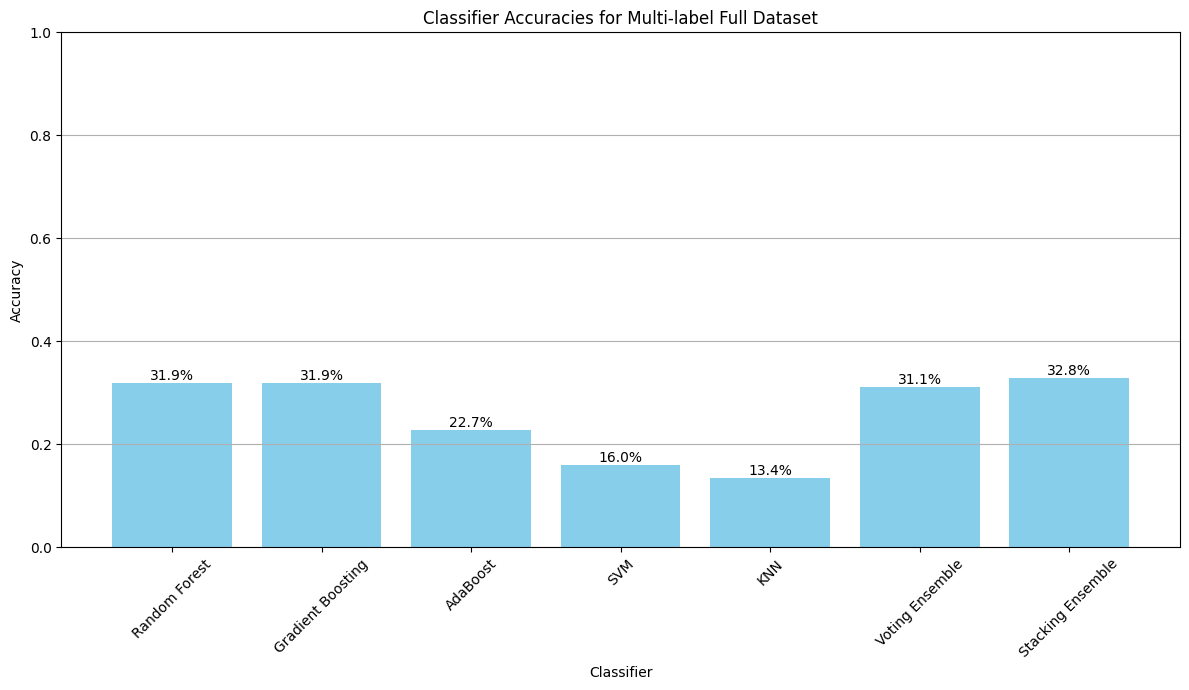

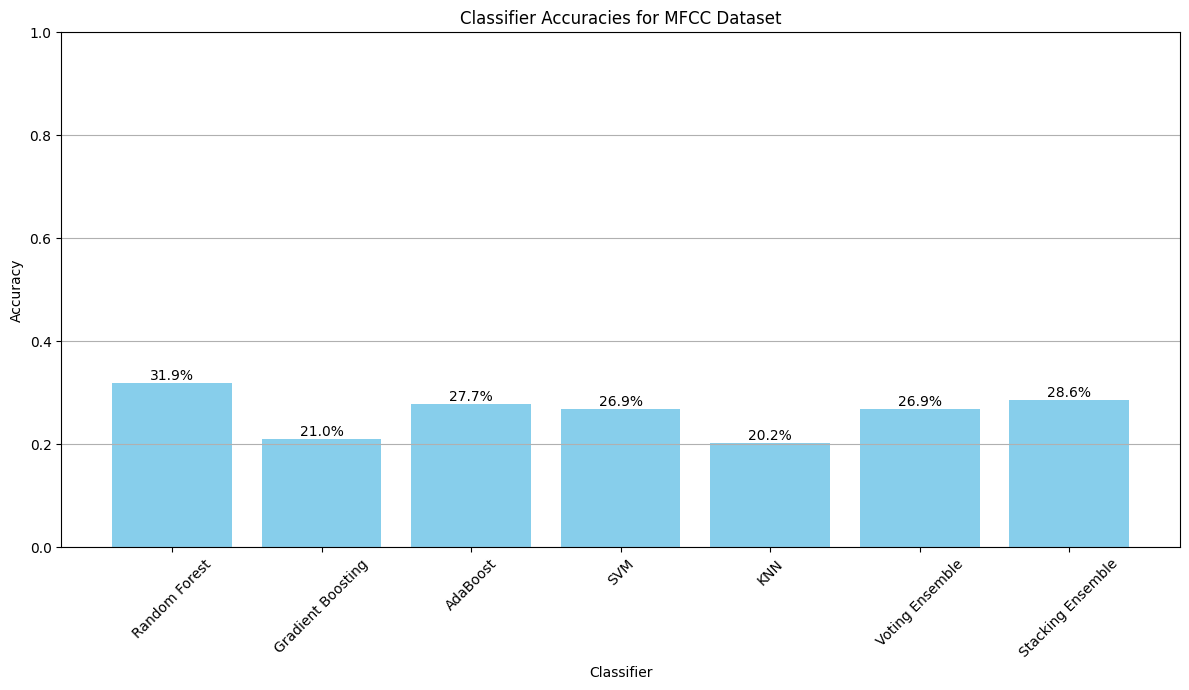

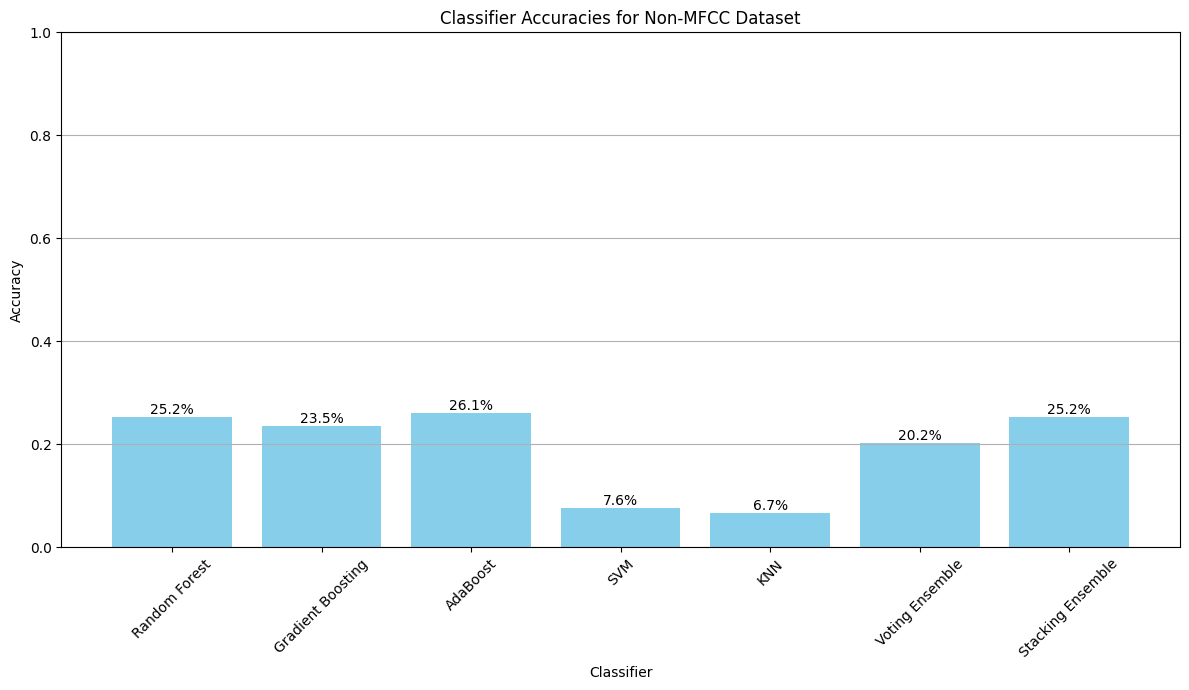

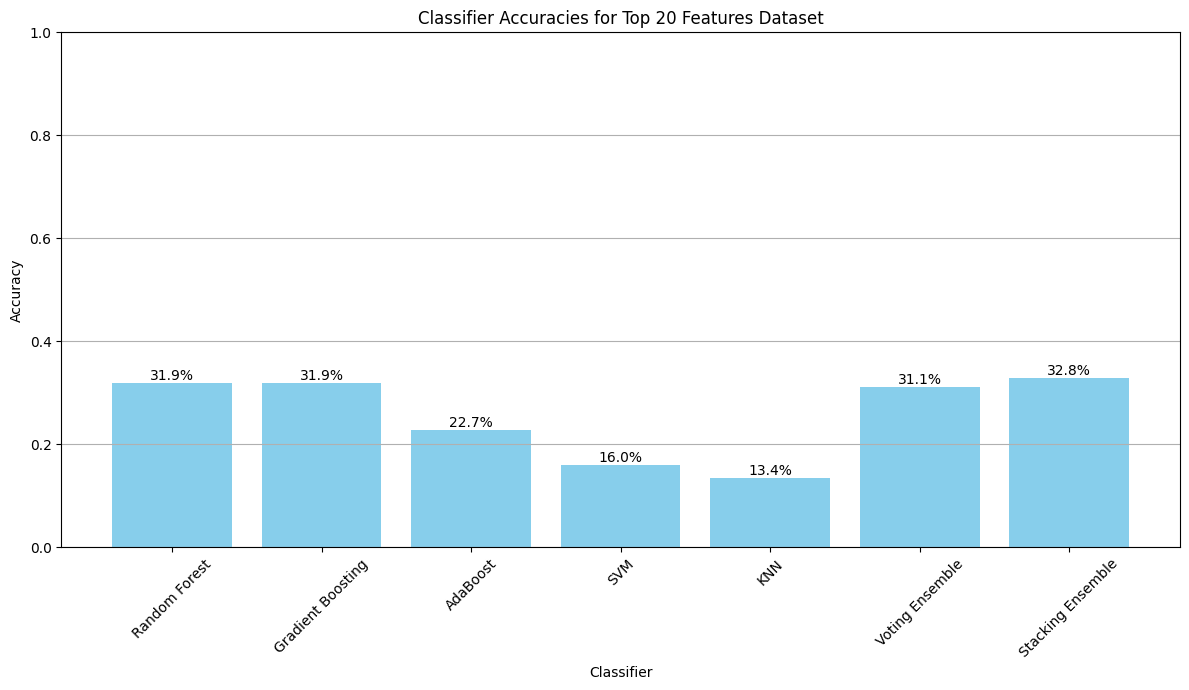

In [122]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint as sp_randint, uniform
import matplotlib.pyplot as plt
import numpy as np


base_classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}


param_distributions = {
    "Random Forest": {
        'n_estimators': sp_randint(50, 200),
        'max_depth': sp_randint(3, 20)
    },
    "Gradient Boosting": {
        'n_estimators': sp_randint(50, 200),
        'learning_rate': uniform(0.01, 0.3),
        'max_depth': sp_randint(3, 10)
    },
    "AdaBoost": {
        'n_estimators': sp_randint(50, 200),
        'learning_rate': uniform(0.01, 1.0)
    },
    "SVM": {
        'C': uniform(0.1, 10),
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': sp_randint(3, 15)
    }
}


datasets = {
    "Multi-label Full Dataset": multi_lable_df,
    "MFCC Dataset": mfcc_multi_label_df,
    "Non-MFCC Dataset": non_mfcc_multi_label_df,
    "Top 20 Features Dataset": multi_label_top_20_features_dataset
}

results = {}

for dataset_name, dataset in datasets.items():
    print(f"Training classifiers on {dataset_name}...")

    X = dataset.iloc[:, :-6].values
    y = dataset.iloc[:, -6:].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    results[dataset_name] = {}

    tuned_classifiers = {}


    for clf_name, clf in base_classifiers.items():
        print(f"Tuning {clf_name}...")
        random_search = RandomizedSearchCV(
            clf,
            param_distributions=param_distributions[clf_name],
            n_iter=10,
            scoring='accuracy',
            cv=5,
            verbose=0,
            n_jobs=-1,
            random_state=42
        )
        ovr = OneVsRestClassifier(random_search)
        ovr.fit(X_train, y_train)
        tuned_classifiers[clf_name] = ovr


    estimators_for_ensemble = [(name, model.estimator)
                               for name, model in tuned_classifiers.items()]

    voting_clf = OneVsRestClassifier(
        VotingClassifier(estimators=estimators_for_ensemble,
                         voting='soft', n_jobs=-1)
    )

    stacking_clf = OneVsRestClassifier(
        StackingClassifier(
            estimators=estimators_for_ensemble,
            final_estimator=LogisticRegression(max_iter=1000),
            cv=5,
            n_jobs=-1
        )
    )


    final_classifiers = tuned_classifiers.copy()
    final_classifiers["Voting Ensemble"] = voting_clf
    final_classifiers["Stacking Ensemble"] = stacking_clf


    for clf_name, clf in final_classifiers.items():
        print(f"Training {clf_name} on {dataset_name}...")

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        results[dataset_name][clf_name] = acc

        print(f"{clf_name} Accuracy on {dataset_name}: {acc:.4f}")
        print(classification_report(y_test, y_pred))


for dataset_name, accuracies in results.items():
    plt.figure(figsize=(12, 7))
    bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
    plt.title(f"Classifier Accuracies for {dataset_name}")
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')


    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 f"{bar.get_height() * 100:.1f}%", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# DEAM Dataset

In [ ]:
path = "DEAM"

In [ ]:
files = os.listdir(path)
print("Files and subdirectories in the dataset:")
print(files)

Files and subdirectories in the dataset:
['DEAM_Annotations', 'DEAM_audio', 'features']


In [258]:
# Base dataset path
dataset_path = path

# Define the paths for "DEAM_audio/MEMD_audio" and the static annotations CSV
audio_dir = os.path.join(dataset_path, 'DEAM_audio', 'MEMD_audio')
static_csv = os.path.join(dataset_path, 'DEAM_Annotations', 'annotations',
                          'annotations averaged per song', 'song_level',
                          'static_annotations_averaged_songs_1_2000.csv')

# Print to verify the paths
print("Audio Directory Path:", audio_dir)
print("Static CSV Path:", static_csv)

# Check if the paths exist
if os.path.exists(audio_dir):
    print("Audio directory exists.")
else:
    print("Audio directory does not exist!")

if os.path.exists(static_csv):
    print("Static CSV file exists.")
else:
    print("Static CSV file does not exist!")

Audio Directory Path: DEAM\DEAM_audio\MEMD_audio
Static CSV Path: DEAM\DEAM_Annotations\annotations\annotations averaged per song\song_level\static_annotations_averaged_songs_1_2000.csv
Audio directory exists.
Static CSV file exists.


In [259]:
song_id = 2
audio_path = os.path.join(audio_dir, f"{song_id}.mp3")
audio_path

'DEAM\\DEAM_audio\\MEMD_audio\\2.mp3'

In [144]:
y, sr = librosa.load(audio_path, sr=44100, mono=True)
print(f"Audio loaded: {len(y)} samples at {sr} Hz")

Audio loaded: 1987190 samples at 44100 Hz


In [262]:
def compute_mel_spectrogram(y, sr, n_mels=128, n_fft=2048, hop_length=512):
    """Compute mel-spectrogram and convert to dB scale."""
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    return librosa.power_to_db(mel_spec, ref=np.max)


def load_static_annotations(csv_path, song_id):
    """Load static annotations and extract valence and arousal."""
    df = pd.read_csv(csv_path)
    label = df[df['song_id'] == song_id][[
        ' valence_mean', ' arousal_mean']].values[0]
    return label


def segment_audio(y, sr, segment_length):
    """Segment audio into fixed-length chunks."""
    segment_samples = segment_length * sr
    return [y[i:i + segment_samples] for i in range(0, len(y), segment_samples)
            if len(y[i:i + segment_samples]) == segment_samples]


# Main script
print("Processing audio data...")

# Convert to mel-spectrogram
mel_spec_db = compute_mel_spectrogram(y=y, sr=sr)
print(f"Mel-spectrogram shape: {mel_spec_db.shape}")

# Load static annotations
label = load_static_annotations(static_csv, song_id)
print(f"Valence: {label[0]}, Arousal: {label[1]}")

# Segment into 5-second chunks (for consistency with CNN)
segment_length = 5  # seconds
segments = segment_audio(y, sr, segment_length)
print(f"Number of 5-second segments: {len(segments)}")

# Compute mel-spectrograms for each segment
mel_specs = np.array([compute_mel_spectrogram(segment, sr)
                     for segment in segments])
print(f"Shape of each segment's mel-spectrogram: {mel_specs[0].shape}")

Processing audio data...
Mel-spectrogram shape: (128, 3882)
Valence: 3.1, Arousal: 3.0
Number of 5-second segments: 9
Shape of each segment's mel-spectrogram: (128, 431)


Visualizing data...


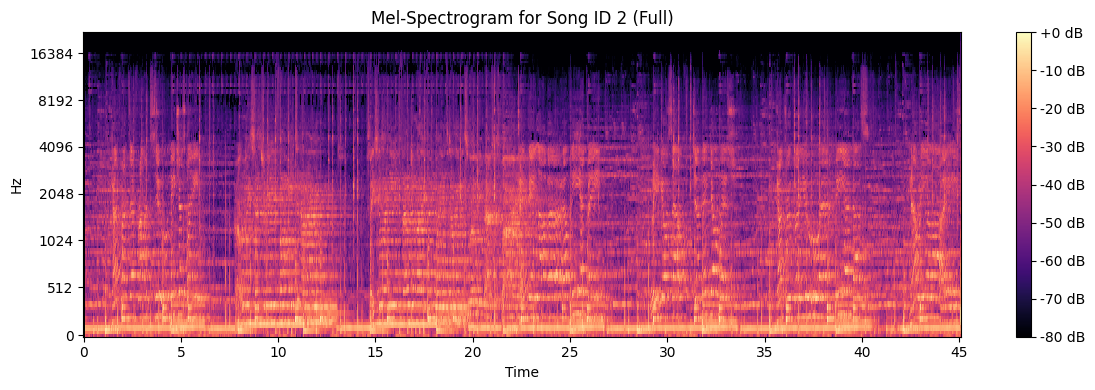

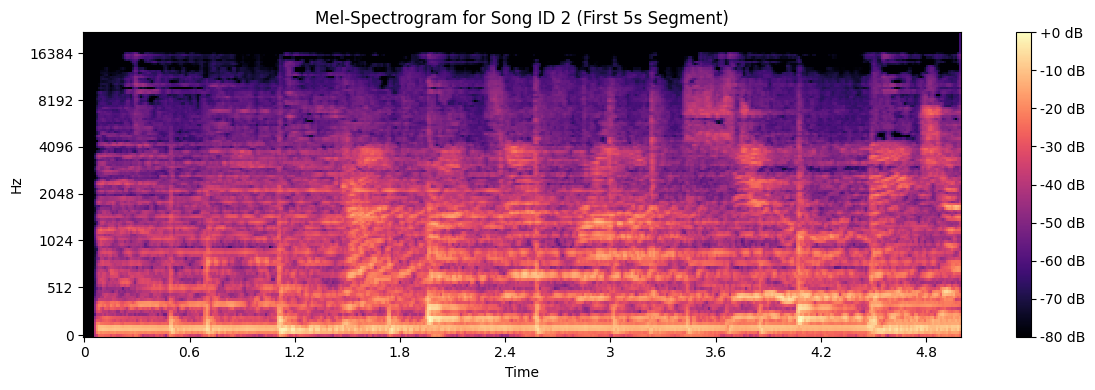

In [ ]:
def visualize_full_mel_spectrogram(mel_spec_db, sr, song_id, hop_length=512):
    """Visualize the full mel-spectrogram."""
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(
        mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram for Song ID {song_id} (Full)')
    plt.tight_layout()
    plt.show()


def visualize_first_segment_mel_spectrogram(mel_spec_segment, sr, song_id, hop_length=512):
    """Visualize the mel-spectrogram of the first segment."""
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mel_spec_segment, sr=sr,
                             hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram for Song ID {song_id} (First 5s Segment)')
    plt.tight_layout()
    plt.show()


# Main script
print("Visualizing data...")

# Visualize full mel-spectrogram
visualize_full_mel_spectrogram(mel_spec_db, sr, song_id)

# Visualize first segment's mel-spectrogram
visualize_first_segment_mel_spectrogram(mel_specs[0], sr, song_id)

In [ ]:
def extract_mfcc(y, sr, n_mfcc=13, n_fft=2048, hop_length=512):
    """
    Extract MFCC features from an audio signal.

    Parameters:
    y (numpy.ndarray): Audio time series.
    sr (int): Sampling rate of the audio.
    n_mfcc (int): Number of MFCCs to return.
    n_fft (int): Length of the FFT window.
    hop_length (int): Number of samples between successive frames.

    Returns:
    numpy.ndarray: MFCC features.
    """
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfcc

mfcc_features = extract_mfcc(y, sr)
print(f"MFCC shape: {mfcc_features.shape}")

# Segment into 5-second chunks (for consistency with CNN)
segment_length = 5  # seconds
segments = segment_audio(y, sr, segment_length)
print(f"Number of 5-second segments: {len(segments)}")

MFCC shape: (13, 3882)
Number of 5-second segments: 9


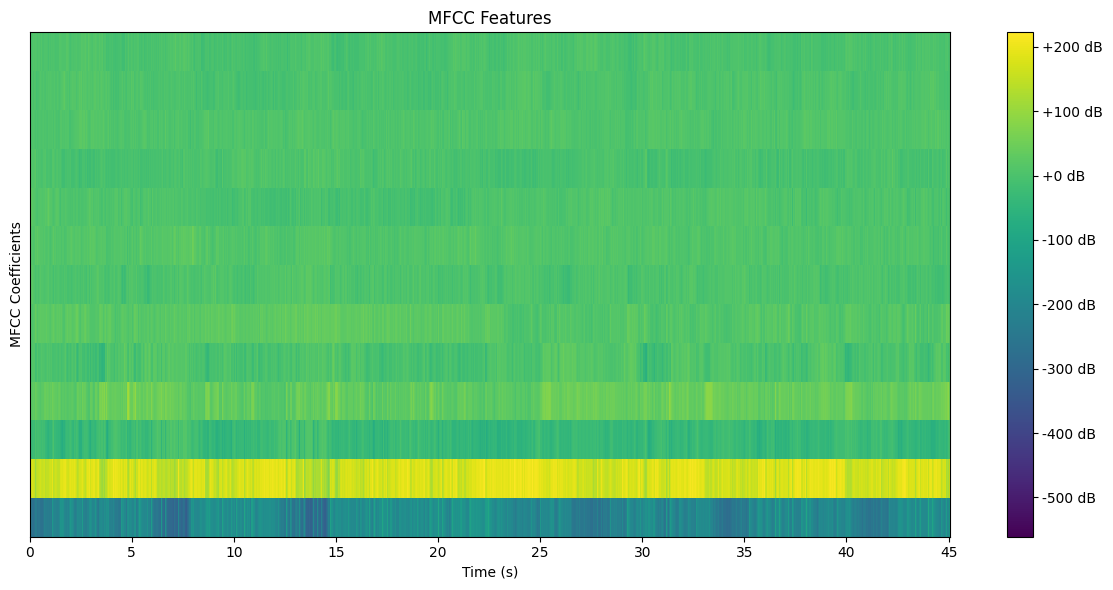

In [132]:
# Plot the MFCC features
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc_features, x_axis='time', sr=sr, hop_length=512, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Features')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [ ]:
def extract_chroma(y, sr, n_chroma=12, n_fft=2048, hop_length=512):
    """
    Extract chroma features from an audio signal.

    Parameters:
    y (numpy.ndarray): Audio time series.
    sr (int): Sampling rate of the audio.
    n_chroma (int): Number of chroma bins to return.
    n_fft (int): Length of the FFT window.
    hop_length (int): Number of samples between successive frames.

    Returns:
    numpy.ndarray: Chroma features.
    """
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=n_chroma, n_fft=n_fft, hop_length=hop_length)
    return chroma

chroma_features = extract_chroma(y, sr)
print(f"Chroma shape: {chroma_features.shape}")

Chroma shape: (12, 3882)


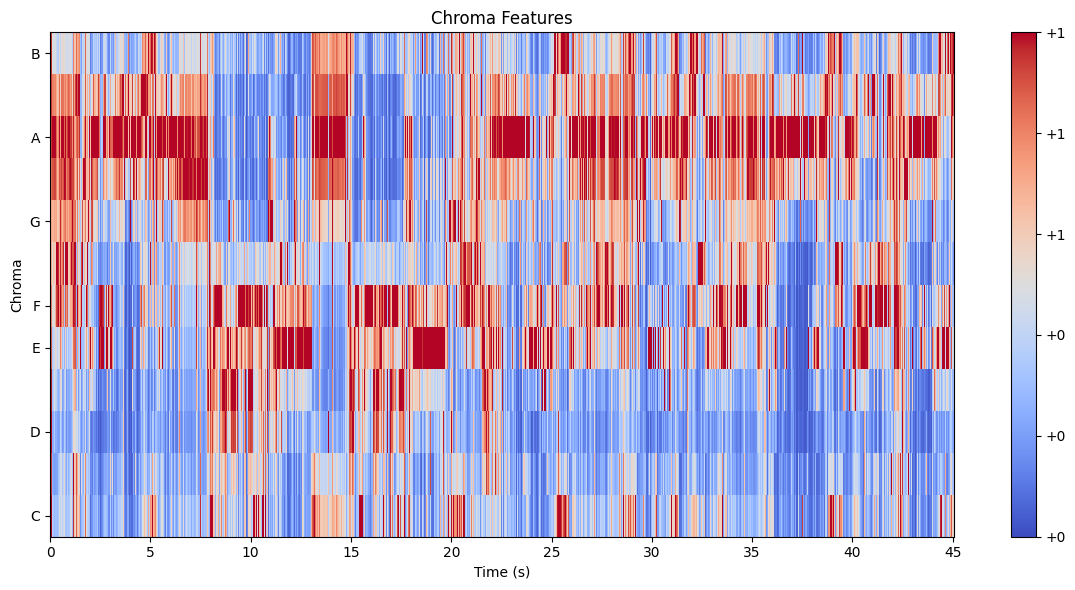

In [134]:
# Plot the chroma features
plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma_features, x_axis='time', y_axis='chroma', sr=sr, hop_length=512, cmap='coolwarm')
plt.colorbar(format='%+2.0f')
plt.title('Chroma Features')
plt.xlabel('Time (s)')
plt.ylabel('Chroma')
plt.tight_layout()
plt.show()

## DEAM Mel-Spectogram Regression

## Preprocess for CNN-LSTM

In [308]:
def process_audio_file(audio_path, sr=44100, segment_length=5):
    try:
        y_full, sr = librosa.load(audio_path, sr=sr, mono=True)
        segment_samples = segment_length * sr
        segments = [
            y_full[i:i + segment_samples]
            for i in range(0, len(y_full), segment_samples)
            if len(y_full[i:i + segment_samples]) == segment_samples
        ]
        return segments, sr
    except Exception as e:
        print(f"Error loading audio file {audio_path}: {e}")
        return None, sr


def compute_mel_specs(segments, sr, n_mels=128, n_fft=2048, hop_length=512):
    mel_specs = []
    for segment in segments:
        try:
            mel_spec = librosa.feature.melspectrogram(
                y=segment, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
            mel_specs.append(mel_spec_db)
        except Exception as e:
            print(f"Error computing mel-spectrogram: {e}")
    return mel_specs


def get_labels(df, song_id):
    try:
        label = df[df['song_id'] == song_id][[
            ' valence_mean', ' arousal_mean']].values[0]
        return label
    except Exception as e:
        print(f"Error fetching labels for song ID {song_id}: {e}")
        return None


def process_all_songs(df, audio_dir, segment_length=5):
    mel_X = {}
    mel_y = {}

    for song_id in df['song_id'].values:
        audio_path = os.path.join(audio_dir, f"{song_id}.mp3")
        print(f"Processing song {song_id}...")

        segments, sr = process_audio_file(
            audio_path, segment_length=segment_length)
        if segments is None:
            continue

        label = get_labels(df, song_id)
        if label is None:
            continue

        mel_specs = compute_mel_specs(segments, sr)
        mel_X[song_id] = mel_specs
        mel_y[song_id] = [label] * len(mel_specs)

    return mel_X, mel_y


def extract_song_ids(mel_X):
    return list(mel_X.keys())


def split_data(song_ids, test_size=0.3, val_size=0.5, random_state=42):
    train_ids, temp_ids = train_test_split(
        song_ids, test_size=test_size, random_state=random_state)
    adjusted_val_size = val_size / (1 - test_size)
    val_ids, test_ids = train_test_split(
        temp_ids, test_size=adjusted_val_size, random_state=random_state)
    return train_ids, val_ids, test_ids


def flatten_data(song_ids, mel_X, mel_y):
    X = []
    y = []
    for song_id in song_ids:
        X.append(mel_X[song_id])
        y.append(mel_y[song_id])
    return np.concatenate(X, axis=0), np.concatenate(y, axis=0)


def reshape_input(X):
    X = np.array(X)
    return np.expand_dims(X, axis=-1)


def process_and_split(mel_X, mel_y):
    song_ids = extract_song_ids(mel_X)
    train_ids, val_ids, test_ids = split_data(song_ids)
    X_train, y_train = flatten_data(train_ids, mel_X, mel_y)
    X_val, y_val = flatten_data(val_ids, mel_X, mel_y)
    X_test, y_test = flatten_data(test_ids, mel_X, mel_y)

    X_train = reshape_input(X_train)
    X_val = reshape_input(X_val)
    X_test = reshape_input(X_test)

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)


# Main
print("Processing and splitting the data...")

df = pd.read_csv(static_csv)
mel_X, mel_y = process_all_songs(df, audio_dir)

# Process split
(X_train, y_train), (X_val, y_val), (X_test,
                                     y_test) = process_and_split(mel_X, mel_y)

print(
    f"Train segments: {X_train.shape}, Val segments: {X_val.shape}, Test segments: {X_test.shape}")
print(
    f"Train labels: {y_train.shape}, Val labels: {y_val.shape}, Test labels: {y_test.shape}")

Processing and splitting the data...
Processing song 2...
Processing song 3...
Processing song 4...
Processing song 5...
Processing song 7...
Processing song 8...
Processing song 10...
Processing song 12...
Processing song 13...
Processing song 17...
Processing song 18...
Processing song 19...
Processing song 20...
Processing song 21...
Processing song 22...
Processing song 24...
Processing song 25...
Processing song 31...
Processing song 32...
Processing song 35...
Processing song 37...
Processing song 39...
Processing song 40...
Processing song 41...
Processing song 42...
Processing song 43...
Processing song 44...
Processing song 45...
Processing song 46...
Processing song 47...
Processing song 48...
Processing song 49...
Processing song 50...
Processing song 51...
Processing song 52...
Processing song 53...
Processing song 54...
Processing song 55...
Processing song 56...
Processing song 58...
Processing song 59...
Processing song 60...
Processing song 62...
Processing song 64...
P

C:\Users\Pouya\AppData\Local\Temp\ipykernel_18916\3301219213.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y_full, sr = librosa.load(audio_path, sr=sr, mono=True)
f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file DEAM\DEAM_audio\MEMD_audio\1522.mp3: [Errno 2] No such file or directory: 'DEAM\\DEAM_audio\\MEMD_audio\\1522.mp3'
Processing song 1523...
Error loading audio file DEAM\DEAM_audio\MEMD_audio\1523.mp3: [Errno 2] No such file or directory: 'DEAM\\DEAM_audio\\MEMD_audio\\1523.mp3'
Processing song 1524...
Error loading audio file DEAM\DEAM_audio\MEMD_audio\1524.mp3: [Errno 2] No such file or directory: 'DEAM\\DEAM_audio\\MEMD_audio\\1524.mp3'
Processing song 1525...
Error loading audio file DEAM\DEAM_audio\MEMD_audio\1525.mp3: [Errno 2] No such file or directory: 'DEAM\\DEAM_audio\\MEMD_audio\\1525.mp3'
Processing song 1526...
Error loading audio file DEAM\DEAM_audio\MEMD_audio\1526.mp3: [Errno 2] No such file or directory: 'DEAM\\DEAM_audio\\MEMD_audio\\1526.mp3'
Processing song 1527...
Error loading audio file DEAM\DEAM_audio\MEMD_audio\1527.mp3: [Errno 2] No such file or directory: 'DEAM\\DEAM_audio\\MEMD_audio\\1527.mp3'
Processing song 1528...
Error loading au

## CNN-LSTM Model

In [ ]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu',
                  input_shape=(128, 431, 1), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Converting features to one dimension for input to LSTM
    layers.Reshape(target_shape=(-1, 512)),  # Dimension 512 for input to LSTM

    # لایه‌های Bidirectional LSTM
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Bidirectional(layers.LSTM(64, return_sequences=False)),


    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(2, activation='linear')  # پیش‌بینی Valence و Arousal
])

model.summary()

f:\Thesis\Thesis_Project\thesis_project_new\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)              │ (None, 128, 431, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_132         │ (None, 128, 431, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 64, 215, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_176 (Dropout)           │ (None, 64, 215, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 64, 215, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_133         │ (None, 64, 215, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 32, 107, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_177 (Dropout)           │ (None, 32, 107, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 32, 107, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_134         │ (None, 32, 107, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 16, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_178 (Dropout)           │ (None, 16, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 16, 53, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_135         │ (None, 16, 53, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 8, 26, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_179 (Dropout)           │ (None, 8, 26, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 8, 26, 512)     │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_136         │ (None, 8, 26, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 4, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_180 (Dropout)           │ (None, 4, 13, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_13 (Reshape)            │ (None, 52, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 52, 256)        │       656,384 │
│ (Bidirectional)                 │                        │             

 Total params: 2,461,442 (9.39 MB)

 Trainable params: 2,458,178 (9.38 MB)

 Non-trainable params: 3,264 (12.75 KB)

## Train Model

In [311]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 23.8951 - mae: 4.4383
Epoch 1: val_loss improved from inf to 15.96926, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - loss: 23.8739 - mae: 4.4364 - val_loss: 15.9693 - val_mae: 3.6971
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 13.5256 - mae: 3.2321
Epoch 2: val_loss improved from 15.96926 to 4.99519, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 13.5022 - mae: 3.2284 - val_loss: 4.9952 - val_mae: 1.8632
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 5.7393 - mae: 1.9258
Epoch 3: val_loss improved from 4.99519 to 3.03973, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - loss: 5.7340 - mae: 1.9248 - val_loss: 3.0397 - val_mae: 1.4376
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 4.0981 - mae: 1.6097
Epoch 4: val_loss improved from 3.03973 to 3.02781, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - loss: 4.0960 - mae: 1.6092 - val_loss: 3.0278 - val_mae: 1.4351
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3.4874 - mae: 1.4903
Epoch 5: val_loss improved from 3.02781 to 2.34613, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 3.4866 - mae: 1.4901 - val_loss: 2.3461 - val_mae: 1.2400
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3.2555 - mae: 1.4349
Epoch 6: val_loss did not improve from 2.34613
99/99 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 3.2547 - mae: 1.4346 - val_loss: 4.3084 - val_mae: 1.7553
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.9030 - mae: 1.3581
Epoch 7: val_loss did not improve from 2.34613
99/99 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - loss: 2.9020 - mae: 1.3578 - val_loss: 12.0211 - val_mae: 3.1811
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.5774 - mae: 1.2729
Epoch 8: val_loss did not improve from 2.34613
99/99 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - loss: 2.5765 - mae: 1.2727 - val_loss: 2.8408 - val_mae: 1.3754
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.3370 - mae: 1.2232
Epoch 9: val_loss did not improve from 2.34613
99/99 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - loss: 2.3368 - mae: 1.2230 - 

99/99 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - loss: 2.2418 - mae: 1.2000 - val_loss: 2.0061 - val_mae: 1.1454
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.1232 - mae: 1.1565
Epoch 11: val_loss did not improve from 2.00606
99/99 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - loss: 2.1224 - mae: 1.1563 - val_loss: 6.3301 - val_mae: 2.2748
Epoch 12/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.9744 - mae: 1.1319
Epoch 12: val_loss improved from 2.00606 to 1.85115, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - loss: 1.9738 - mae: 1.1317 - val_loss: 1.8512 - val_mae: 1.0908
Epoch 13/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.8899 - mae: 1.0923
Epoch 13: val_loss improved from 1.85115 to 1.80289, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - loss: 1.8897 - mae: 1.0923 - val_loss: 1.8029 - val_mae: 1.0912
Epoch 14/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.8295 - mae: 1.0850
Epoch 14: val_loss did not improve from 1.80289
99/99 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - loss: 1.8298 - mae: 1.0851 - val_loss: 2.5192 - val_mae: 1.3136
Epoch 15/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 1.7972 - mae: 1.0680
Epoch 15: val_loss improved from 1.80289 to 1.78653, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - loss: 1.7969 - mae: 1.0679 - val_loss: 1.7865 - val_mae: 1.0735
Epoch 16/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 1.6935 - mae: 1.0358
Epoch 16: val_loss improved from 1.78653 to 1.40141, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 408s 4s/step - loss: 1.6927 - mae: 1.0355 - val_loss: 1.4014 - val_mae: 0.9375
Epoch 17/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.5973 - mae: 1.0053
Epoch 17: val_loss did not improve from 1.40141
99/99 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - loss: 1.5966 - mae: 1.0051 - val_loss: 1.8715 - val_mae: 1.1199
Epoch 18/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.4622 - mae: 0.9666
Epoch 18: val_loss did not improve from 1.40141
99/99 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - loss: 1.4621 - mae: 0.9665 - val_loss: 1.5646 - val_mae: 0.9992
Epoch 19/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.3174 - mae: 0.9219
Epoch 19: val_loss improved from 1.40141 to 1.15039, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - loss: 1.3174 - mae: 0.9219 - val_loss: 1.1504 - val_mae: 0.8333
Epoch 20/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.3759 - mae: 0.9427
Epoch 20: val_loss did not improve from 1.15039
99/99 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - loss: 1.3756 - mae: 0.9425 - val_loss: 1.2561 - val_mae: 0.8966
Epoch 21/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.2984 - mae: 0.9155
Epoch 21: val_loss improved from 1.15039 to 0.92288, saving model to best_model.h5


99/99 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - loss: 1.2983 - mae: 0.9155 - val_loss: 0.9229 - val_mae: 0.7599
Epoch 22/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.2413 - mae: 0.8845
Epoch 22: val_loss did not improve from 0.92288
99/99 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - loss: 1.2413 - mae: 0.8845 - val_loss: 2.6083 - val_mae: 1.3291
Epoch 23/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.2200 - mae: 0.8839
Epoch 23: val_loss did not improve from 0.92288
99/99 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - loss: 1.2199 - mae: 0.8838 - val_loss: 1.2494 - val_mae: 0.8854
Epoch 24/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.1267 - mae: 0.8411
Epoch 24: val_loss did not improve from 0.92288
99/99 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - loss: 1.1270 - mae: 0.8412 - val_loss: 1.5675 - val_mae: 1.0232
Epoch 25/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1.1760 - mae: 0.8677
Epoch 25: val_loss did not improve from 0.92288
99/99 ━━━━━━━━━━━━━━━━━━━━ 278s 3s/step - loss: 1.1761 - mae: 0.

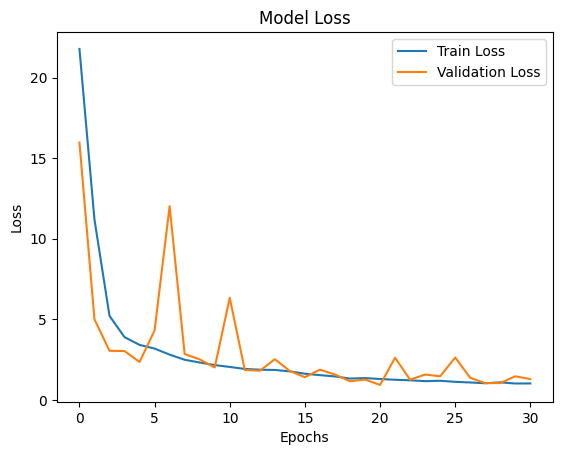

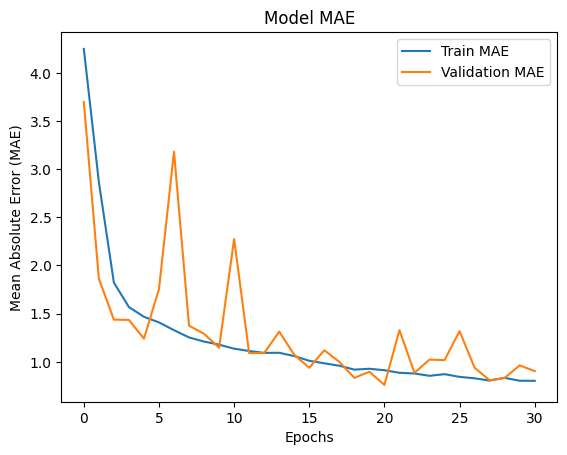

In [312]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Model MAE')
plt.show()

In [319]:
from sklearn.metrics import mean_squared_error

# پیش‌بینی روی داده‌های تست
y_pred = model.predict(X_test)

# محاسبه MSE (Mean Squared Error) بین پیش‌بینی‌ها و مقادیر واقعی
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on Test Data: {mse}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 512ms/step
Mean Squared Error on Test Data: 1.0129735980660168


In [324]:
from sklearn.metrics import mean_absolute_error

# محاسبه MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error on Test Data: {mae}")

Mean Absolute Error on Test Data: 0.7988592558773197


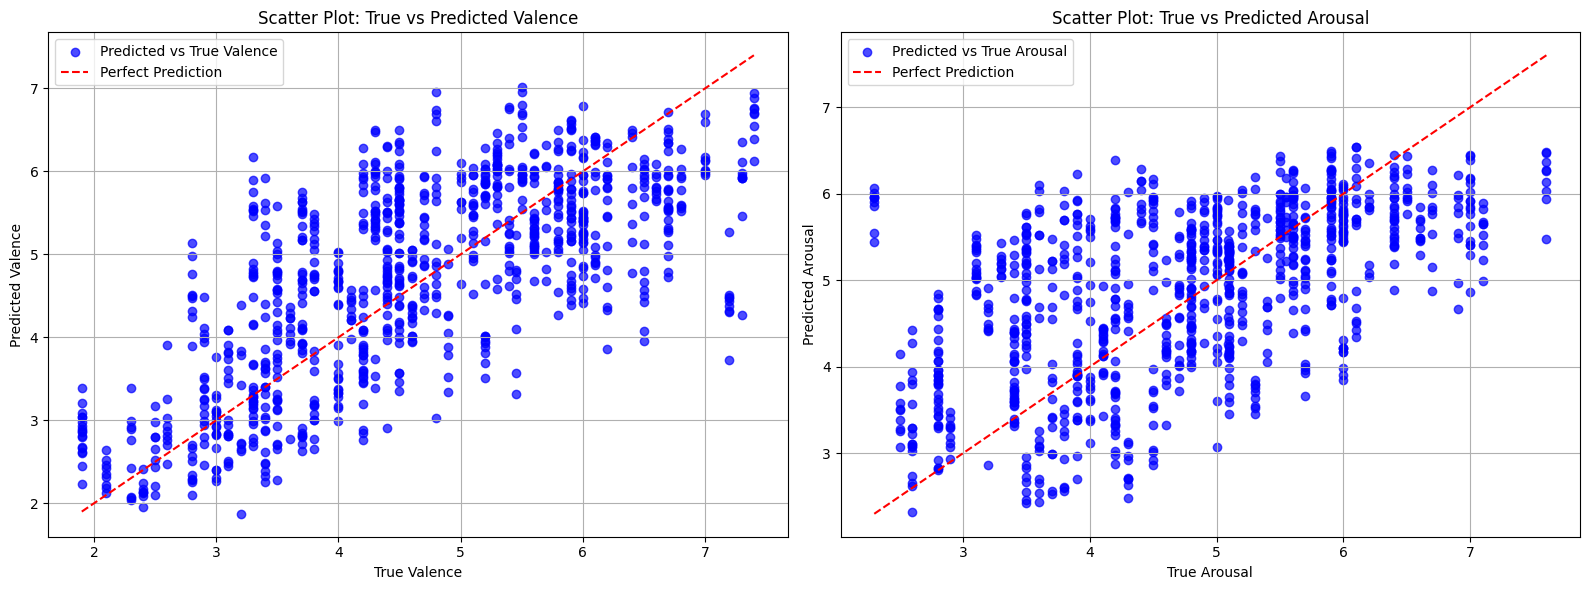

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for true vs predicted valence
axes[0].scatter(y_test[:, 0], y_pred[:, 0], alpha=0.7, color='blue', label='Predicted vs True Valence')
axes[0].plot([min(y_test[:, 0]), max(y_test[:, 0])], [min(y_test[:, 0]), max(y_test[:, 0])], 'r--', label='Perfect Prediction')
axes[0].set_title("Scatter Plot: True vs Predicted Valence")
axes[0].set_xlabel("True Valence")
axes[0].set_ylabel("Predicted Valence")
axes[0].legend()
axes[0].grid(True)

# Scatter plot for true vs predicted arousal
axes[1].scatter(y_test[:, 1], y_pred[:, 1], alpha=0.7, color='blue', label='Predicted vs True Arousal')
axes[1].plot([min(y_test[:, 1]), max(y_test[:, 1])], [min(y_test[:, 1]), max(y_test[:, 1])], 'r--', label='Perfect Prediction')
axes[1].set_title("Scatter Plot: True vs Predicted Arousal")
axes[1].set_xlabel("True Arousal")
axes[1].set_ylabel("Predicted Arousal")
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show the figure
plt.tight_layout()
plt.show()
